# Import Library

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression

In [2]:
def linear(x,y) :
    x=np.array(x)
    y=np.array(y)
    n = len(y) #jumlah data
    xy=x*y #xy
    xx=x**2 #xx
    b=(n*xy.sum()-x.sum()*y.sum())/(n*xx.sum()-(x.sum())**2)
    a=y.mean()-b*x.mean()
    print("Persamaan regresi linearnya adalah : y = {:.4f}x + {:.4f}".format(b,a))
    yreg=b*x+a #yregresi
    return yreg

## Squared Regression

In [3]:
def pangkat(x,y) :
    x=np.array(x)
    y=np.array(y)
    xp=np.log10(x)
    yp=np.log10(y)
    n = len(y) #jumlah data
    xy=xp*yp #xy
    xx=xp**2 #xx
    bp=(n*xy.sum()-xp.sum()*yp.sum())/(n*xx.sum()-(xp.sum())**2)
    aa=yp.mean()-bp*xp.mean()
    ap=10**aa
    print("Persamaan regresi pangkatnya adalah : y = {}x^{}".format(ap,bp))
    yreg=ap*(x**bp)
    return yreg

## Exponential Regression

In [4]:
def eksp(x,y):
    x=np.array(x)
    y=np.array(y)
    x=x
    ye=np.log(y)
    n = len(y) #jumlah data
    xye=x*ye #xy
    xx=x**2 #xx
    b=(n*xye.sum()-x.sum()*ye.sum())/(n*xx.sum()-(x.sum())**2)
    import math
    #Menghitung a
    A=ye.mean()-b*x.mean()
    a=math.exp(A)
    print("Persamaan regresi eksponensialnya adalah : y = {:.4f}e^{:.4f}x".format(a,b))
    yreg=np.array(a*np.exp(b*x)) #yregresi
    return yreg

## Polynomial Regression

In [5]:
def orde3(x,y):
    x=np.array(x)
    y=np.array(y)
    #Matriks A
    A=np.zeros((4,4),dtype=float)
    for i in range(0,4):
        for j in range(0,4):
            A[i][j]=(x**(j+i)).sum()
    
    #Matriks B
    B=np.zeros((1,4), dtype=float)
    for i in range(0,4) :
        B[0][i]=((x**i)*y).sum()
    
    #Eliminasi Gauss
    A=np.array(A)
    b=np.array([ B[0][0],  B[0][1],  B[0][2],  B[0][3]])

    Ab = np.hstack([A, b.reshape(-1, 1)])

    n = len(b)

    for i in range(n):
        a = Ab[i]
        for j in range(i + 1, n):
            b = Ab[j]
            m = a[i] / b[i]
            Ab[j] = a - m * b
            
    for i in range(n - 1, -1, -1):
        Ab[i] = Ab[i] / Ab[i, i]
        a = Ab[i]
        for j in range(i - 1, -1, -1):
            b = Ab[j]
            m = a[i] / b[i]
            Ab[j] = a - m * b
    X = Ab[:, 4]
    a0=X[0]
    a1=X[1]
    a2=X[2]
    a3=X[3]
    print("Persamaan regresi polinomial orde 3 nya adalah : y = {:.4f} + {:.4f}x + {:.4f}x^2 + {:.4f}x^3".format(a0,a1,a2,a3))
    yreg=a0+a1*x+a2*(x**2)+a3*(x**3)
    return yreg

## Counting R^2 Score

In [6]:
def r2_score_linear(y,ypred) :
    s1=(np.subtract(y,ypred)**2).sum()
    s2=(np.subtract(y,np.mean(y))**2).sum()
    r=1-s1/s2
    print("R^2 adalah {}".format(r))

def r2_score_pangkat(x,y) :
    x=np.array(x)
    y=np.array(y)
    xp=np.log10(x)
    yp=np.log10(y)
    n = len(y) #jumlah data
    xy=xp*yp #xy
    xx=xp**2 #xx
    bp=(n*xy.sum()-xp.sum()*yp.sum())/(n*xx.sum()-(xp.sum())**2)
    aa=yp.mean()-bp*xp.mean()
    ypp=aa+bp*xp
    s1=(np.subtract(yp,ypp)**2).sum()
    s2=(np.subtract(yp,np.mean(yp))**2).sum()
    r=1-s1/s2
    print("R^2 adalah {}".format(r))

def r2_score_exp(x,y) :
    x=np.array(x)
    y=np.array(y)
    ye=np.log(y)
    n = len(y) 
    xye=x*ye 
    xx=x**2
    b=(n*xye.sum()-x.sum()*ye.sum())/(n*xx.sum()-(x.sum())**2)
    #Menghitung a
    A=ye.mean()-b*x.mean()
    ypp=A+b*x
    s1=(np.subtract(ye,ypp)**2).sum()
    s2=(np.subtract(ye,np.mean(ye))**2).sum()
    r=1-s1/s2
    print("R^2 adalah {}".format(r))
    
def r2_score_orde3(y,yreg) :
    s1=(np.subtract(y,yreg)**2).sum()
    s2=(np.subtract(y,np.mean(y))**2).sum()
    r=1-s1/s2
    print("R^2 adalah {}".format(r))

## Datatime to Integer

In [7]:
def facto(a):
    for i in df:
        df[a] = df[a].factorize()[0]+1

### Plot Function

In [8]:
def active(x,y,yy,country):
    fig= plt.figure(figsize=(5,2))
    axes= fig.add_axes([2,2,4,4])
    plt.xlabel("\nDate",fontsize=28)
    plt.ylabel("Total Active Cases in" +country,fontsize=28)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    axes.set_title('Active Cases in '+country+'\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
    axes.plot(x,yy)
    plt.scatter(x,y)
    plt.show()

In [9]:
def death(x,y,yy,country):
    fig= plt.figure(figsize=(5,2))
    axes= fig.add_axes([2,2,4,4])
    plt.xlabel("\nDate",fontsize=28)
    plt.ylabel("Total Deaths in "+country,fontsize=28)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    axes.set_title('Total Deaths in '+country+'\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
    axes.plot(x,yy)
    plt.scatter(x,y)
    plt.show()

# Data Analysis
***

## 1. Tiongkok

### A. Active Cases
***

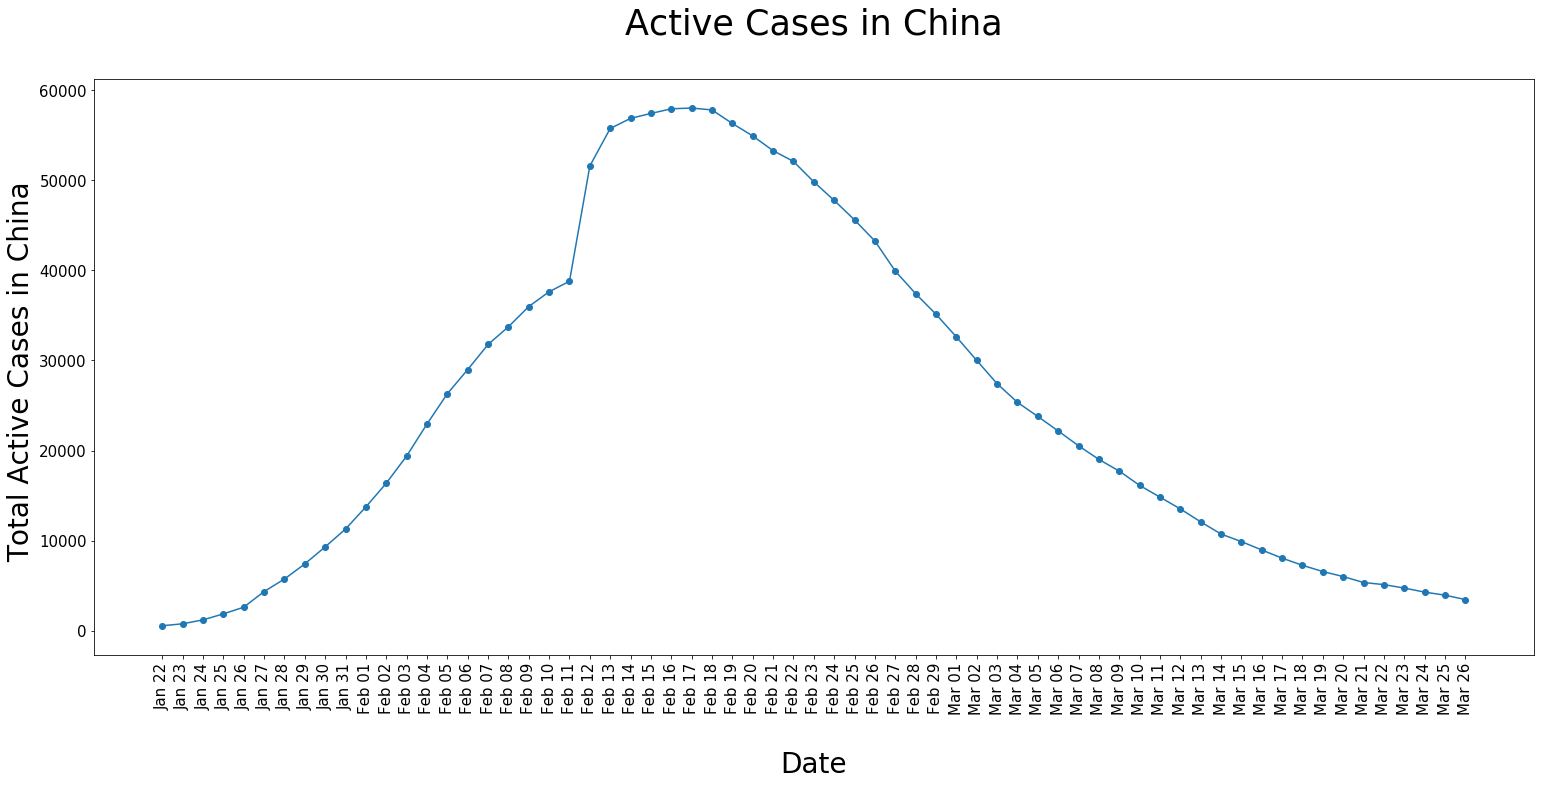

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
date=x

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x,y)
plt.scatter(x,y)
plt.show()

### Pertambahan (22 Jan sampai 16 Feb)

### Linear

In [ ]:
x = list(df.iloc[:26,0])
x1=x

In [ ]:
facto("date")

In [ ]:
x = list(df.iloc[:26,0])
y = list(df.iloc[:26,1])
ypred=linear(x,y)
r2_score_linear(y,ypred)

Persamaan regresi linearnya adalah : y = 2557.5357x + -10283.6554
R^2 adalah 0.9601144265038228


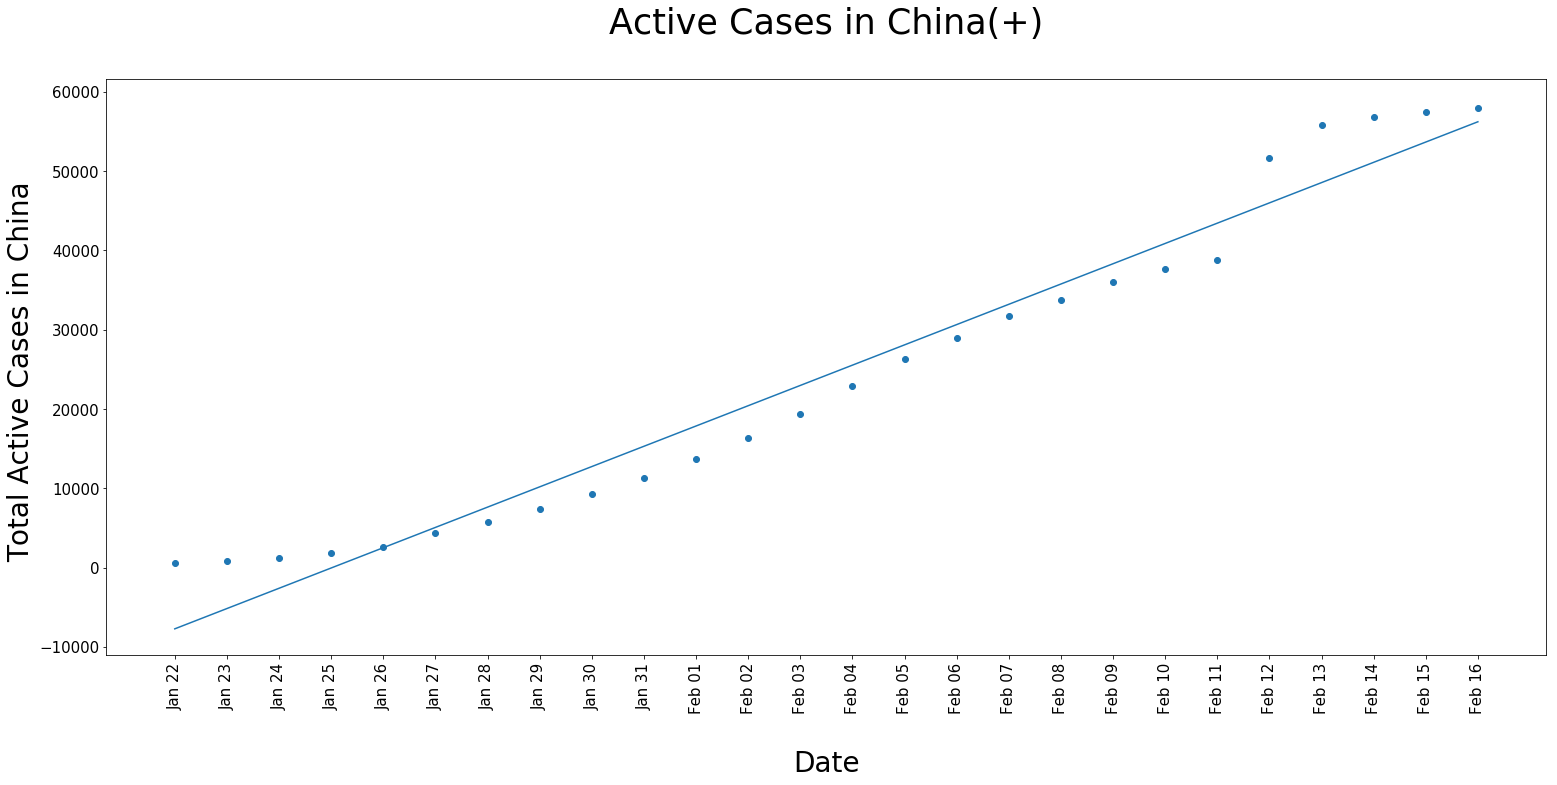

In [ ]:
y = list(df.iloc[:26,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(+)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

### Pangkat

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)

Persamaan regresi pangkatnya adalah : y = 260.6439083023483x^1.6628813689672892
R^2 adalah 0.978132825707274


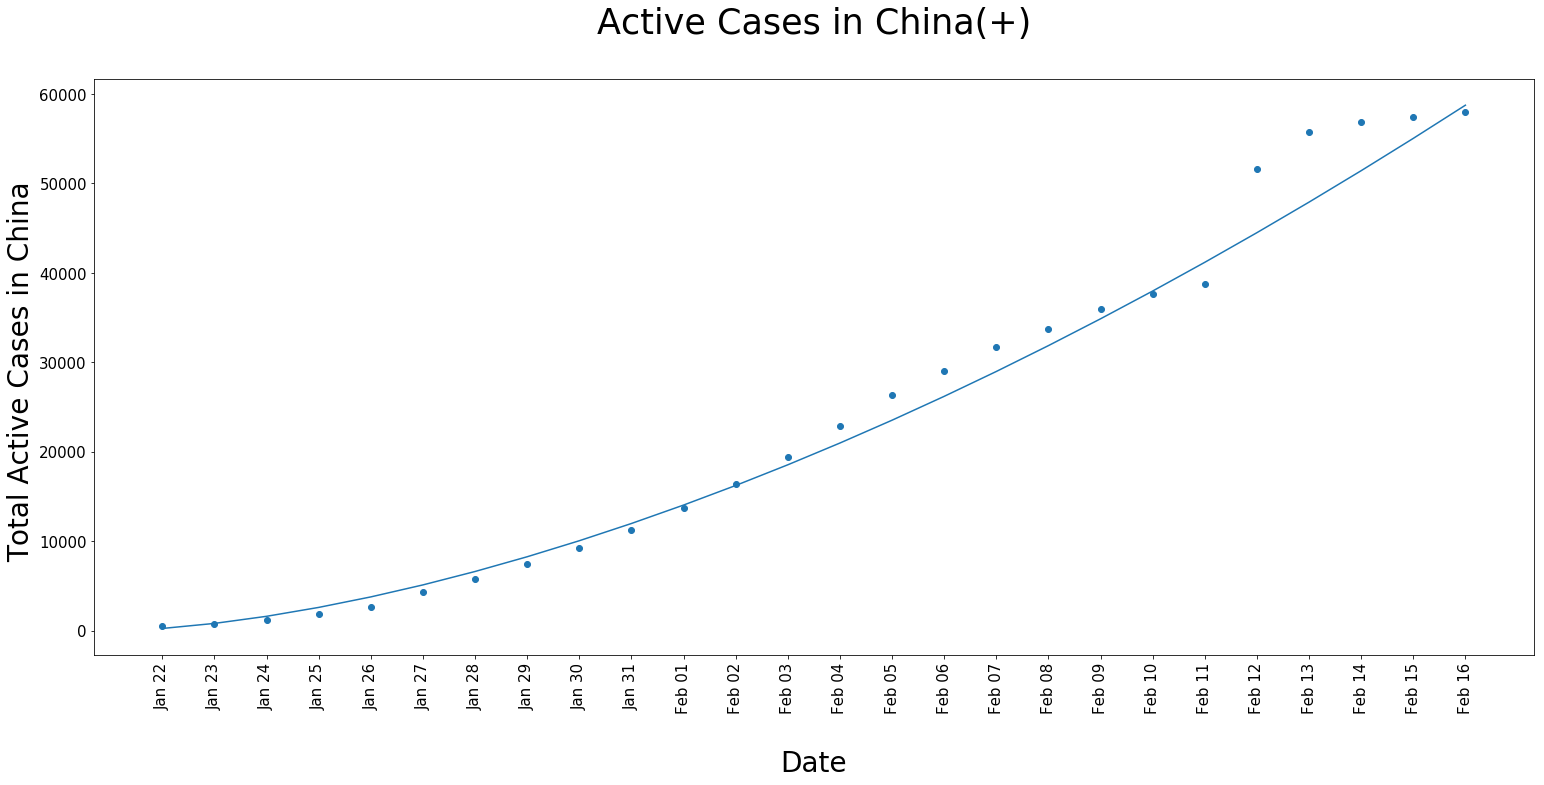

In [ ]:
y = list(df.iloc[:26,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(+)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

### Eksponensial

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)

Persamaan regresi eksponensialnya adalah : y = 1244.0427e^0.1745x
R^2 adalah 0.8971384397990954


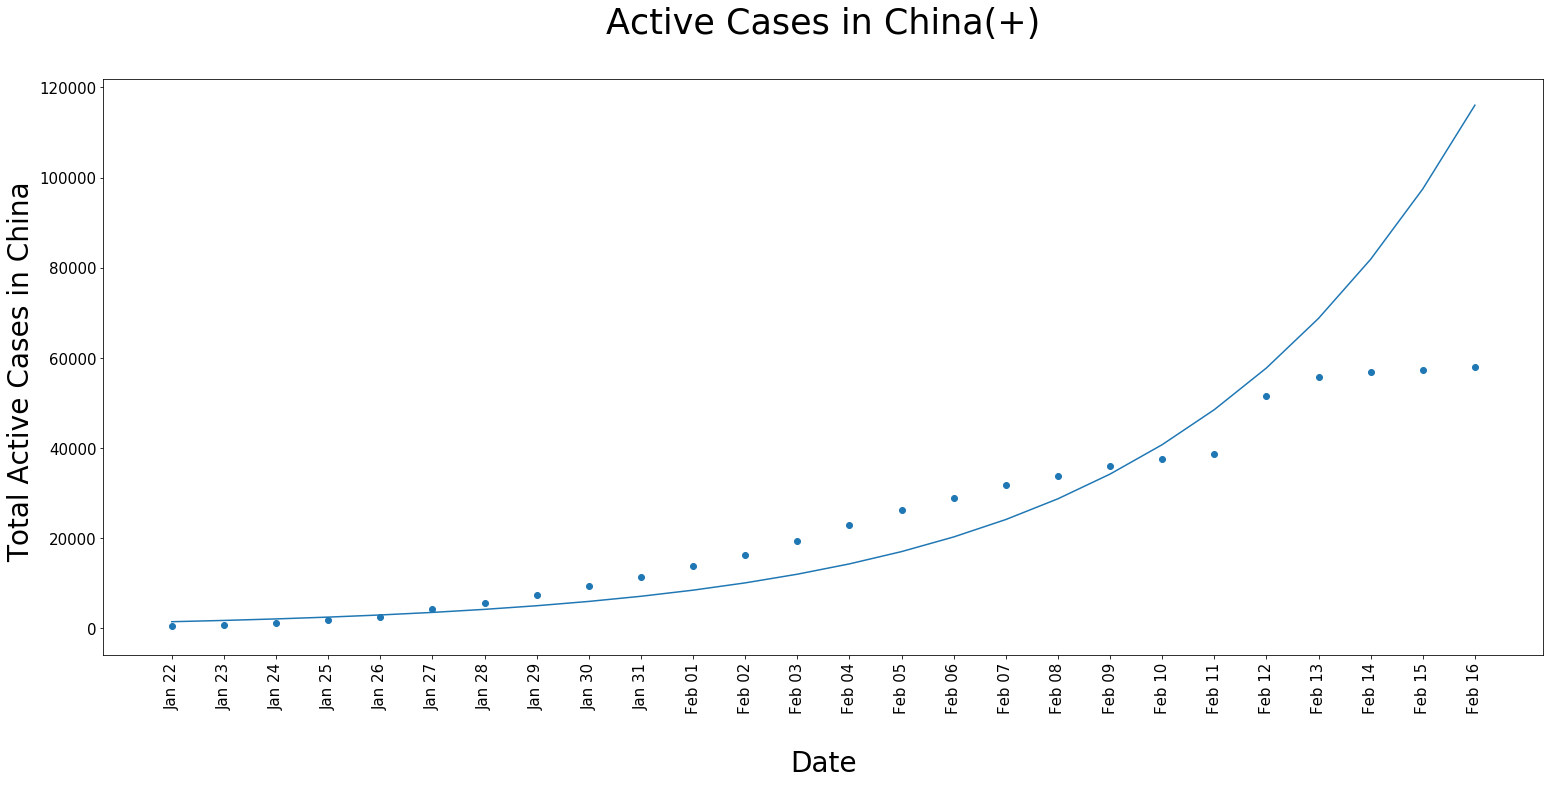

In [ ]:
y = list(df.iloc[:26,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(+)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

### Polinomial Orde 3

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)

Persamaan regresi polinomial orde 3 nya adalah : y = 848.1973 + -399.5480x + 174.5892x^2 + -2.7120x^3
R^2 adalah 0.9897614765083742


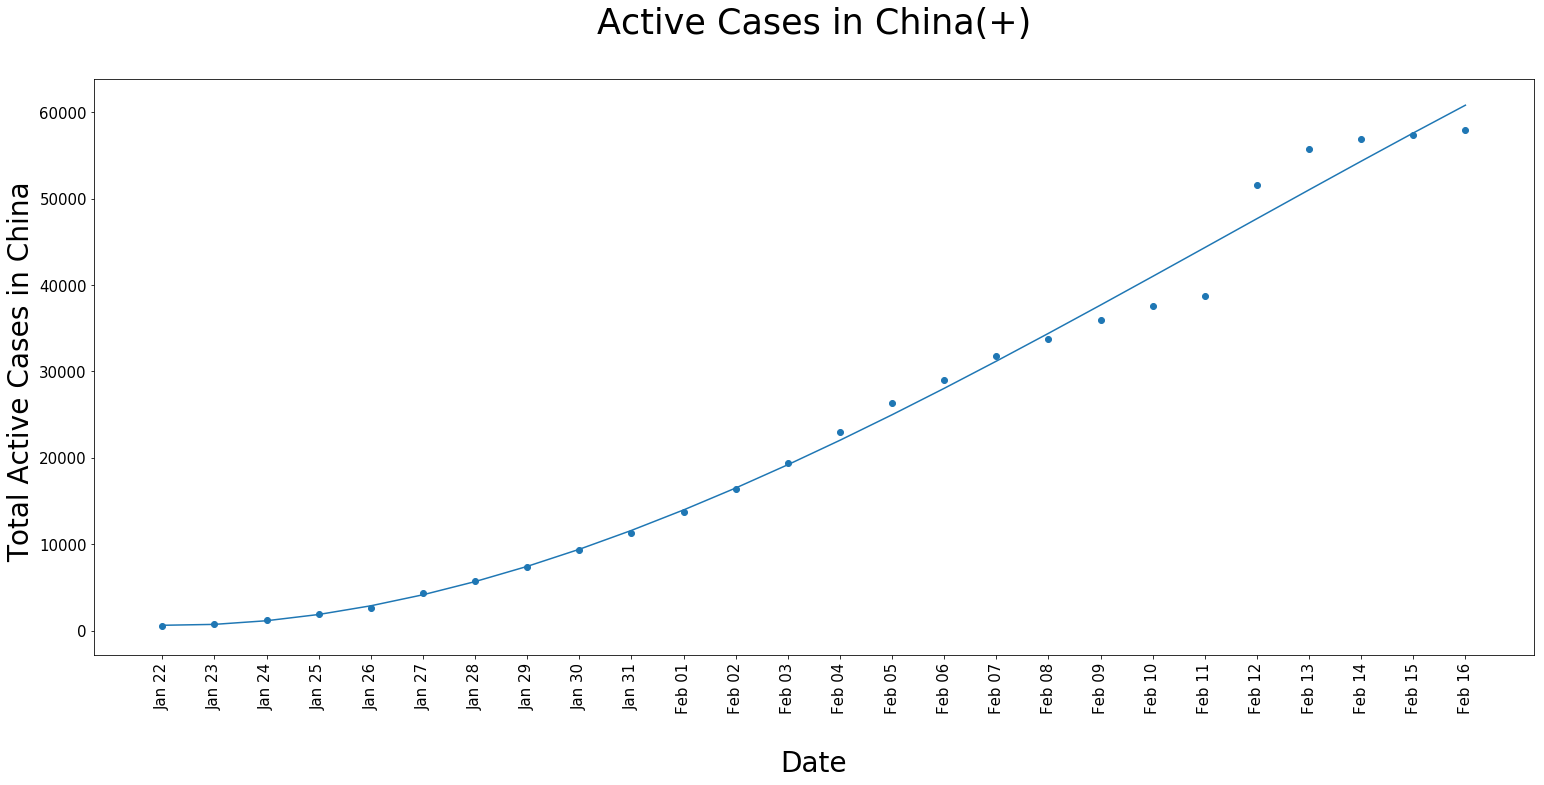

In [ ]:
y = list(df.iloc[:26,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(+)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

Model terbaik untuk penambahan kasus di china adalah polinomial orde 3 dengan r^2 score **0.9897614765083742**

In [ ]:
##Membuat fungsi yang menggambarkan penambahan kasus aktif di china
def china_active (x) :
    y = 848.1973  -399.5480*x + 174.5892*(x**2)  -2.7120*(x**3)
    return y

### Pengurangan (17 Feb sampai 26 Maret)

In [ ]:
df["tanggal"]=date
x= list(df.iloc[26:65,3])
x1=x
y = list(df.iloc[26:65,1])

### Linear

In [ ]:
x = list(df.iloc[26:65,0])
y = list(df.iloc[26:65,1])
ypred=linear(x,y)
r2_score_linear(y,ypred)

Persamaan regresi linearnya adalah : y = -1594.3417x + 98748.2567
R^2 adalah 0.955153727206873


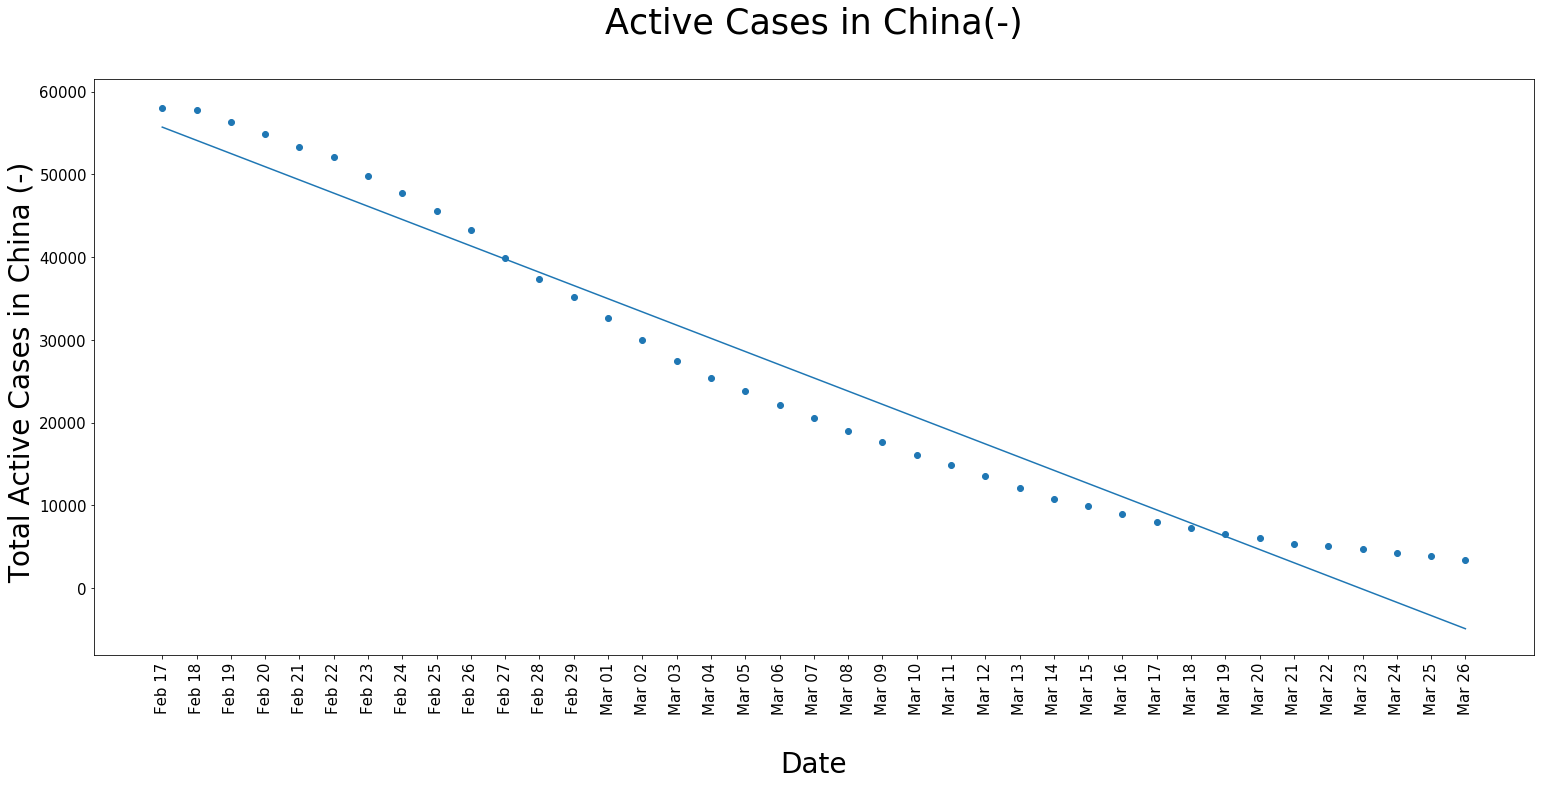

In [ ]:
y = list(df.iloc[26:65,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China (-) ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(-)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

### Pangkat

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)

Persamaan regresi pangkatnya adalah : y = 6573283784.579465x^-3.3716348750341476
R^2 adalah 0.9402227130779018


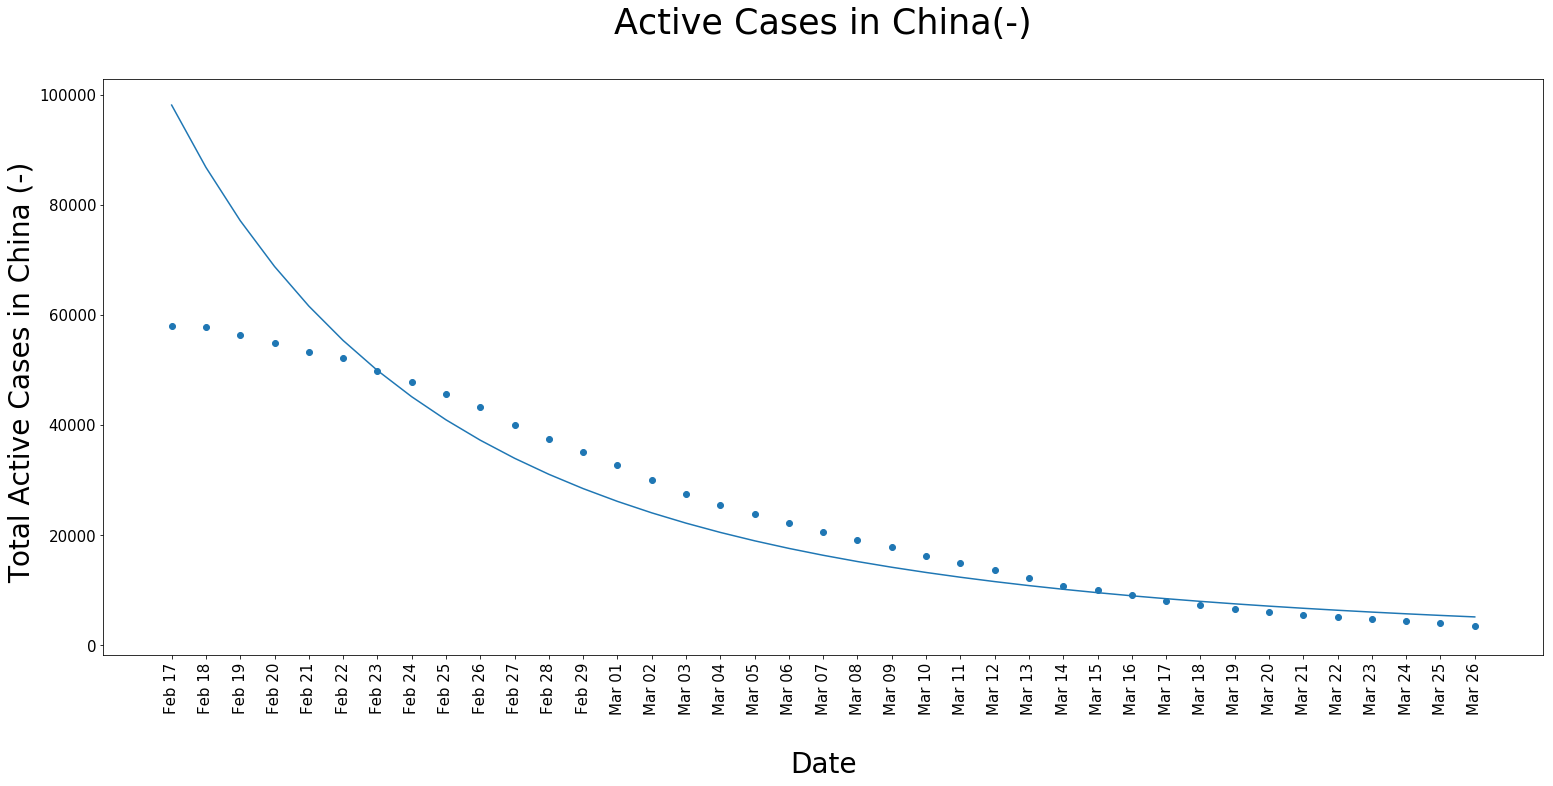

In [ ]:
y = list(df.iloc[26:65,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China (-) ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(-)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

### Eksponensial

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)

Persamaan regresi eksponensialnya adalah : y = 665671.0150e^-0.0784x
R^2 adalah 0.982238509163468


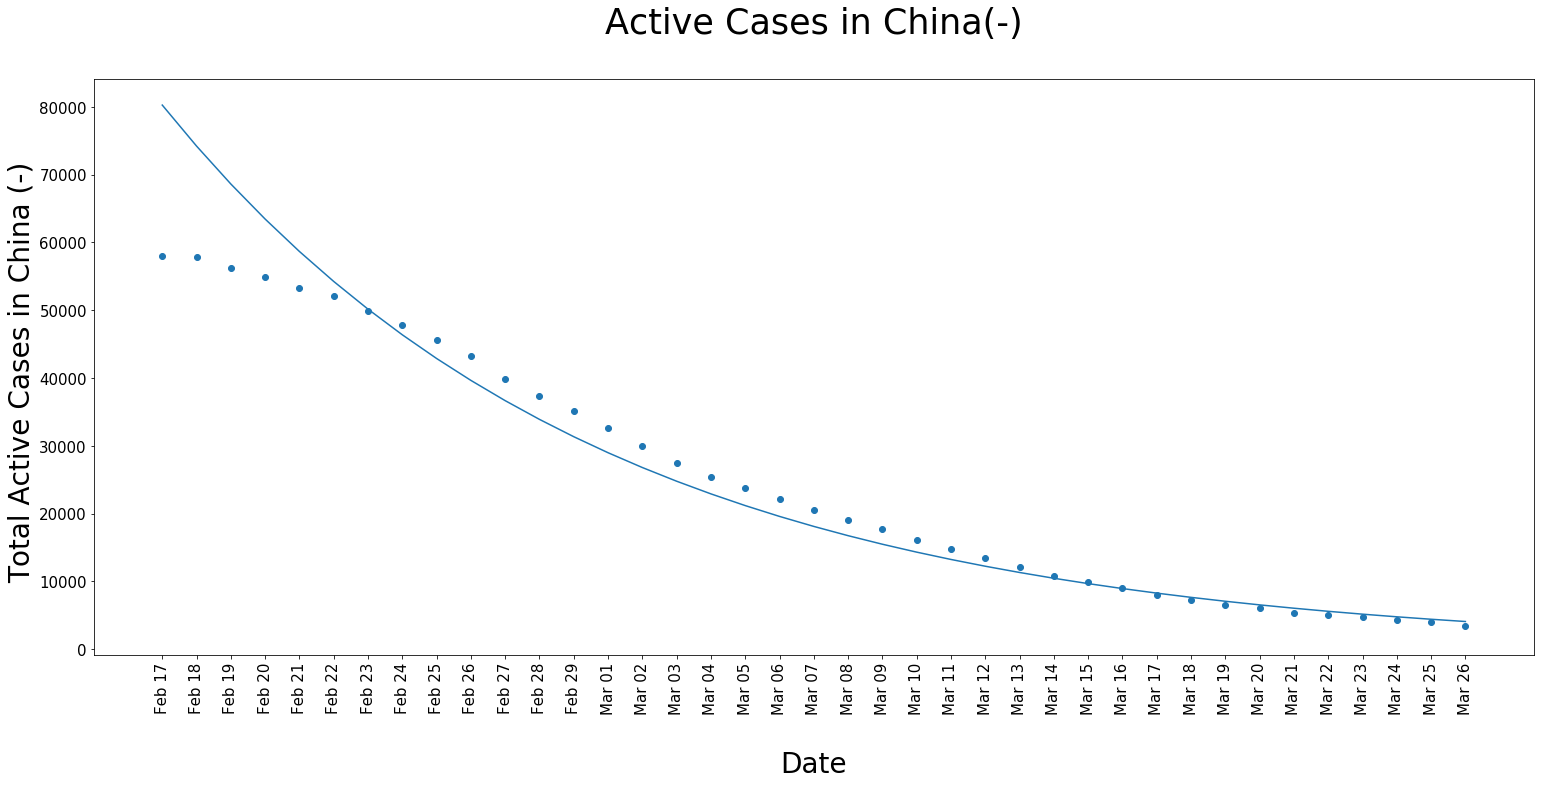

In [ ]:
y = list(df.iloc[26:65,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China (-) ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(-)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

### Polinomial Orde 3

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)

Persamaan regresi polinomial orde 3 nya adalah : y = 76584.8451 + 1494.8984x + -103.7265x^2 + 0.9814x^3
R^2 adalah 0.9969206775962449


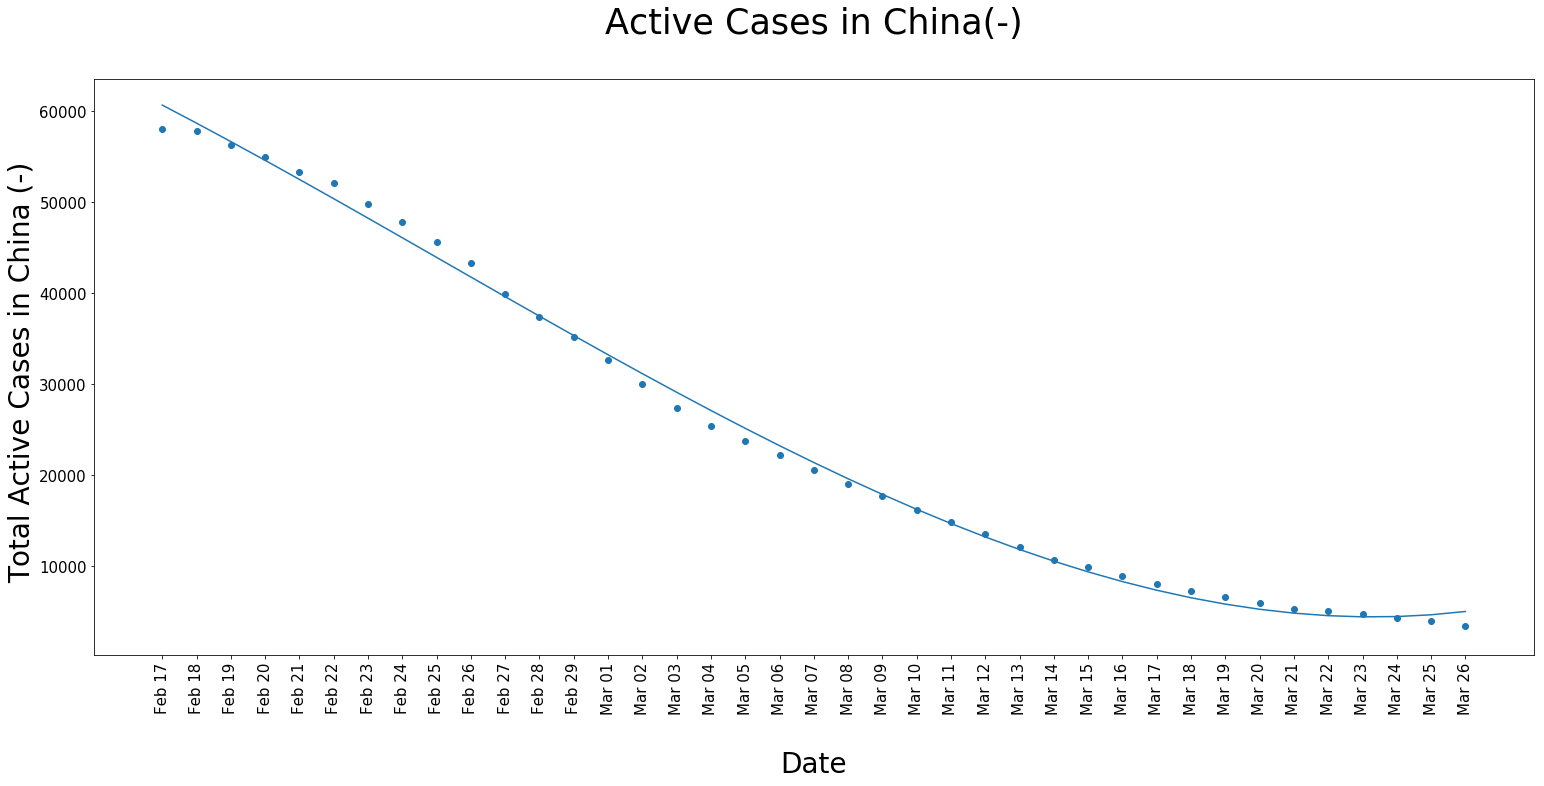

In [ ]:
y = list(df.iloc[26:65,1])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in China (-) ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in China(-)\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x1,ypred)
plt.scatter(x1,y)
plt.show()

Model terbaik untuk pengurangan kasus di china adalah polinomial orde 3 dengan r^2 score **0.9969206775962449**

### B. Total Deaths

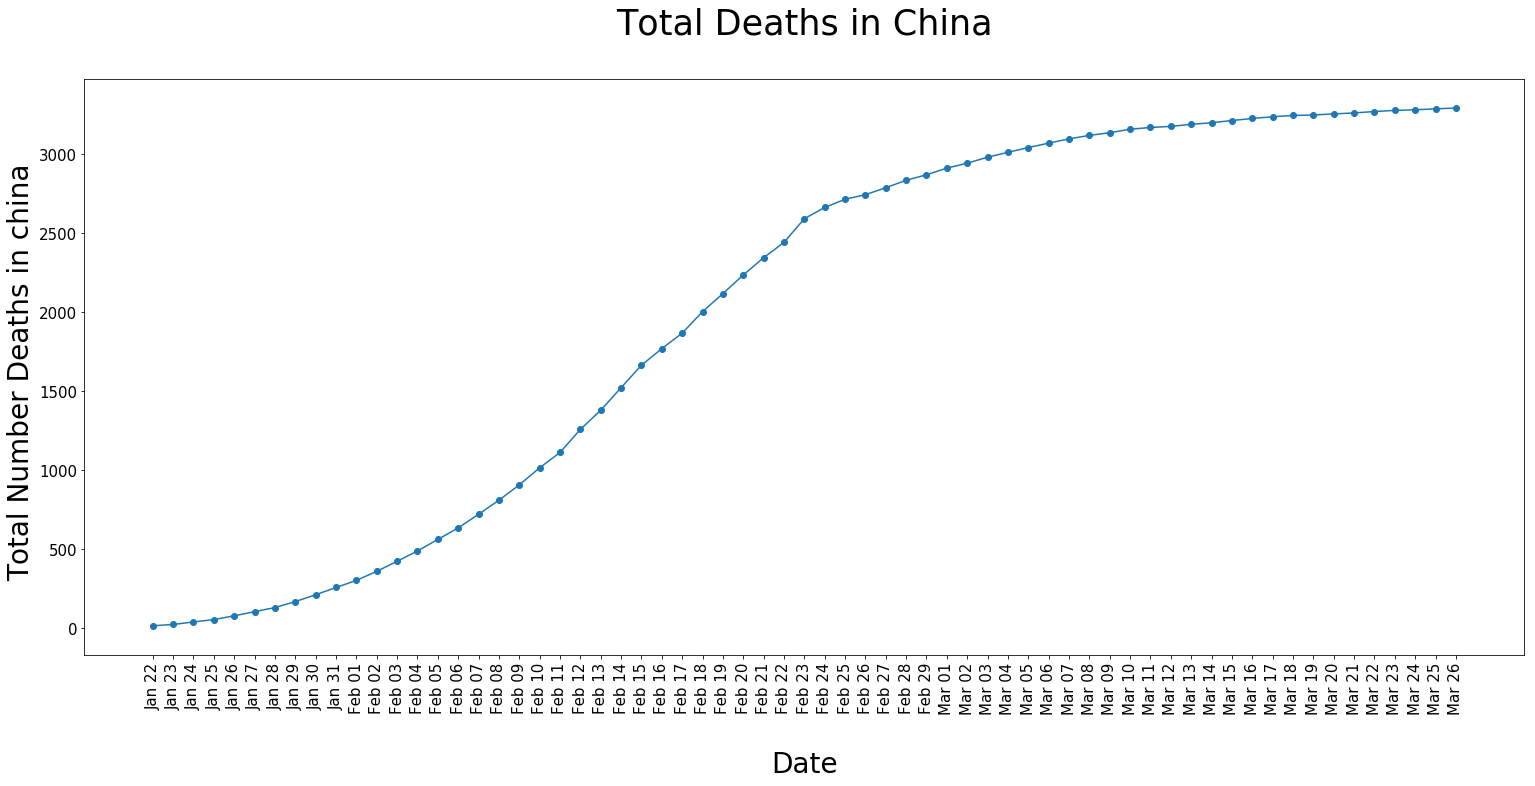

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Number Deaths in china ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Total Deaths in China\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(date,y)
plt.scatter(date,y)
plt.show()

### Linear

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])
ypred=linear(x,y)
r2_score_linear(y,ypred)

Persamaan regresi linearnya adalah : y = 62.4749x + -53.0553
R^2 adalah 0.9178524432046673


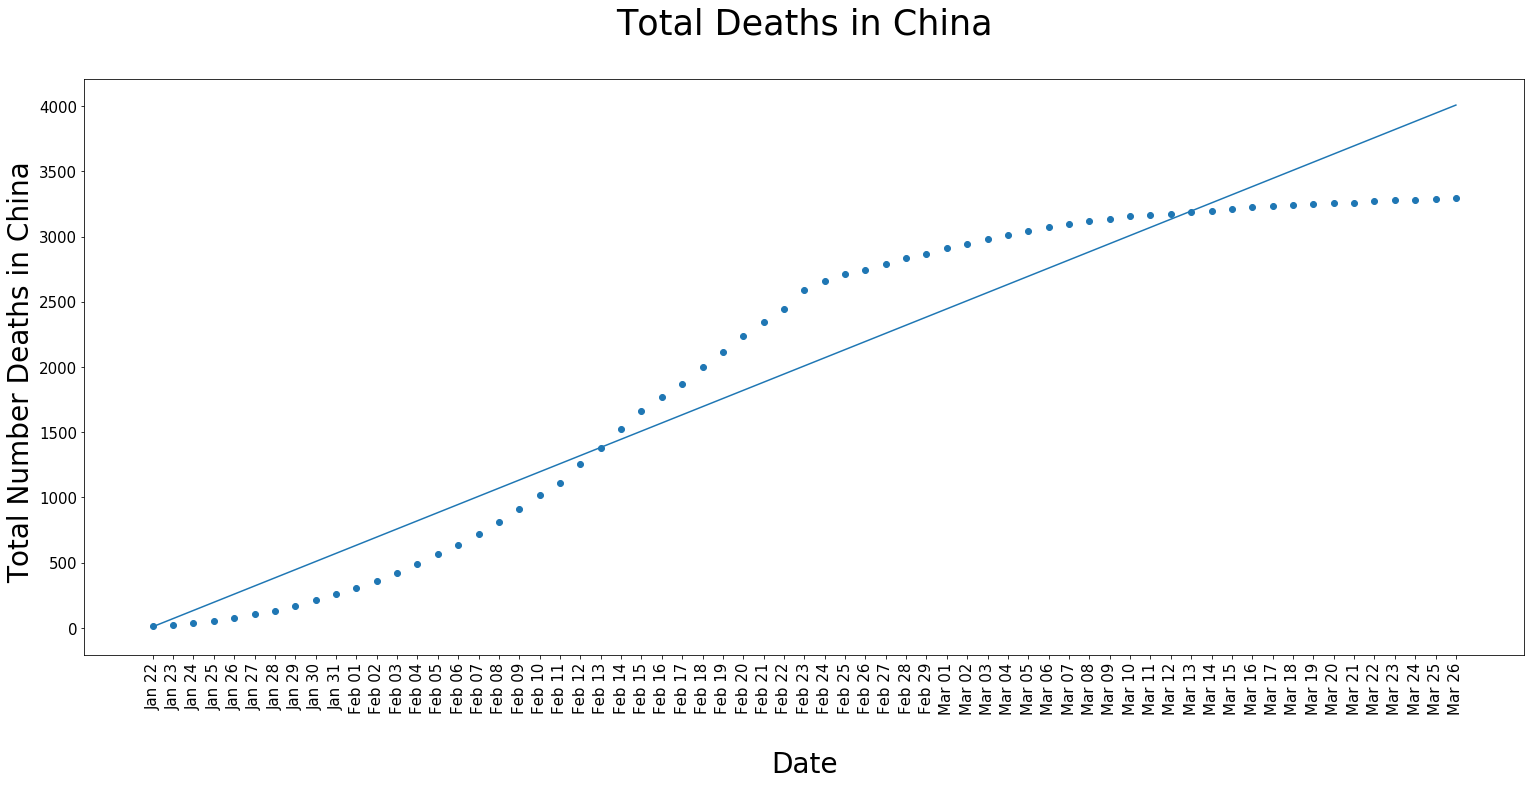

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Number Deaths in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Total Deaths in China\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(date,ypred)
plt.scatter(date,y)
plt.show()

### Pangkat

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)

Persamaan regresi pangkatnya adalah : y = 10.270662512856823x^1.483973410970768
R^2 adalah 0.96683146608885


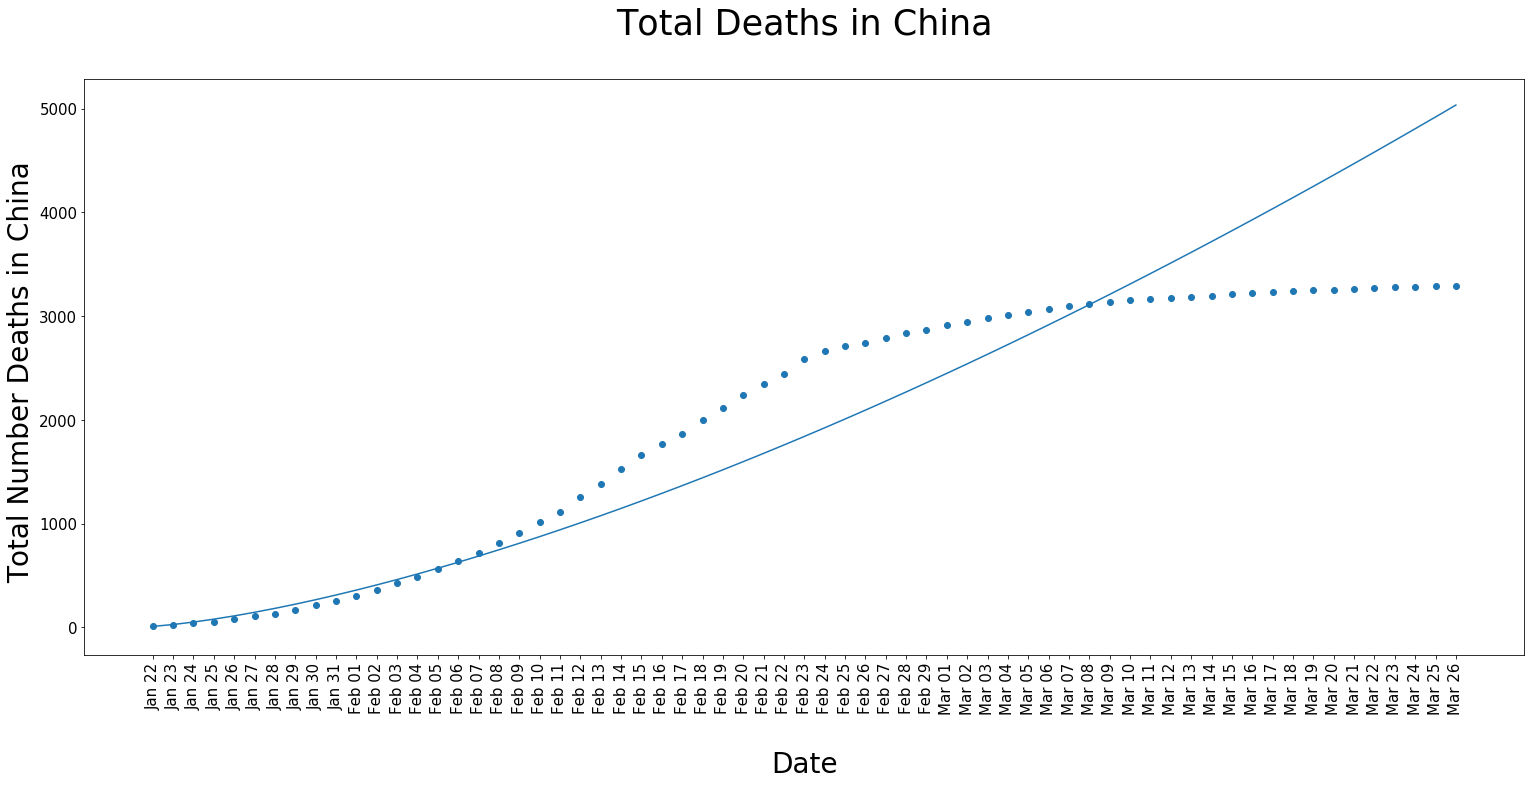

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Number Deaths in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Total Deaths in China\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(date,ypred)
plt.scatter(date,y)
plt.show()

### Eksponensial

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)

Persamaan regresi eksponensialnya adalah : y = 161.2952e^0.0614x
R^2 adalah 0.720984971405615


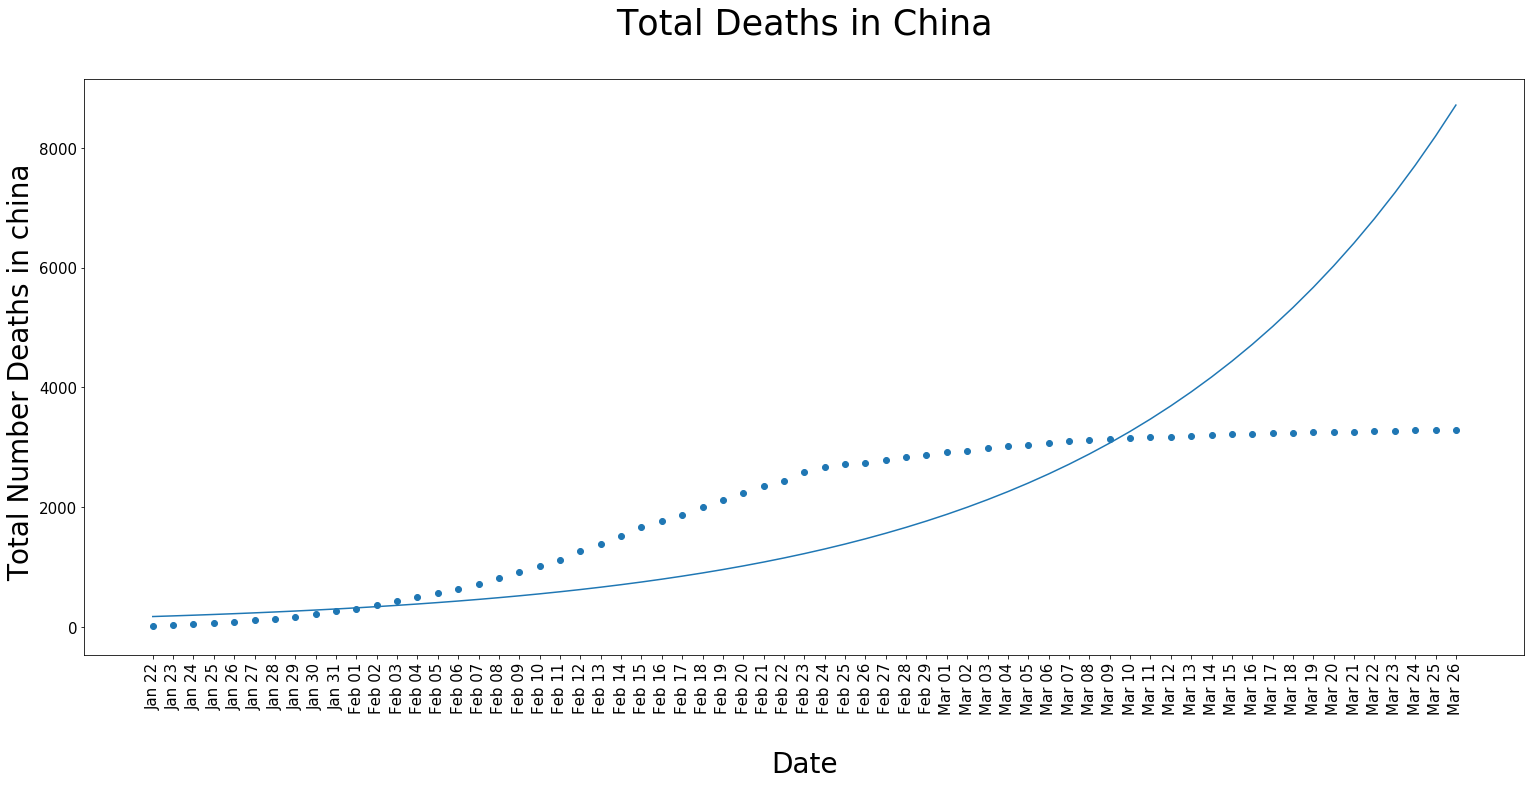

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Number Deaths in china ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Total Deaths in China\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(date,ypred)
plt.scatter(date,y)
plt.show()

### Polinomial Orde 3

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)

Persamaan regresi polinomial orde 3 nya adalah : y = -201.5653 + 33.4657x + 2.3820x^2 + -0.0329x^3
R^2 adalah 0.9875493187517914


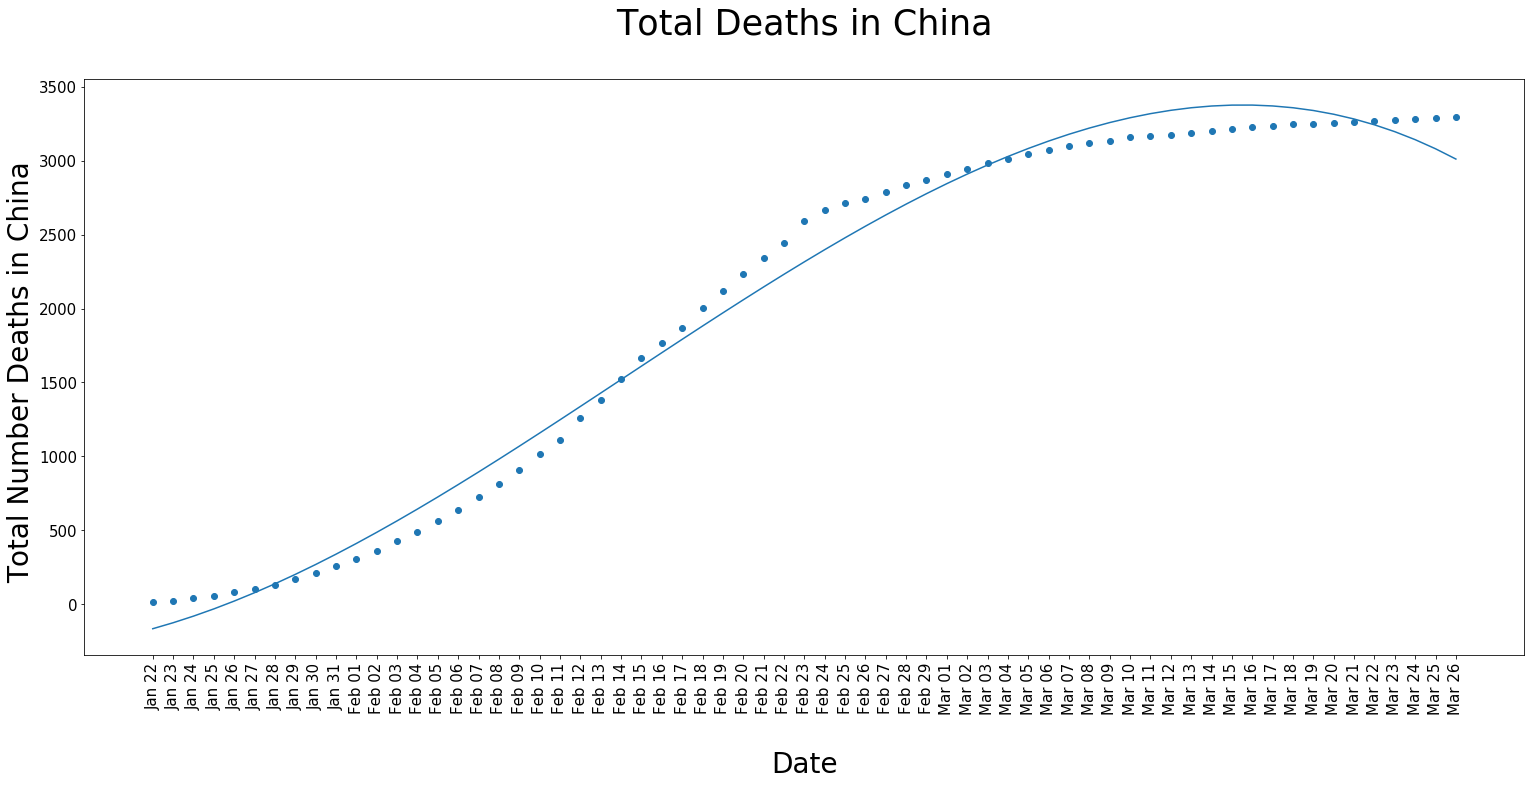

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,2])

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Number Deaths in China ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Total Deaths in China\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(date,ypred)
plt.scatter(date,y)
plt.show()

In [ ]:
def china_death(x) :
    y = -201.5653 + 33.4657*x + 2.3820*(x**2)  -0.0329*(x**3)
    return y

Model terbaik untuk kematian total di china adalah polinomial orde 3 dengan r^2 score **0.9875493187517914**

## 3.2. Korea Selatan

In [ ]:
df=pd.read_csv('../input/south_korea.csv')

 ### A. Active Cases

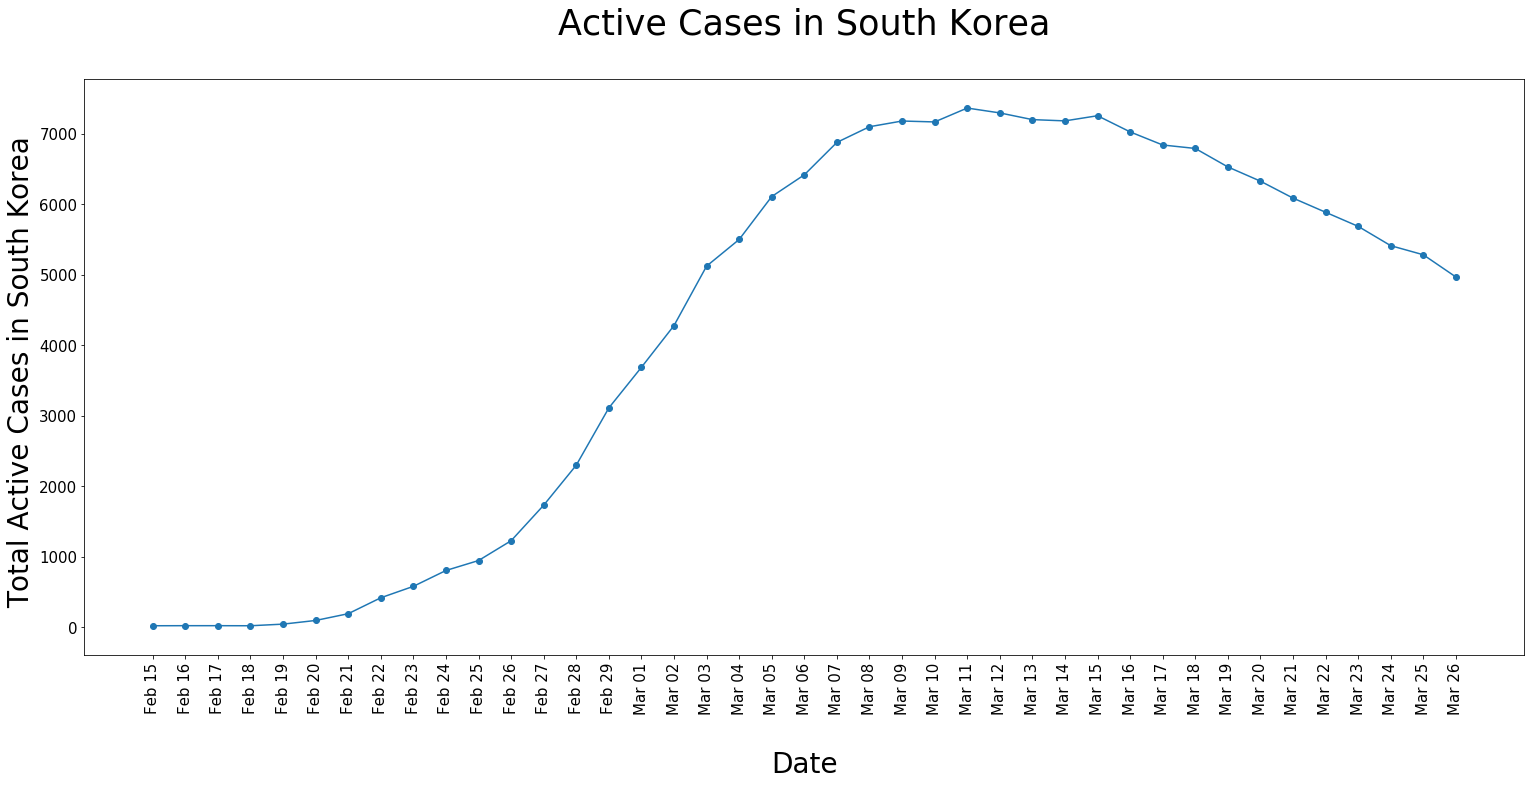

In [ ]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
date=x
tgl=date

fig= plt.figure(figsize=(5,2))
axes= fig.add_axes([2,2,4,4])
plt.xlabel("\nDate",fontsize=28)
plt.ylabel("Total Active Cases in South Korea ",fontsize=28)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
axes.set_title('Active Cases in South Korea\n', fontdict={'fontsize': 35, 'fontweight': 'medium'})
axes.plot(x,y)
plt.scatter(x,y)
plt.show()

### Penambahan (15 Februari sampai 11 Maret)

In [ ]:
x = list(df.iloc[:26,0])
y = list(df.iloc[:26,1])
date=x
facto('date')
x = list(df.iloc[:26,0])

### Linear

Persamaan regresi linearnya adalah : y = 362.9504x + -1888.9077
R^2 adalah 0.9295037801987794


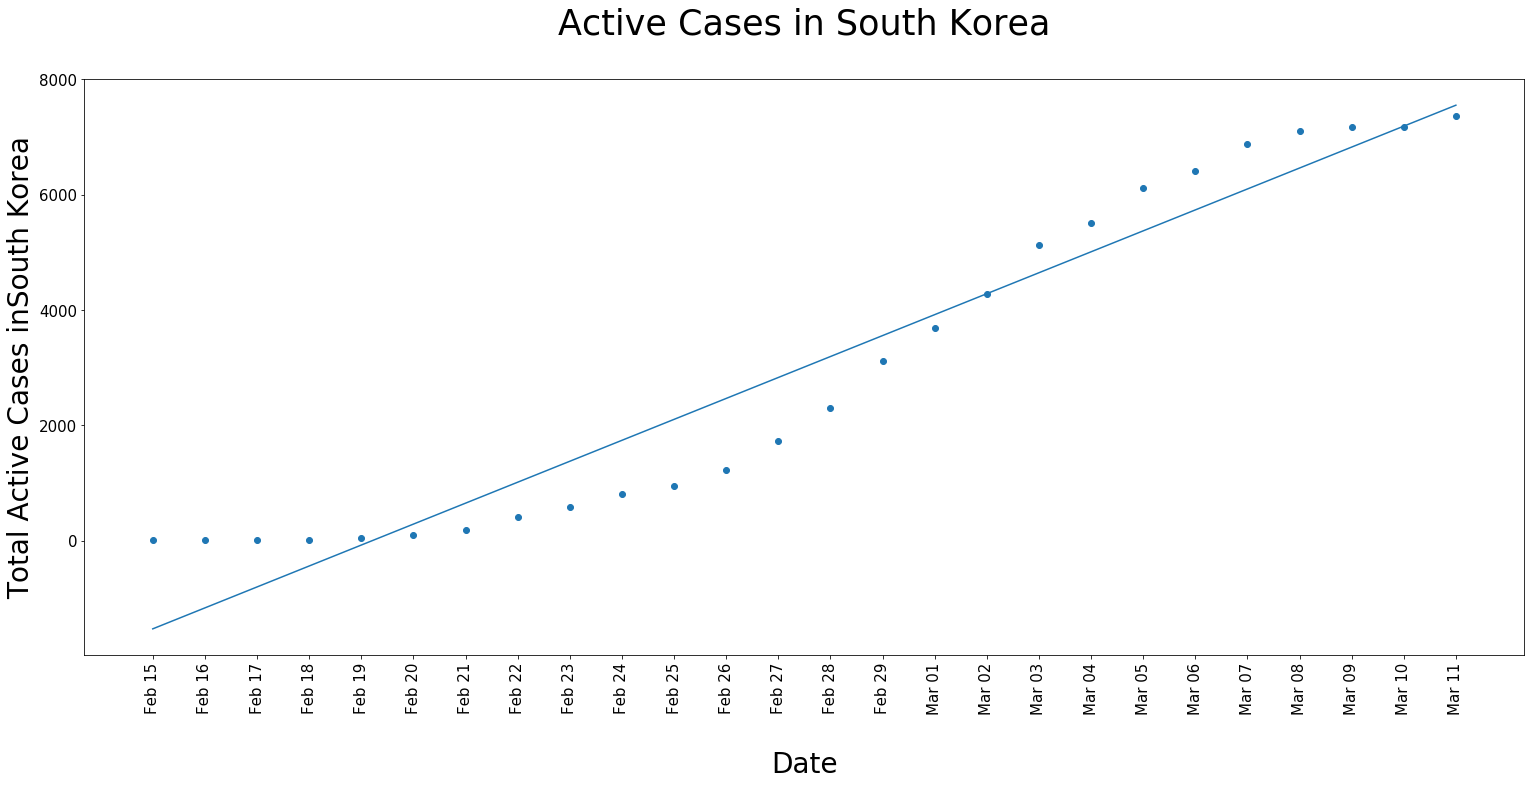

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
active(date,y,ypred,"South Korea")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 2.58156288829746x^2.4909327586086443
R^2 adalah 0.914540856639006


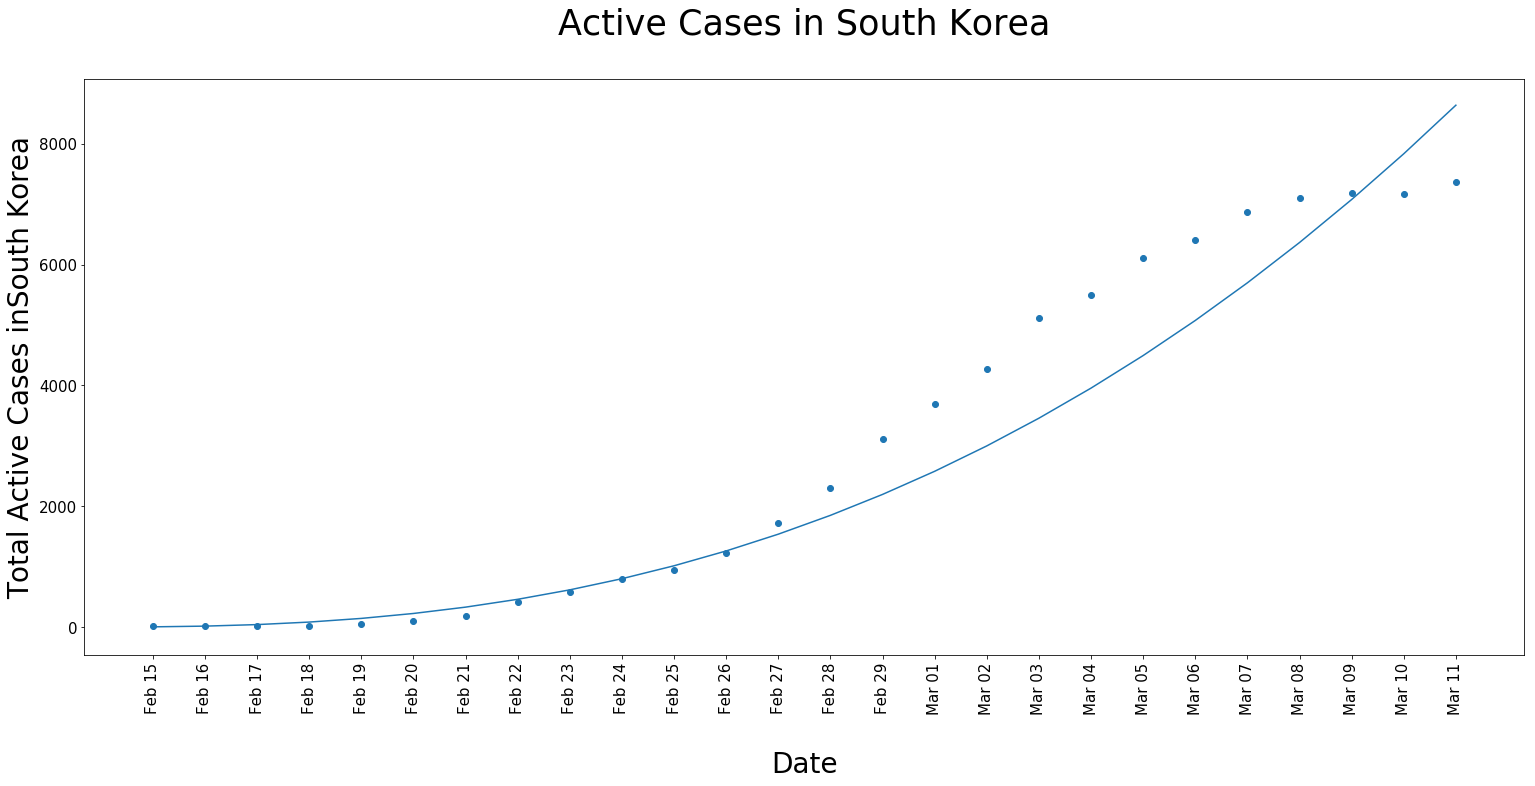

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
active(date,y,ypred,"South Korea")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 24.3880e^0.2684x
R^2 adalah 0.8848723308010291


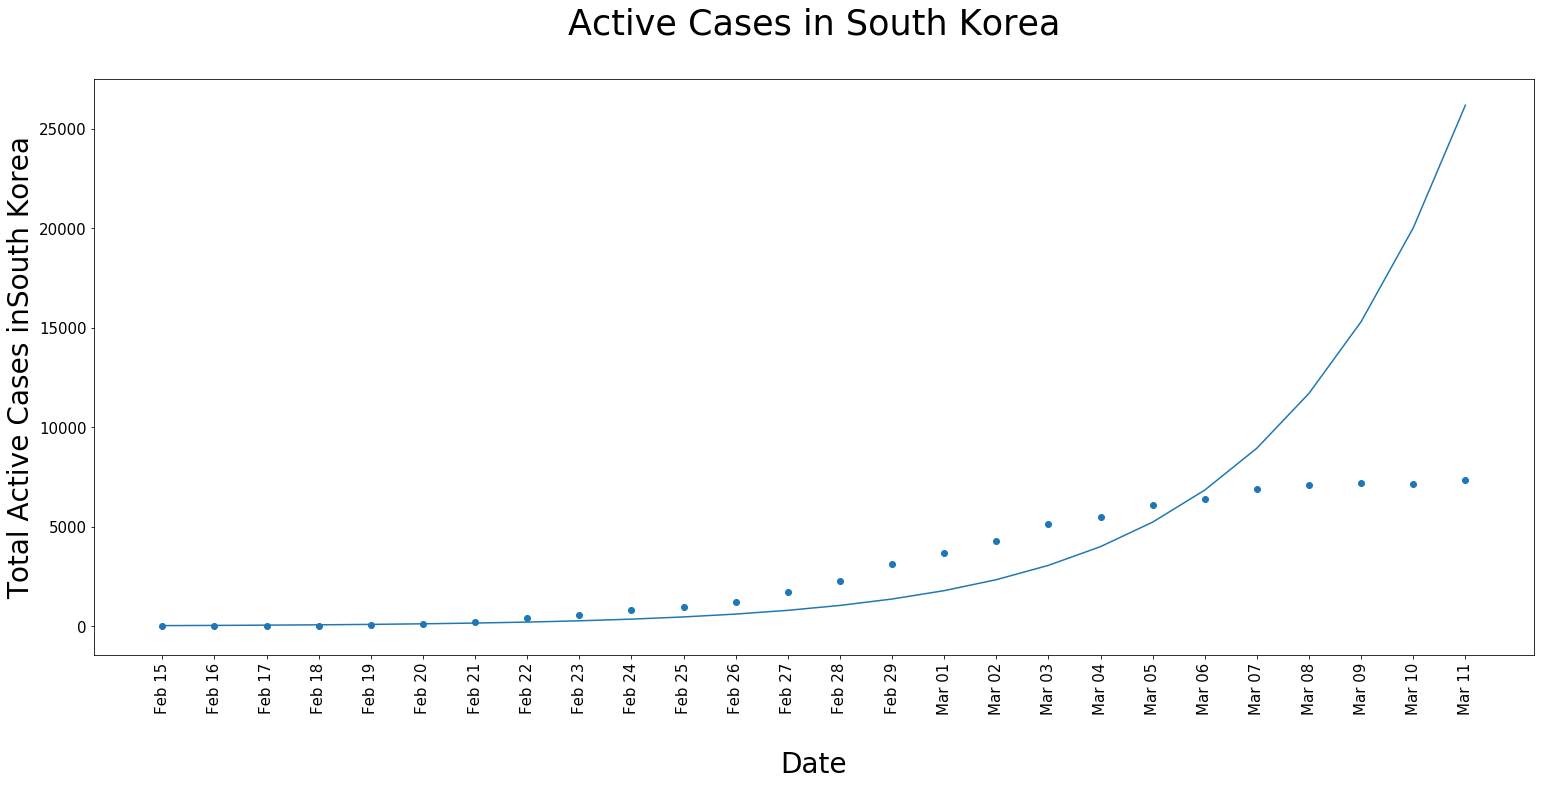

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
active(date,y,ypred,"South Korea")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = 999.4408 + -565.8759x + 69.6722x^2 + -1.4701x^3
R^2 adalah 0.991257867361708


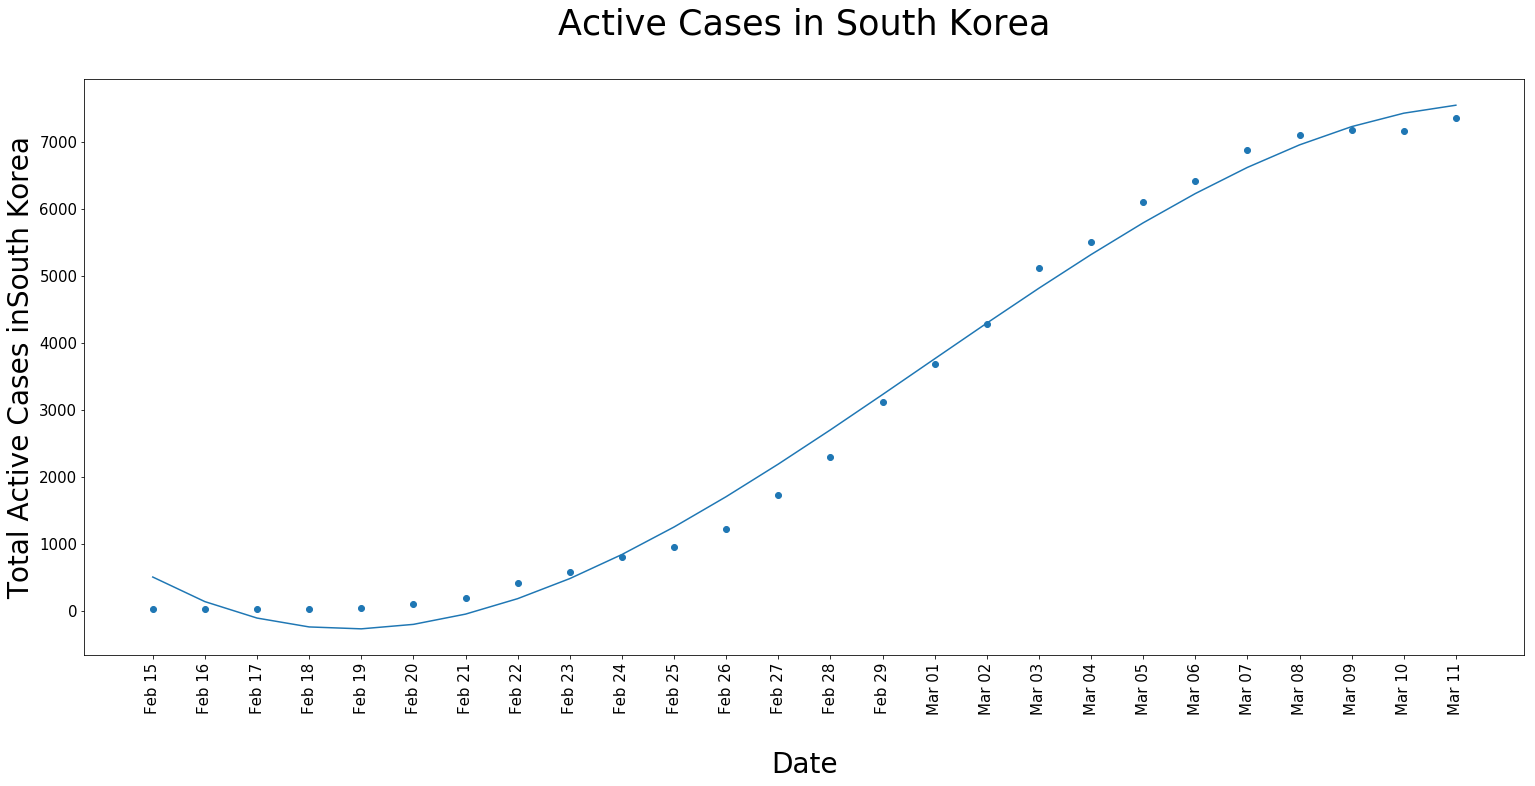

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
active(date,y,ypred,"South Korea")

In [ ]:
def korea_active(x) :
    y = 999.4408  -565.8759*x + 69.6722*(x**2)  -1.4701*(x**3)
    return y

Model terbaik untuk penambahan kasus di Korea Selatan adalah polinomial orde 3 dengan r^2 score **0.991257867361708**

### Penurunan

In [ ]:
x=list(df.iloc[26:,0])
y=list(df.iloc[26:,1])
date=tgl[26:]
facto('date')
x=list(df.iloc[26:,0])

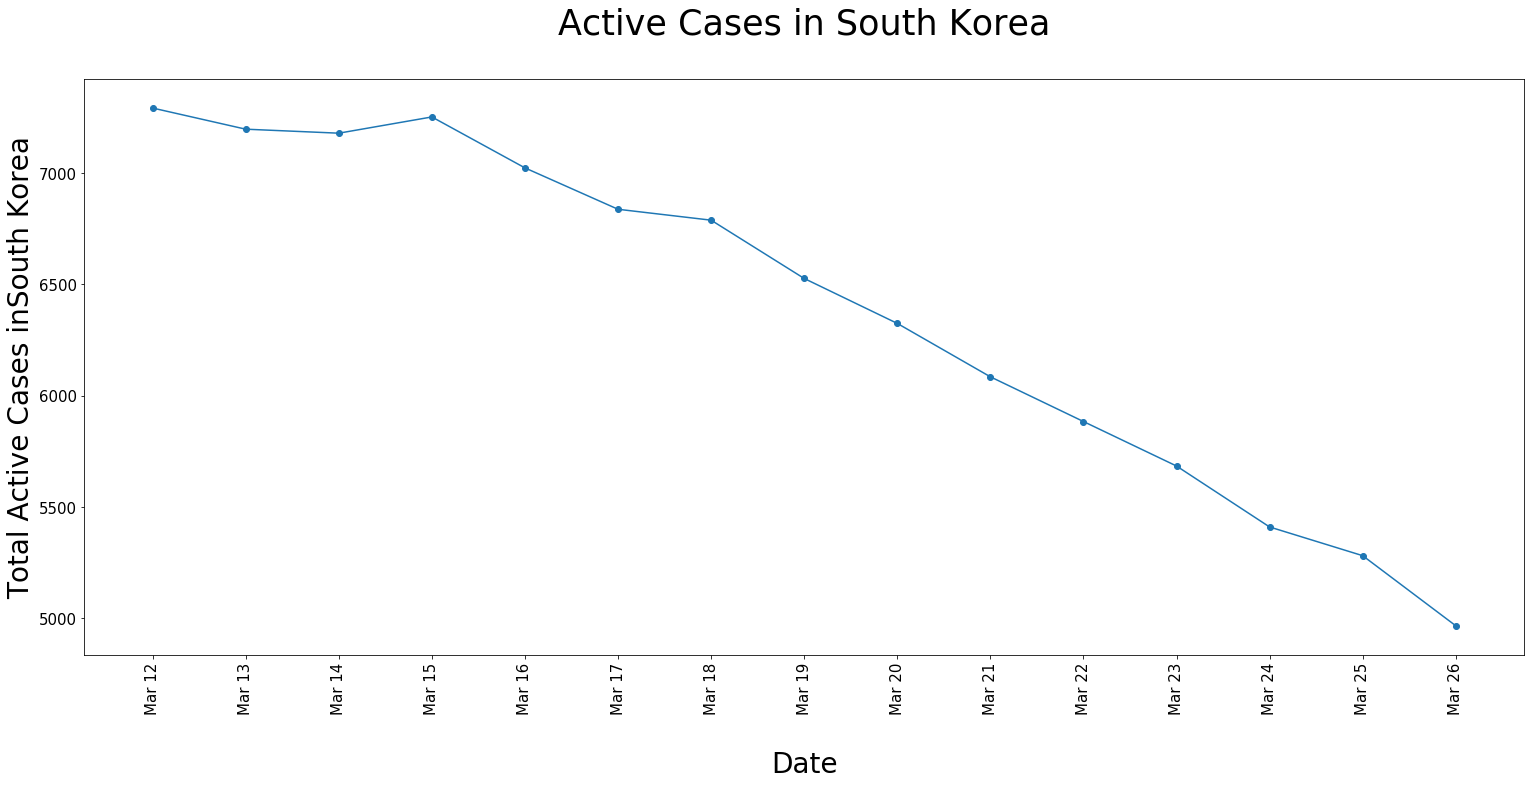

In [ ]:
active(date,y,y,"South Korea")

### Linear

Persamaan regresi linearnya adalah : y = -172.5250x + 12248.3167
R^2 adalah 0.9594167440851492


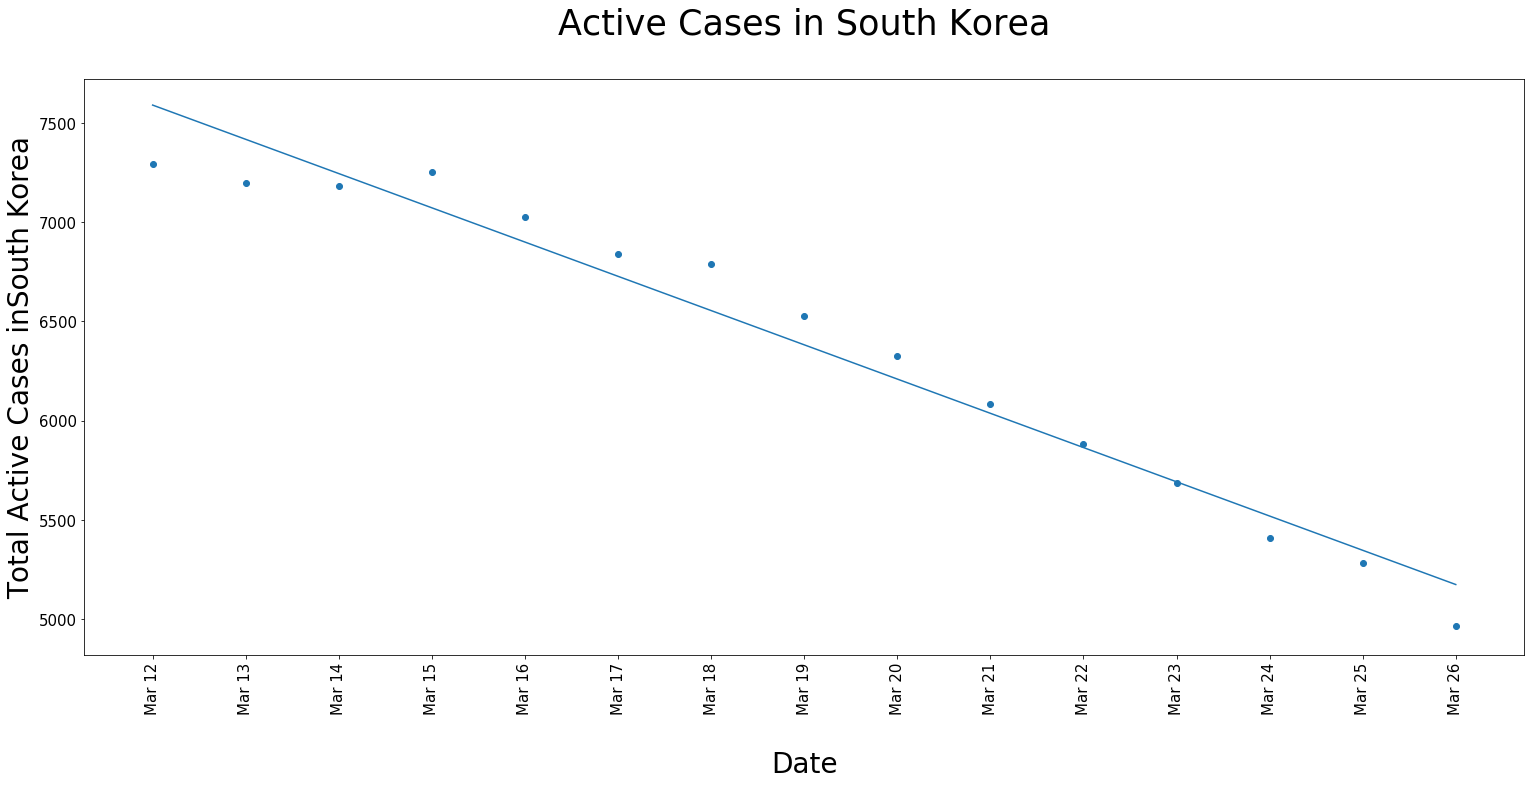

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
active(date,y,ypred,"South Korea")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 160828.36684210374x^-0.9192919998747706
R^2 adalah 0.9166933594511287


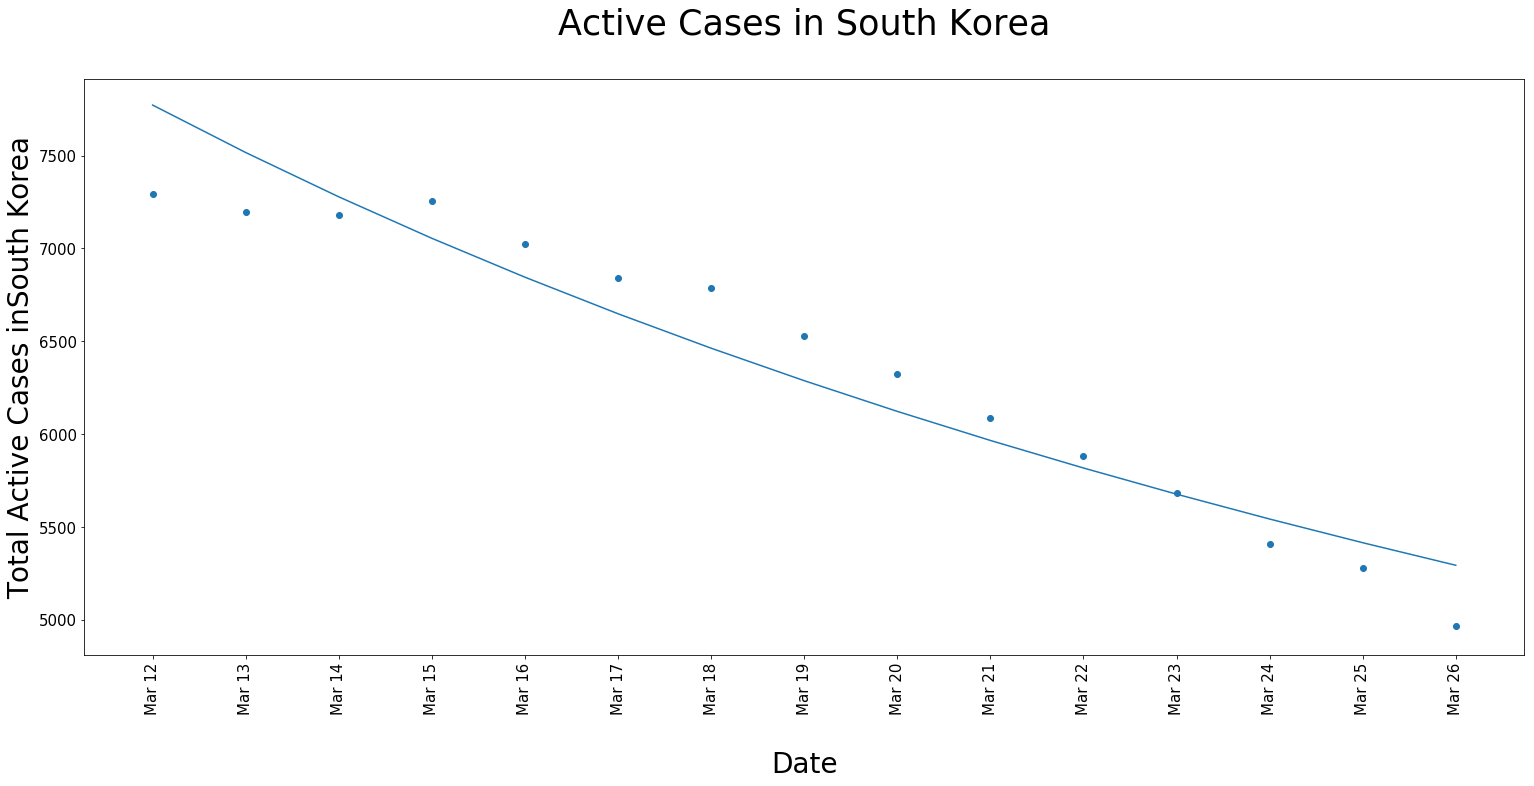

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
active(date,y,ypred,"South Korea")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 16282.5330e^-0.0278x
R^2 adalah 0.9447594133775954


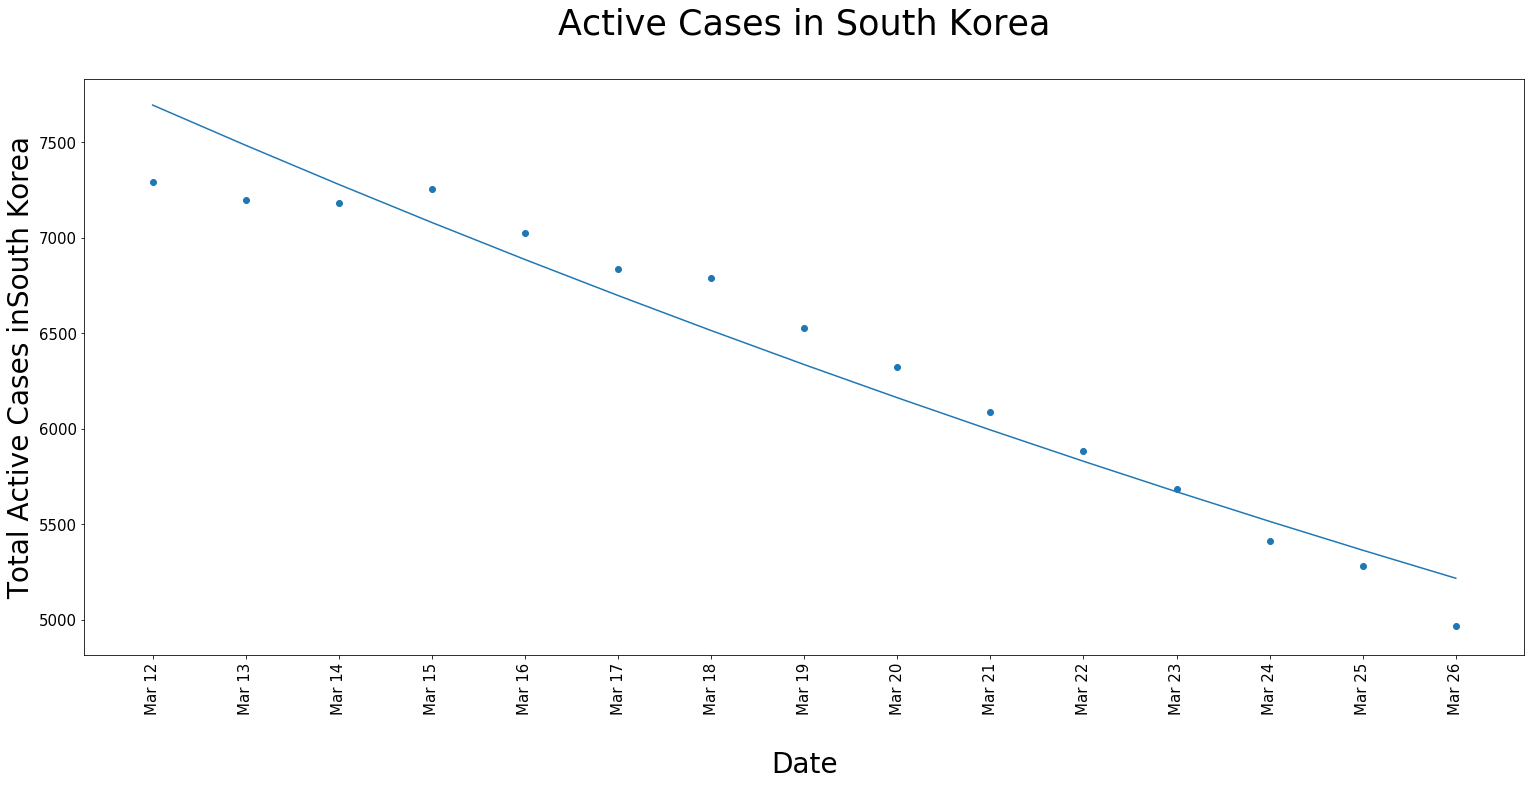

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
active(date,y,ypred,"South Korea")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -25421.5614 + 2930.5381x + -83.6444x^2 + 0.7382x^3
R^2 adalah 0.9961008112747503


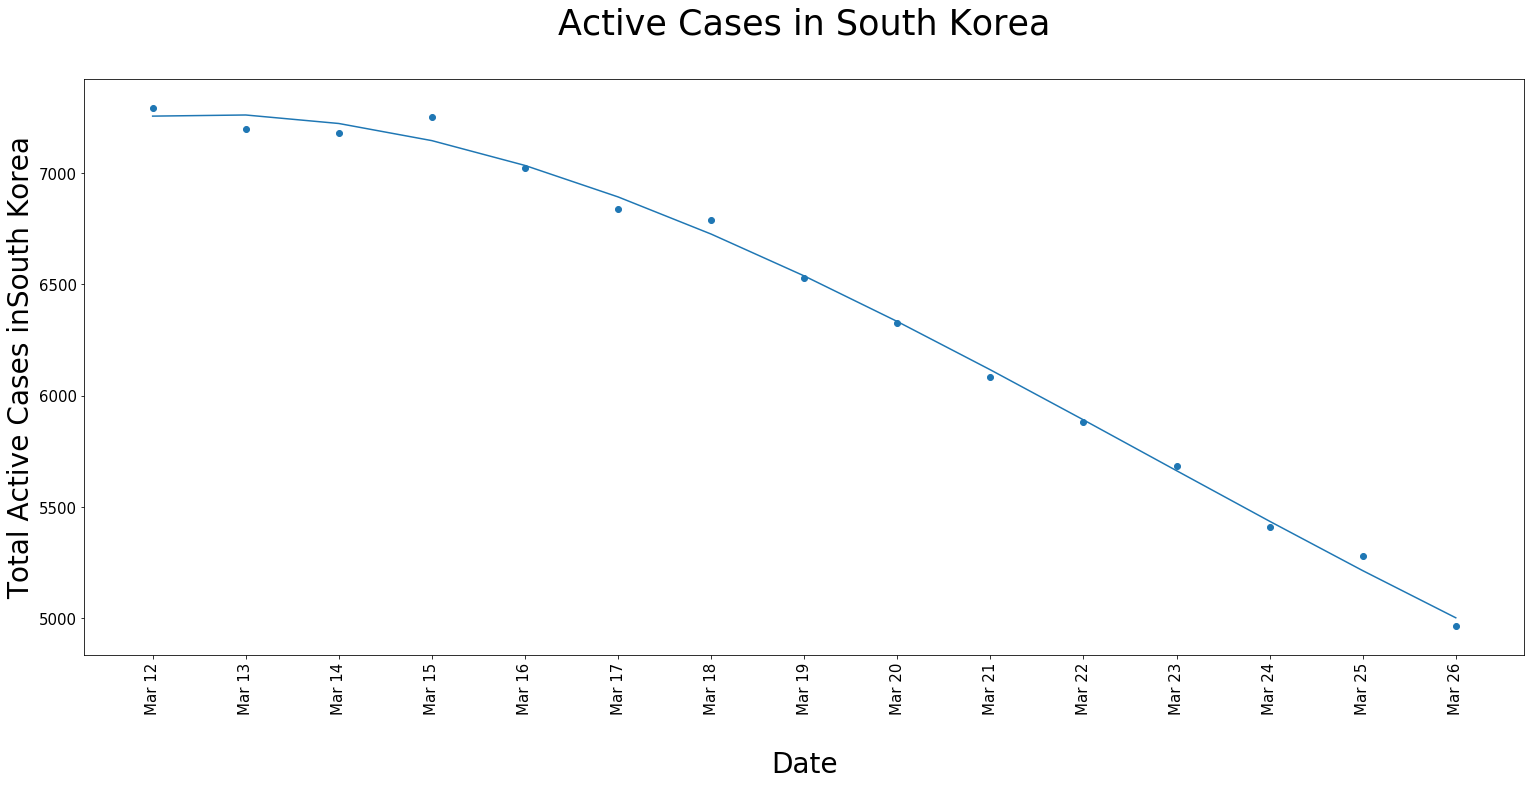

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
active(date,y,ypred,"South Korea")

Model terbaik untuk pengurangan kasus di Korea Selatan adalah polinomial orde 3 dengan r^2 score **0.9961008112747503**

### B. Total Deaths

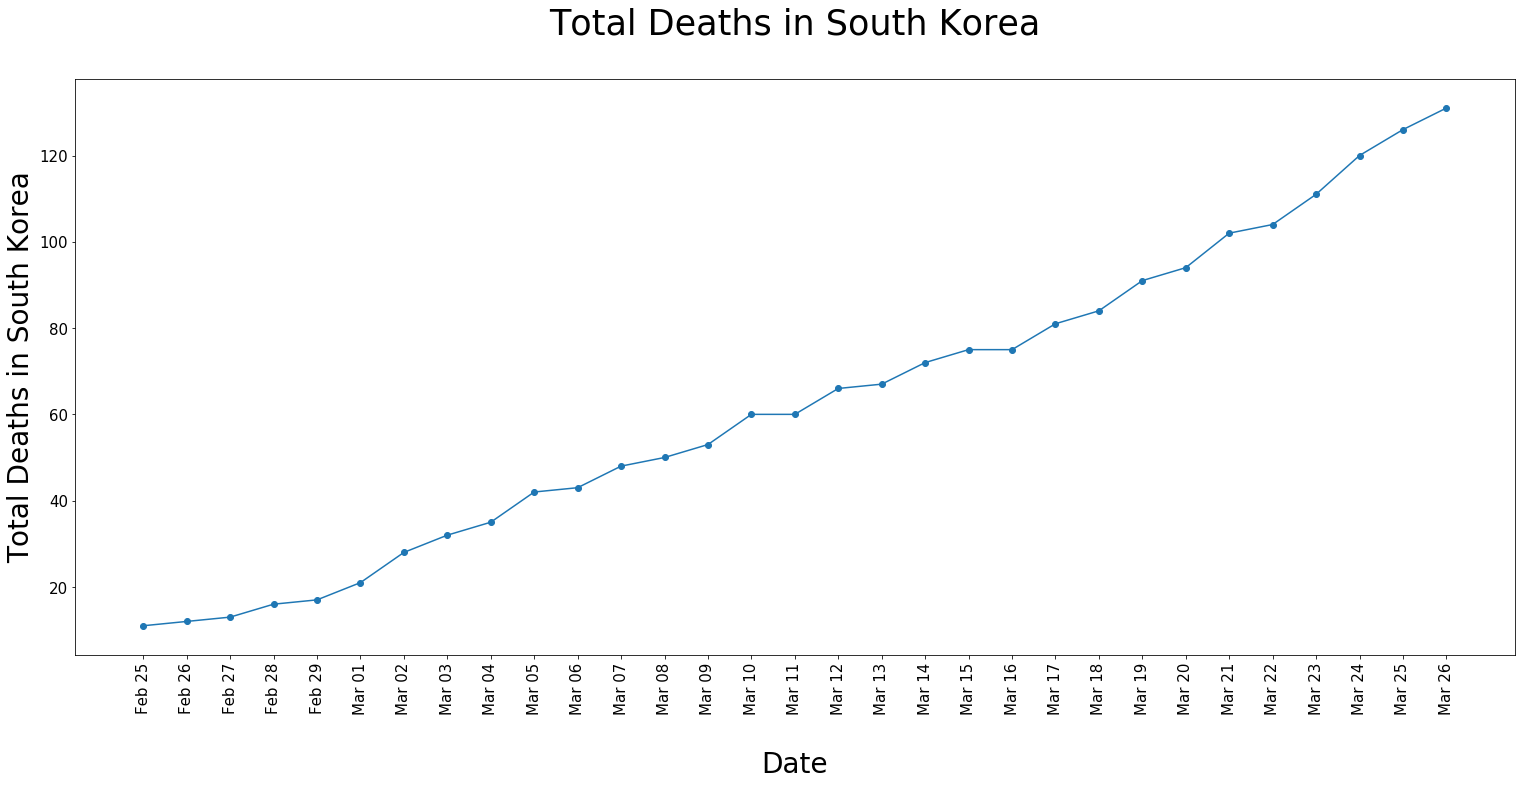

In [ ]:
y=list(df.iloc[10:,2])
x=list(df.iloc[10:,0])
tgl=tgl[10:]
death(tgl,y,y,"South Korea")

### Linear

Persamaan regresi linearnya adalah : y = 3.9133x + -39.1653
R^2 adalah 0.9873930176874628


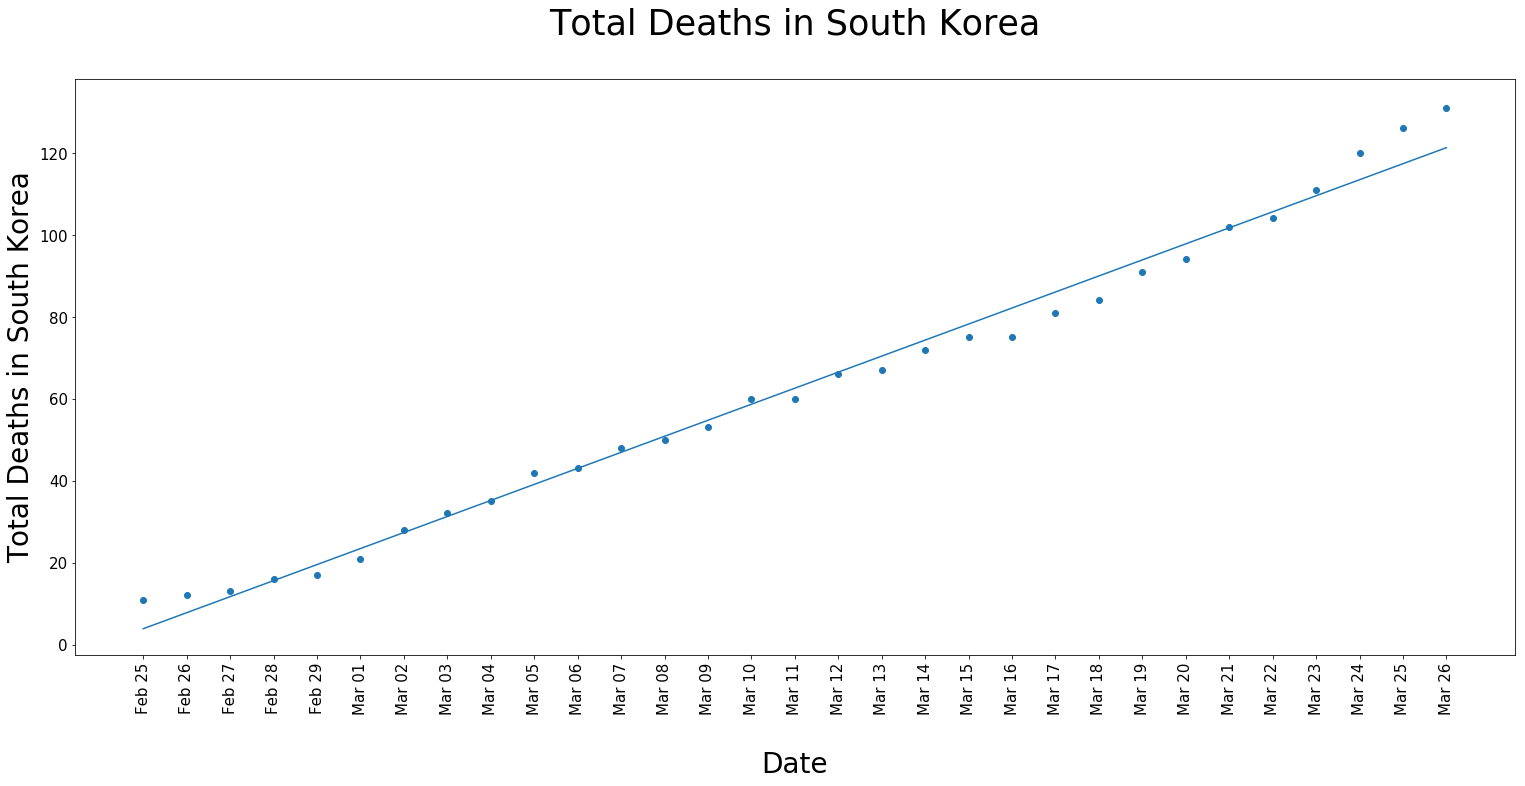

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
death(tgl,y,ypred,"South Korea")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.11822124806195247x^1.8977783803060717
R^2 adalah 0.9844020152427623


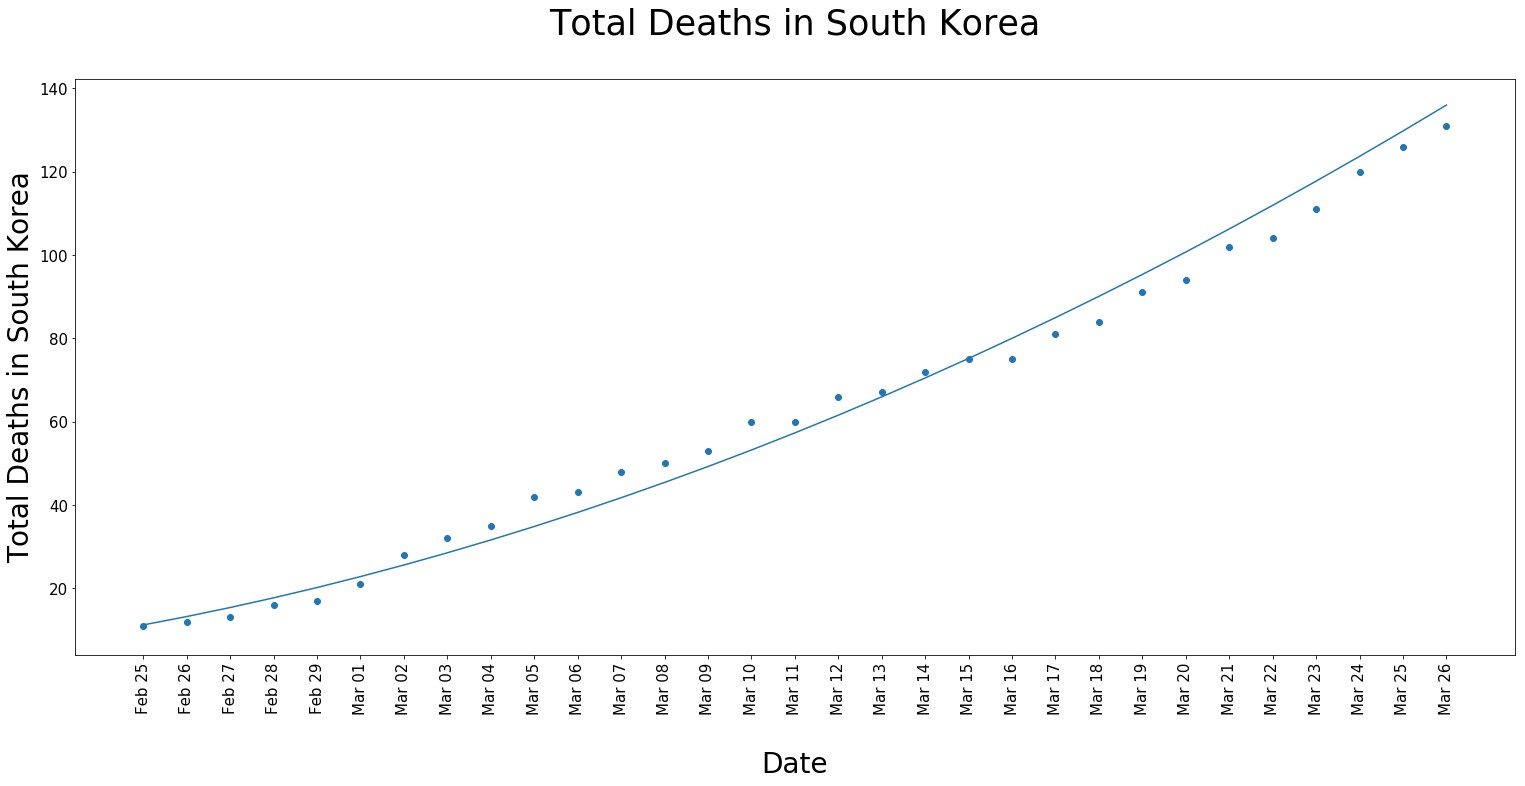

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
death(tgl,y,ypred,"South Korea")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 6.6363e^0.0780x
R^2 adalah 0.9287268871851024


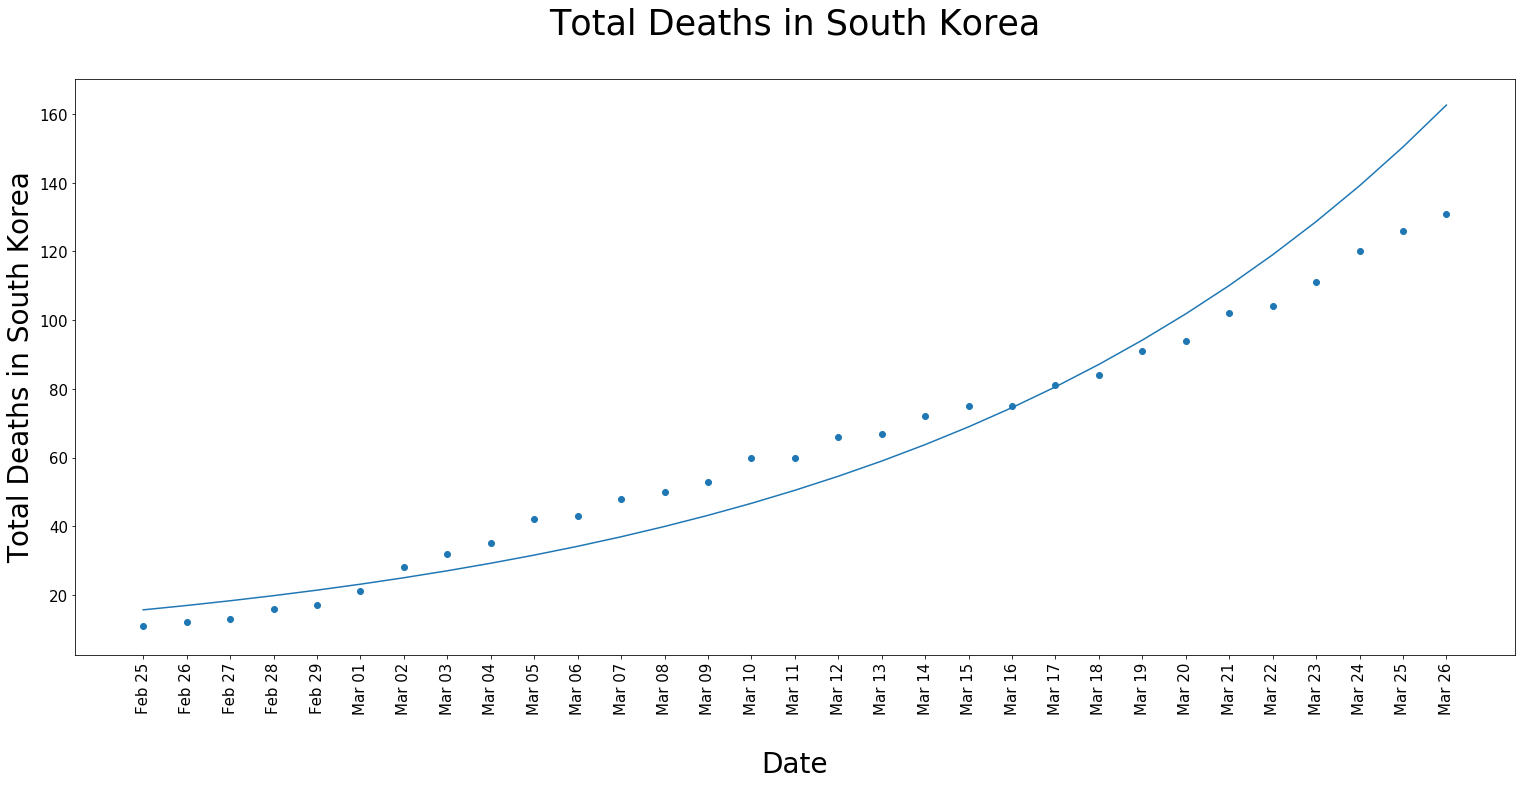

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
death(tgl,y,ypred,"South Korea")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -56.4323 + 7.3958x + -0.1889x^2 + 0.0029x^3
R^2 adalah 0.9957307649740931


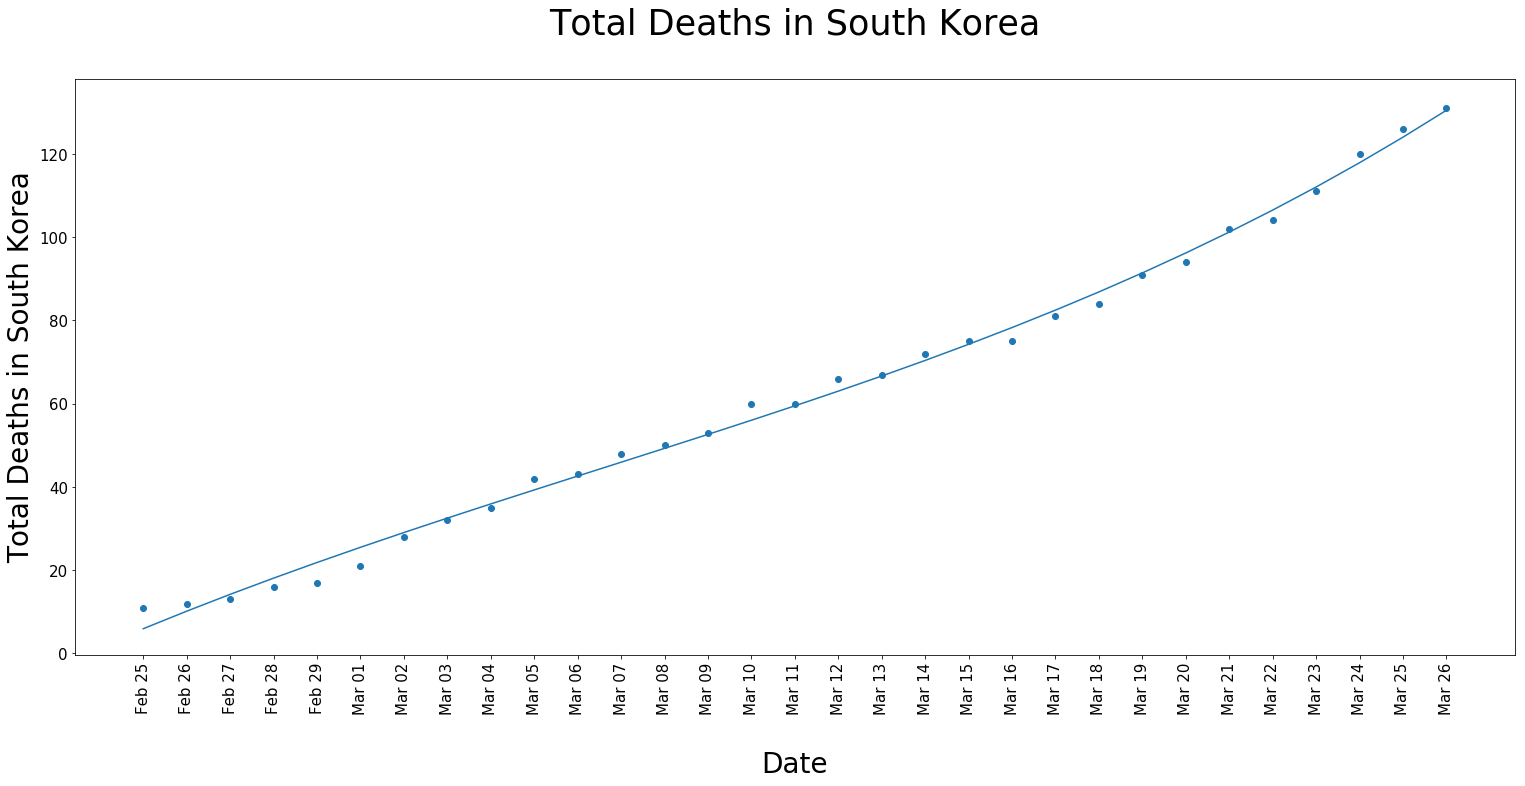

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
death(tgl,y,ypred,"South Korea")

In [ ]:
def korea_death(x) :
    y = -56.4323 + 7.3958*x  -0.1889*(x**2) + 0.0029*(x**3)
    return y

Model terbaik untuk kematian total di china adalah polinomial orde 3 dengan r^2 score **0.9957307649740931**

## 3.3. Italia

In [ ]:
df=pd.read_csv('../input/italy.csv')

### A. Active Cases

In [ ]:
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
date=x
facto('date')
x=list(df.iloc[:,0])

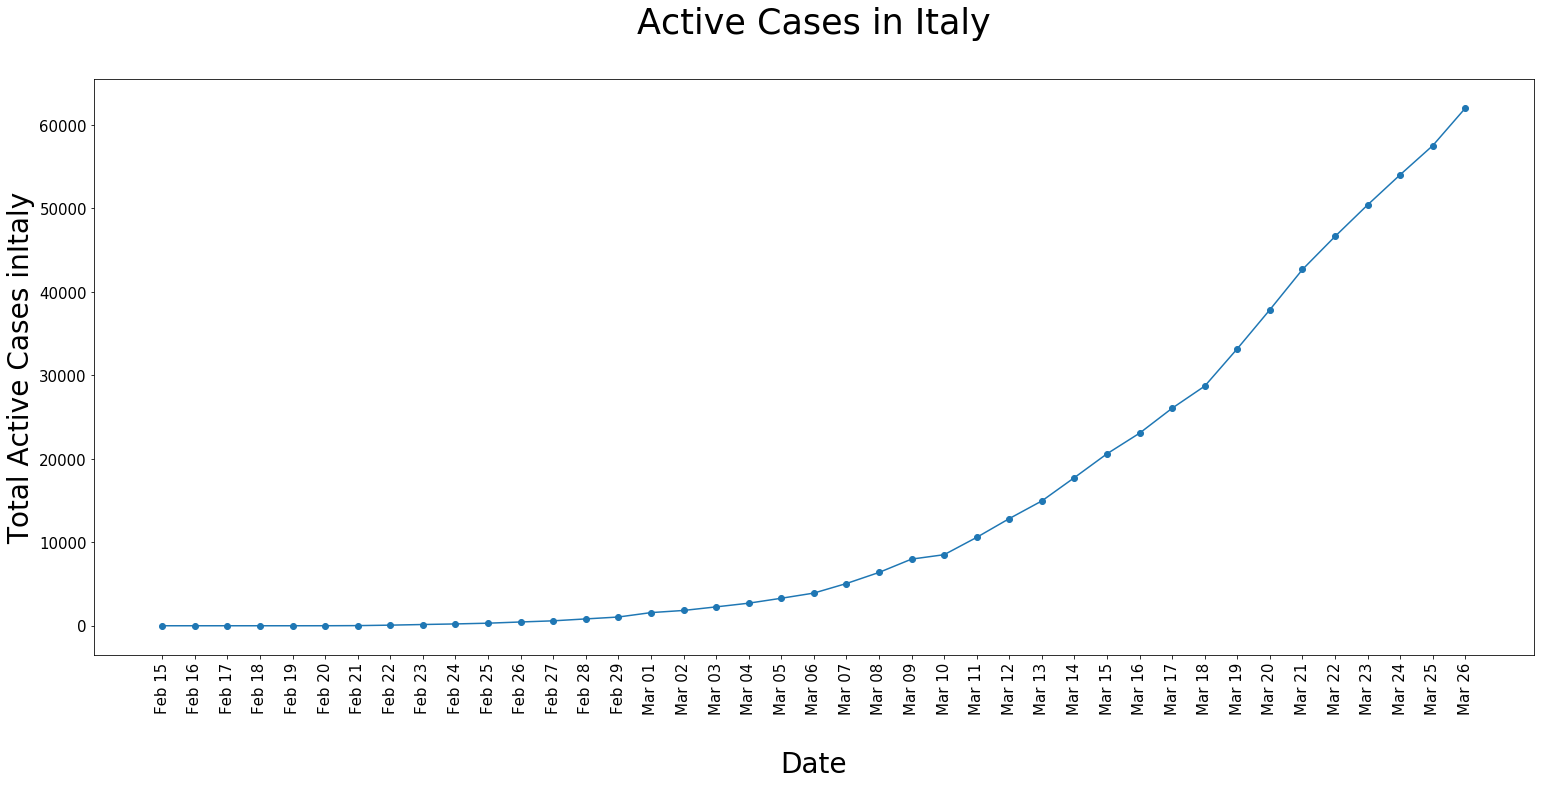

In [ ]:
active(date,y,y,"Italy")

### Linear

Persamaan regresi linearnya adalah : y = 1385.0308x + -14788.3793
R^2 adalah 0.7704362324700177


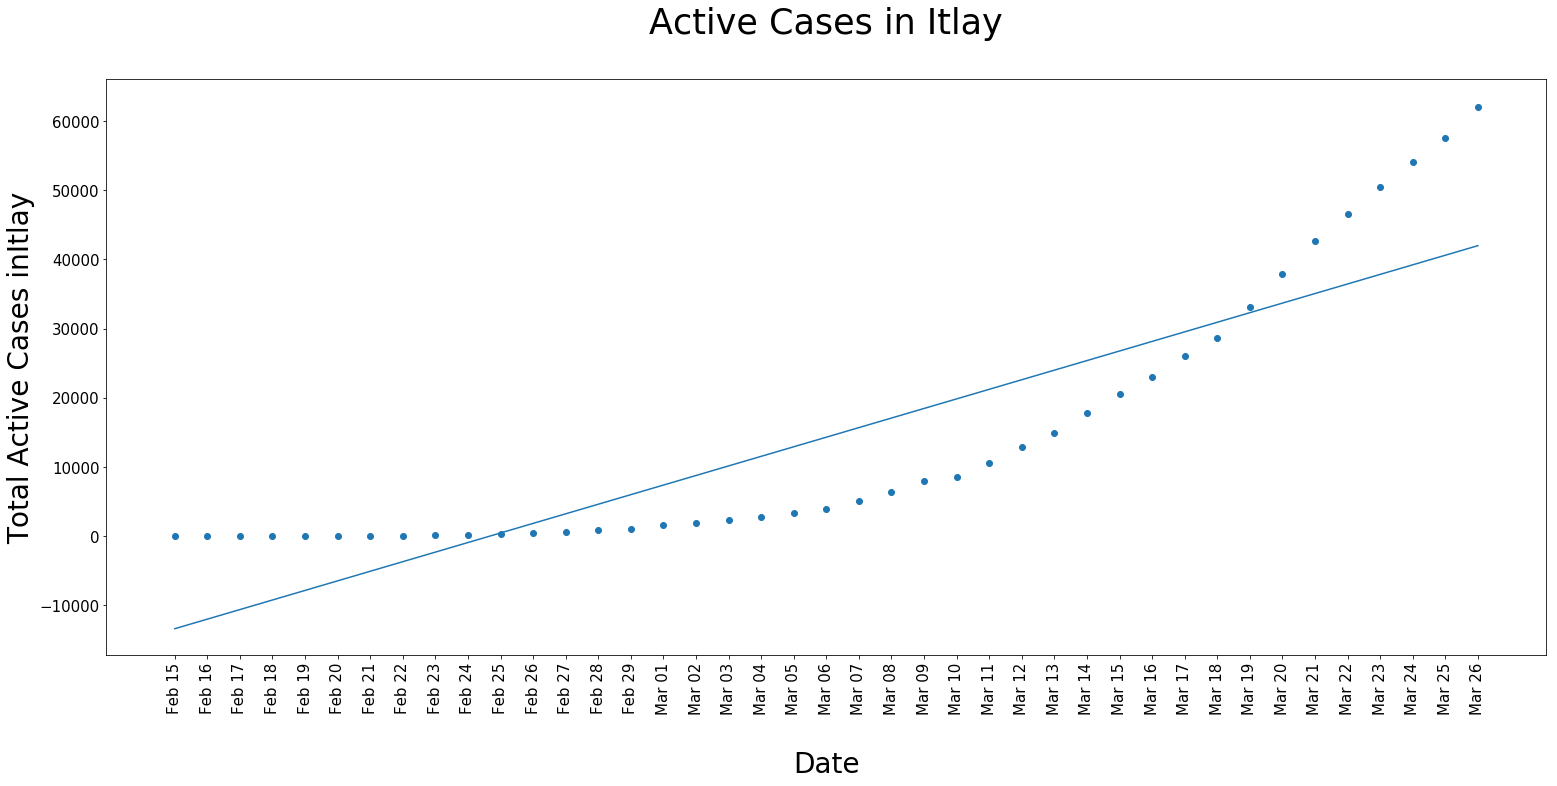

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
active(date,y,ypred,"Itlay")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.07374047915400343x^3.5971193027124744
R^2 adalah 0.9261699200356428


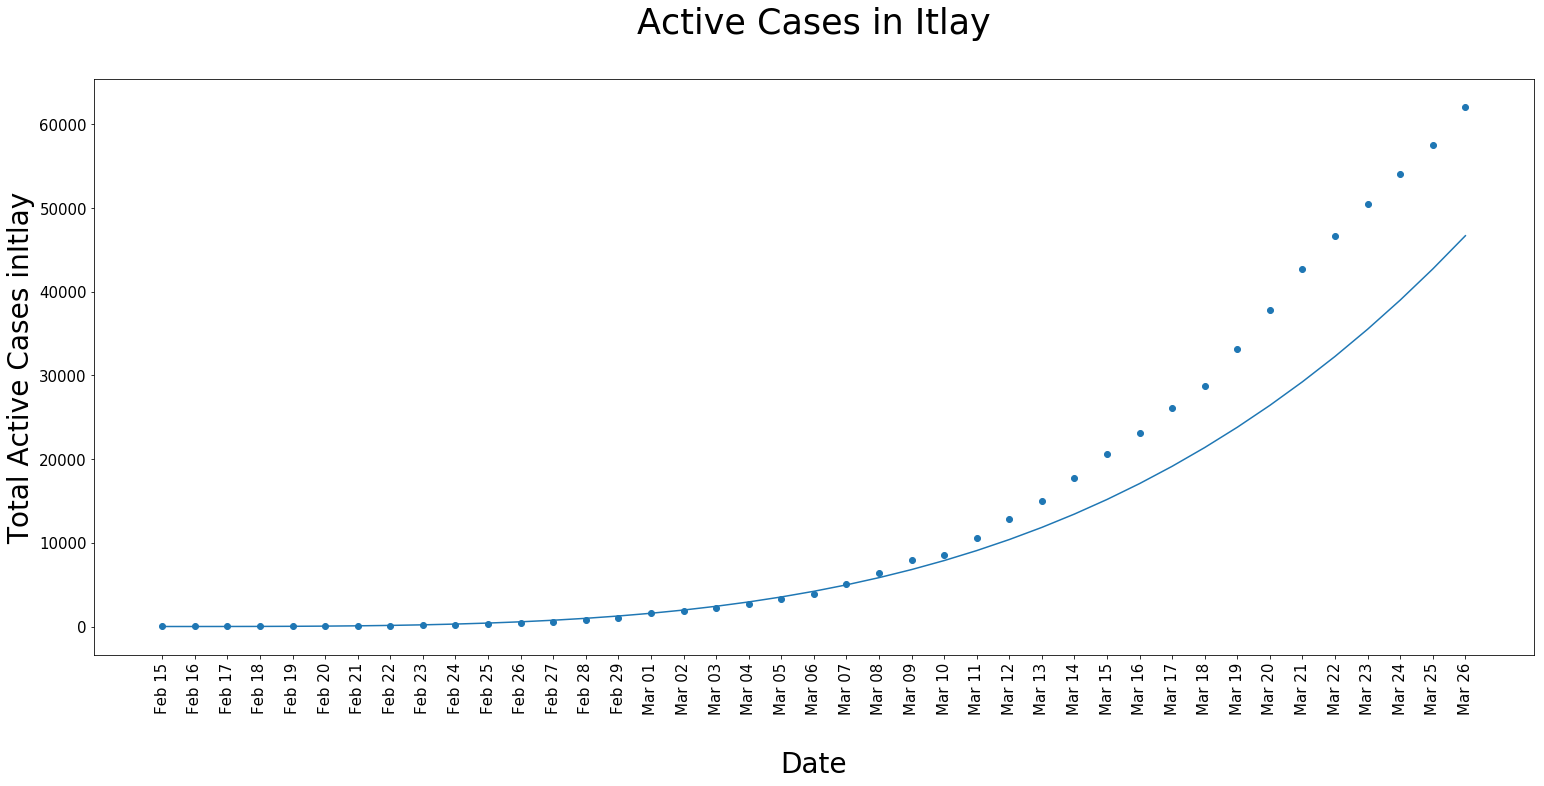

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
active(date,y,ypred,"Itlay")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 7.1614e^0.2585x
R^2 adalah 0.8961325319729389


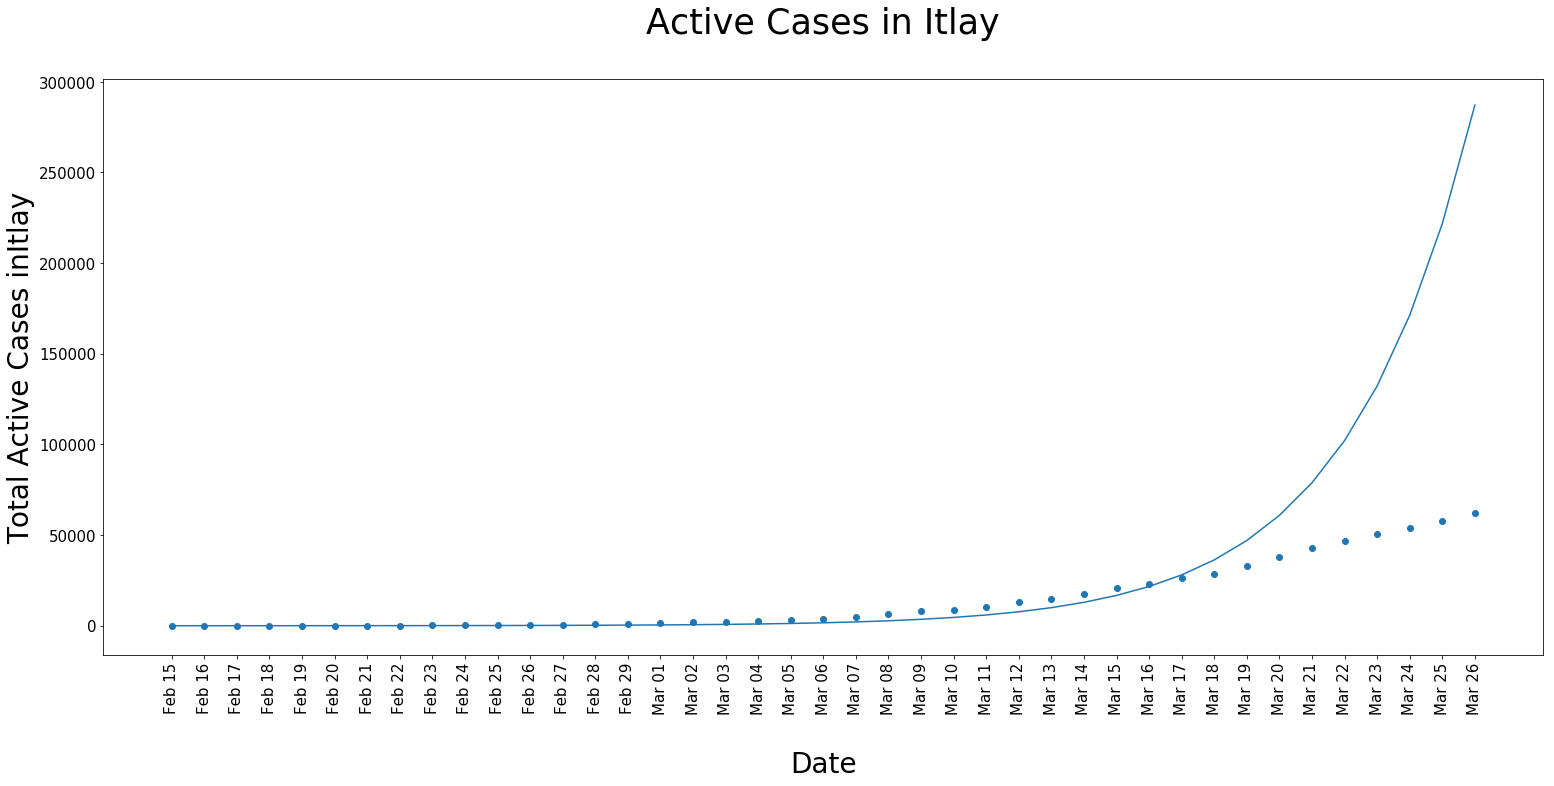

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
active(date,y,ypred,"Itlay")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = 242.8358 + 54.0748x + -23.9166x^2 + 1.4830x^3
R^2 adalah 0.9980193300908486


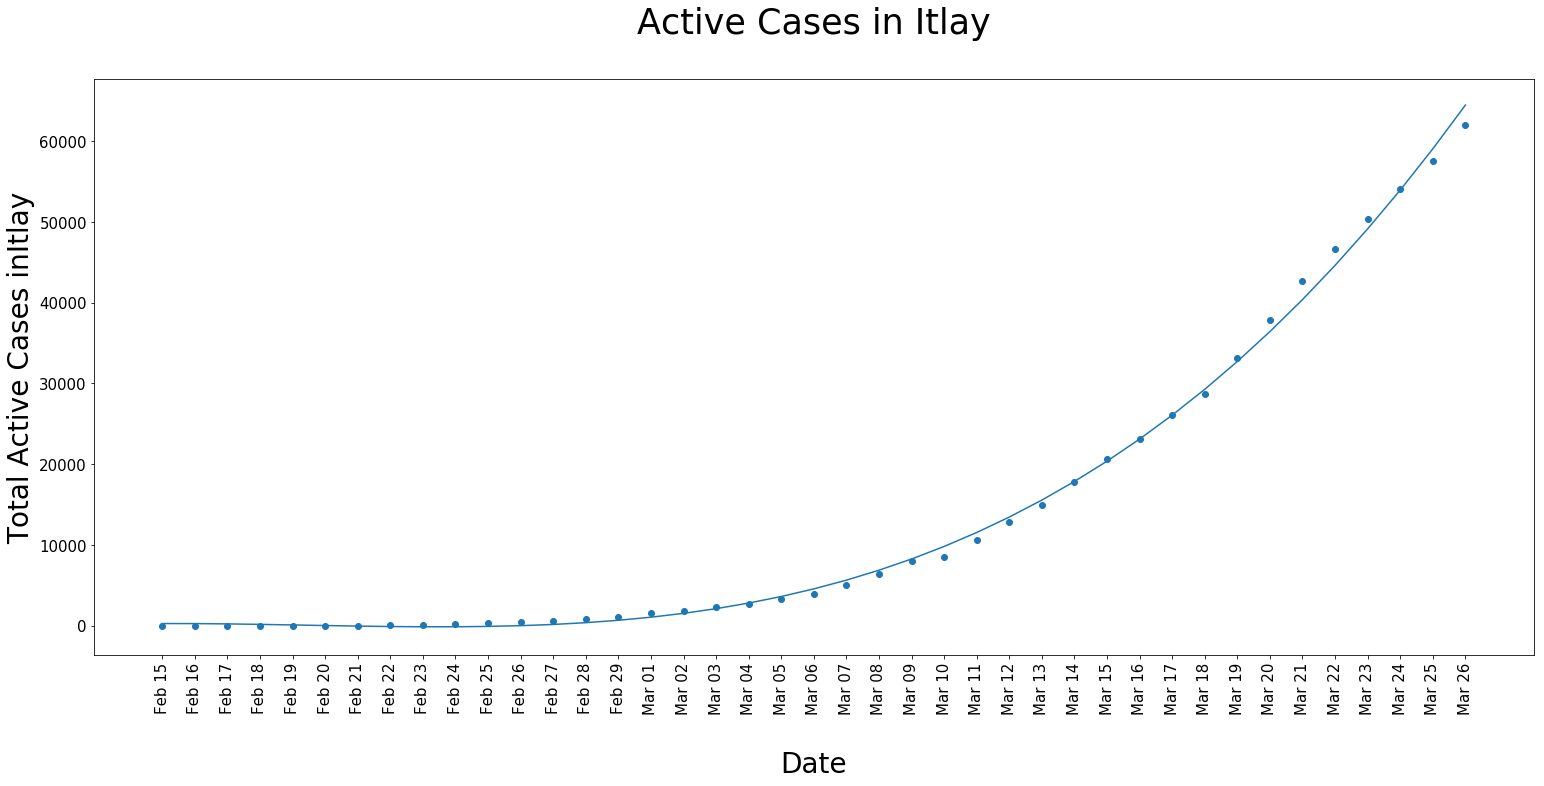

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
active(date,y,ypred,"Itlay")

In [ ]:
def italy_active(x) :
    y = 242.8358 + 54.07488*x -23.9166*(x**2) + 1.4830*(x**3)
    return y

Model terbaik untuk kasus aktif di Italy adalah polinomial orde 3 dengan r^2 score **0.9980193300908486**

### B. Total Deaths

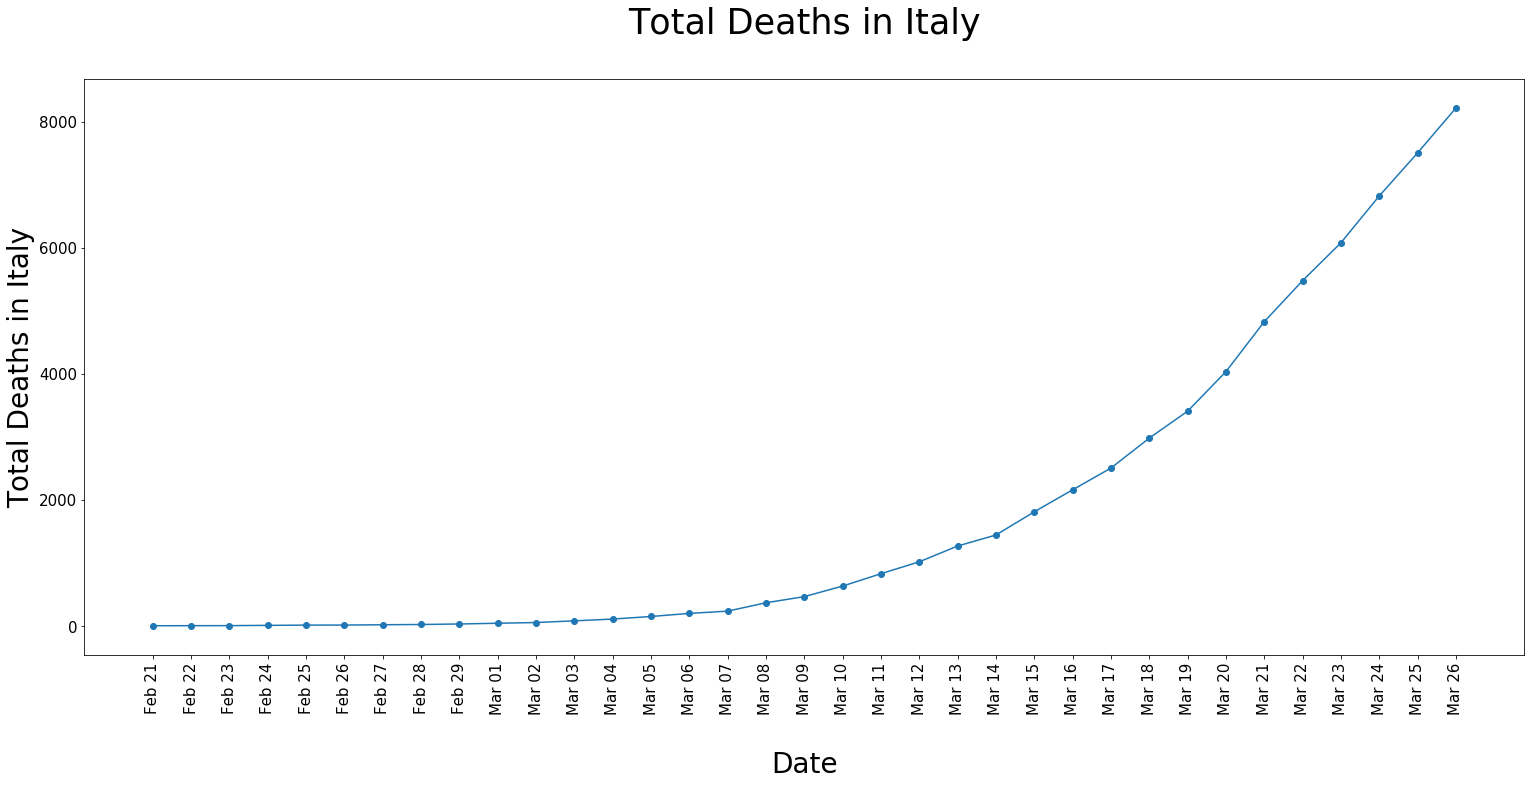

In [ ]:
x=list(df.iloc[6:,0])
y=list(df.iloc[6:,2])
x=np.array(range(1,len(x)+1))
date=date[6:]
death(date,y,y,"Italy")

### Linear

Persamaan regresi linearnya adalah : y = 207.3126x + -1938.1697
R^2 adalah 0.7480590781179


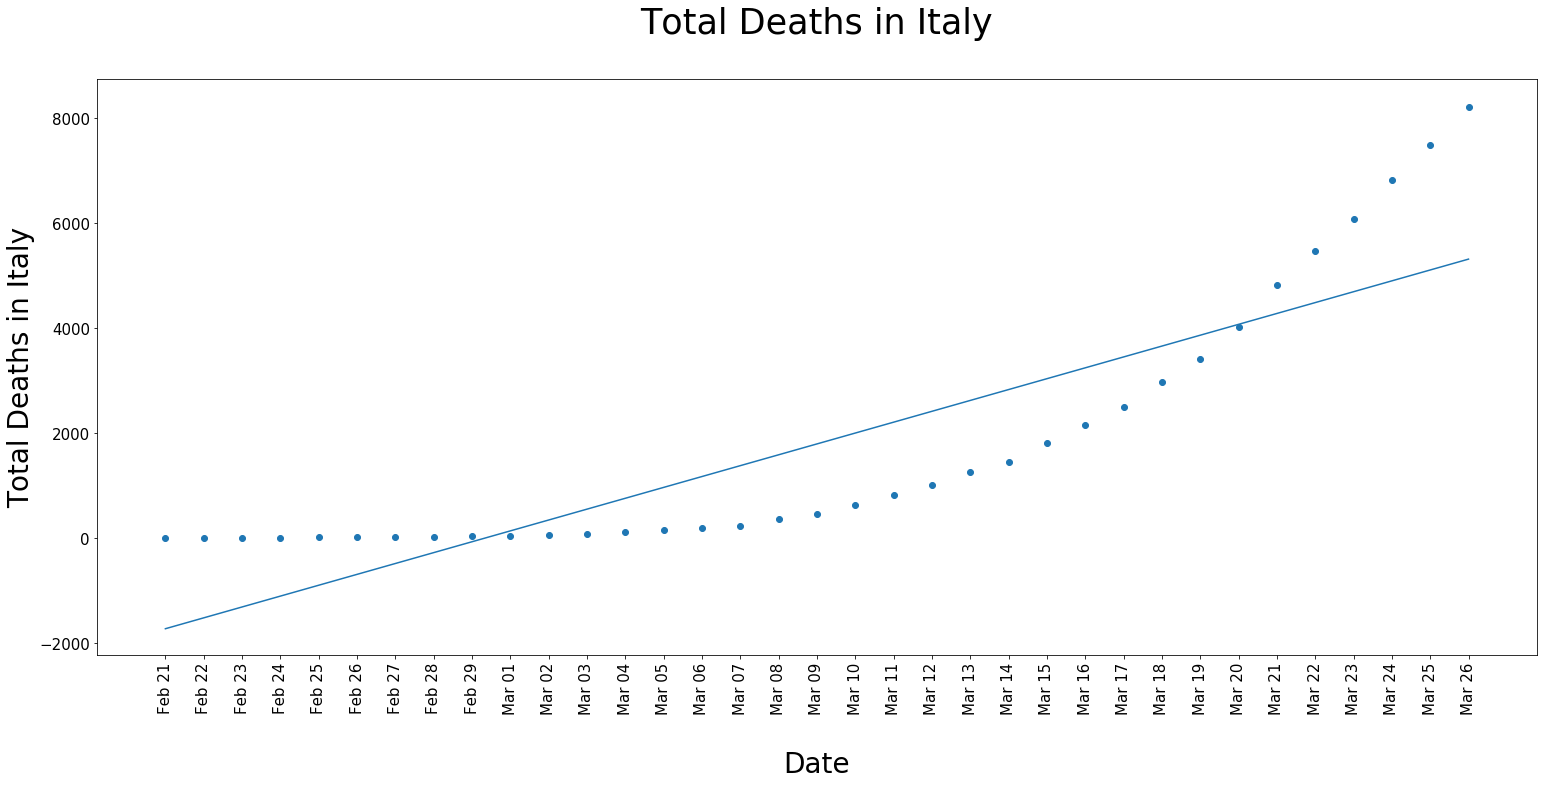

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
death(date,y,ypred,"Italy")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.11189452802009339x^2.968539747282781
R^2 adalah 0.9335984316222627


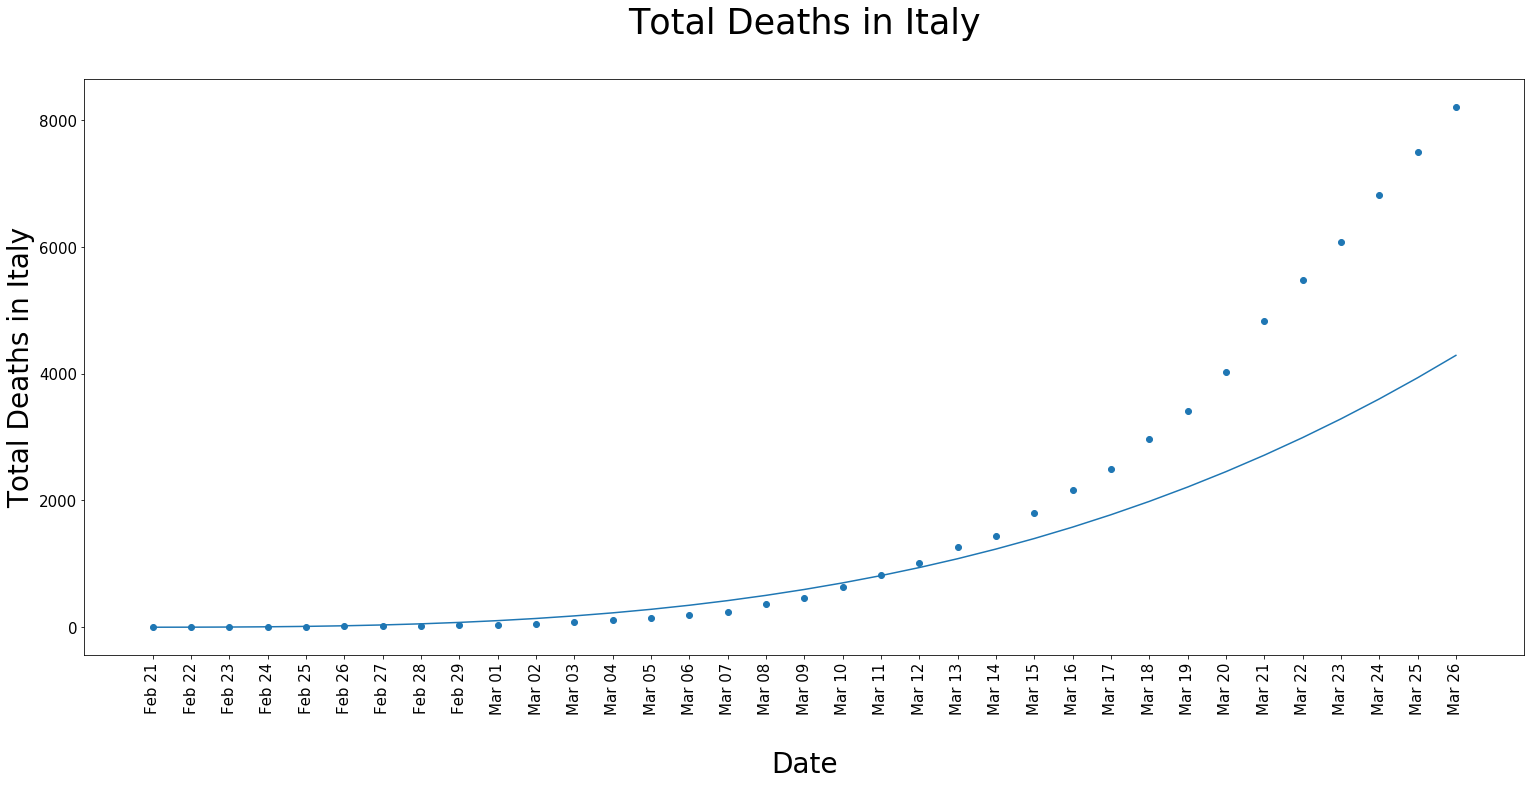

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
death(date,y,ypred,"Italy")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 2.8420e^0.2544x
R^2 adalah 0.9666907738418618


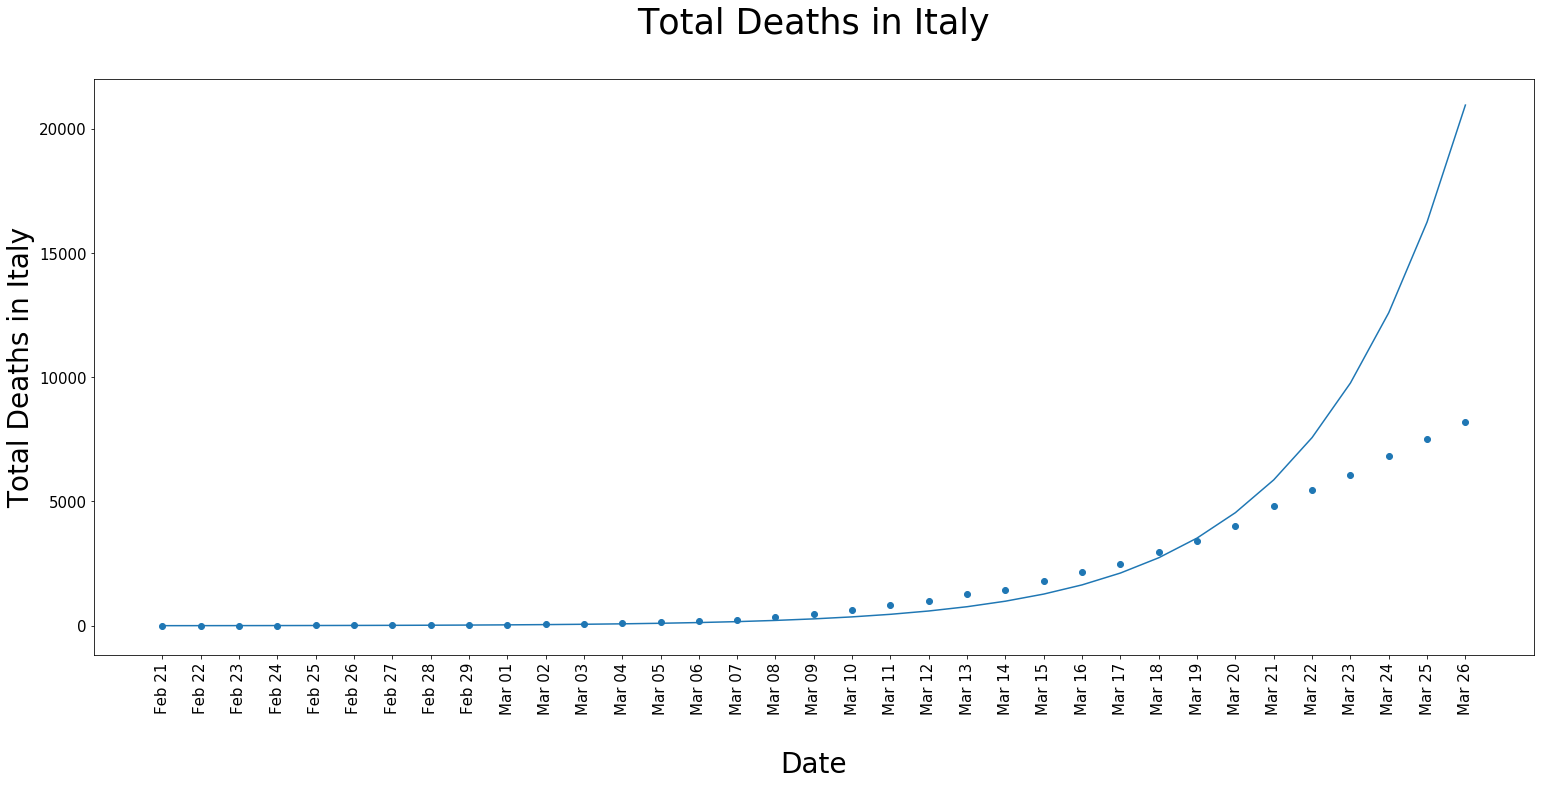

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
death(date,y,ypred,"Italy")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -67.0005 + 50.9006x + -8.1316x^2 + 0.3887x^3
R^2 adalah 0.9991171080426539


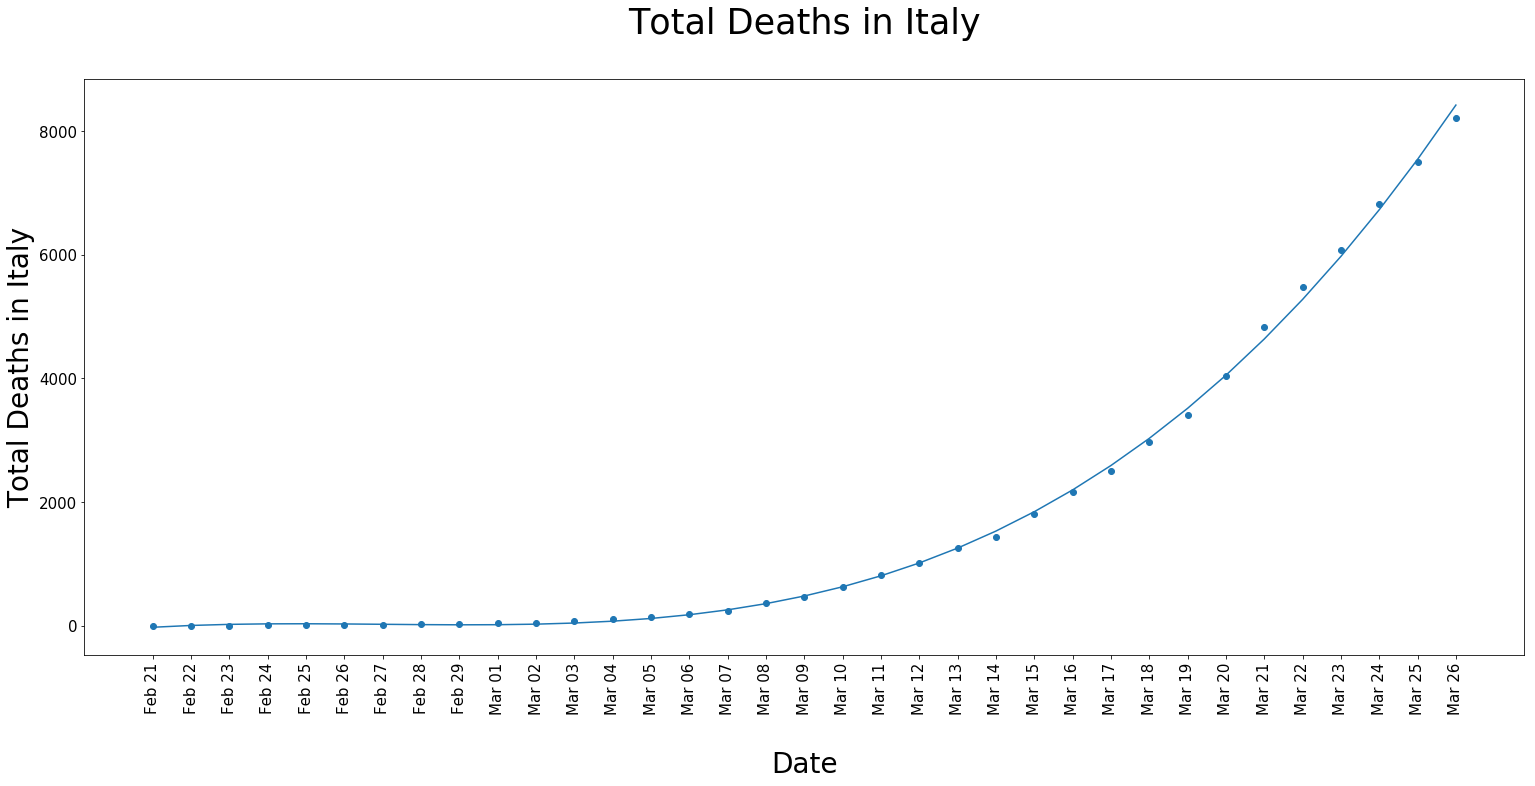

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
death(date,y,ypred,"Italy")

In [ ]:
def italy_death(x) :
    y = -67.0005 + 50.9006*x  -8.1316*(x**2) + 0.3887*(x**3)
    return y

Model terbaik untuk kematian total di Italy adalah polinomial orde 3 dengan r^2 score **0.9991171080426539**

## 3.6. Jerman

In [ ]:
df=pd.read_csv('../input/germany.csv')

### A. Active Cases

In [ ]:
tgl=list(df.iloc[:,0])
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
date=x
facto('date')
x=list(df.iloc[:,0])

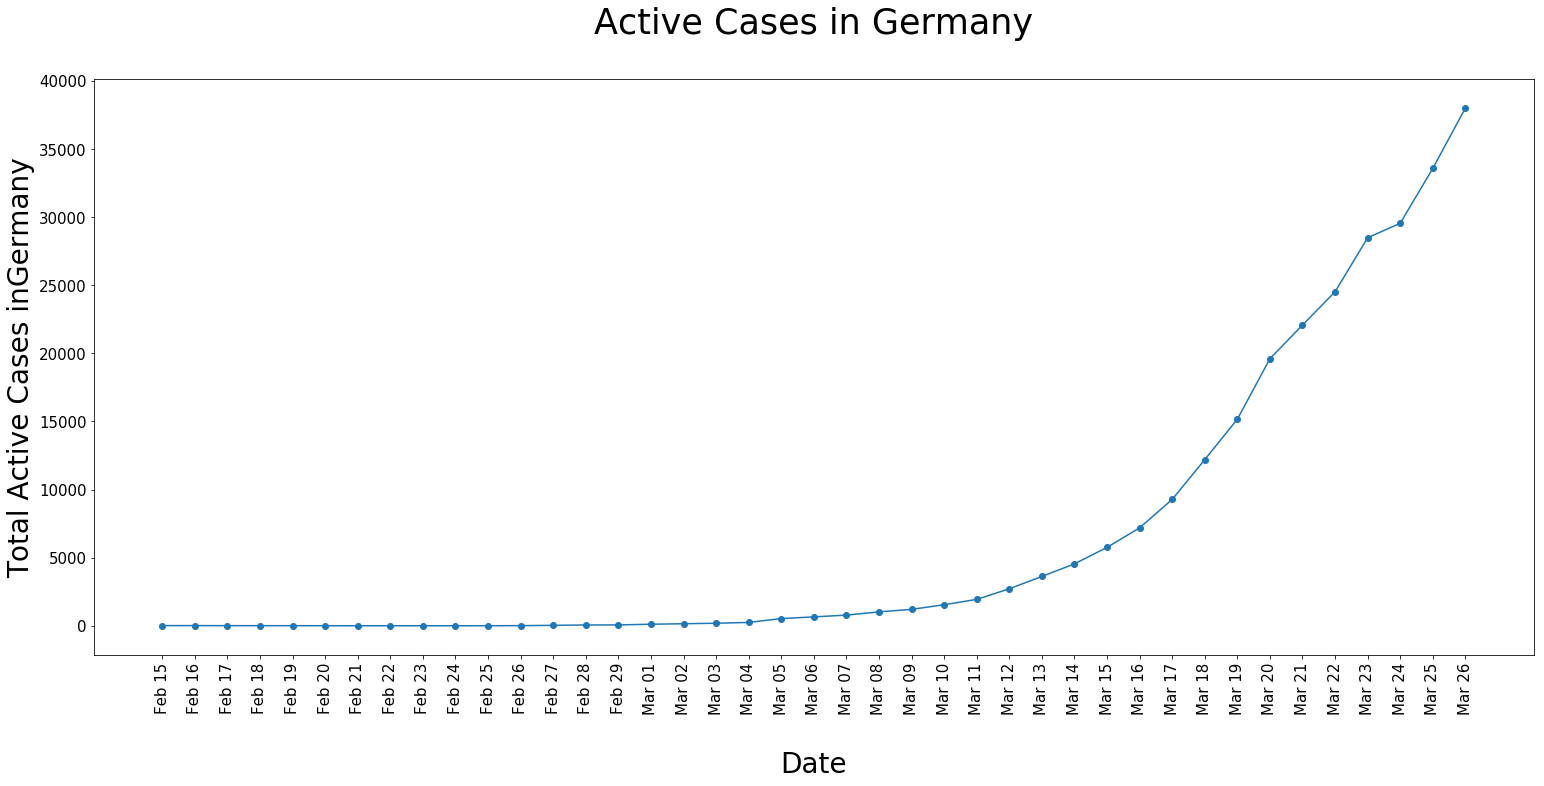

In [ ]:
active(date,y,y,"Germany")

### Linear

Persamaan regresi linearnya adalah : y = 710.0714x + -8452.5244
R^2 adalah 0.626851853437025


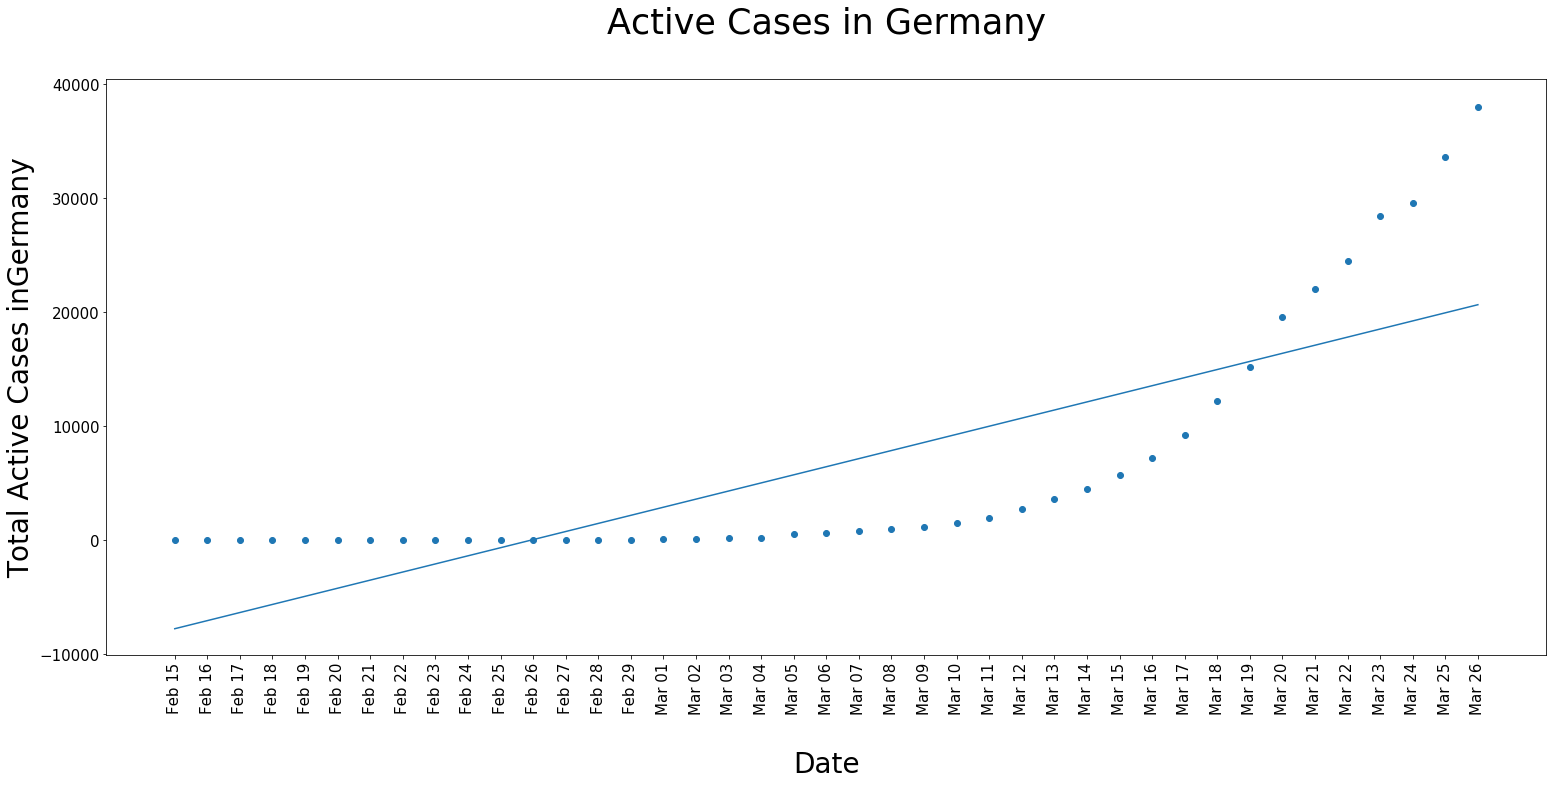

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
active(date,y,ypred,"Germany")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.048265011527749674x^3.2015946765437
R^2 adalah 0.6871390939747095


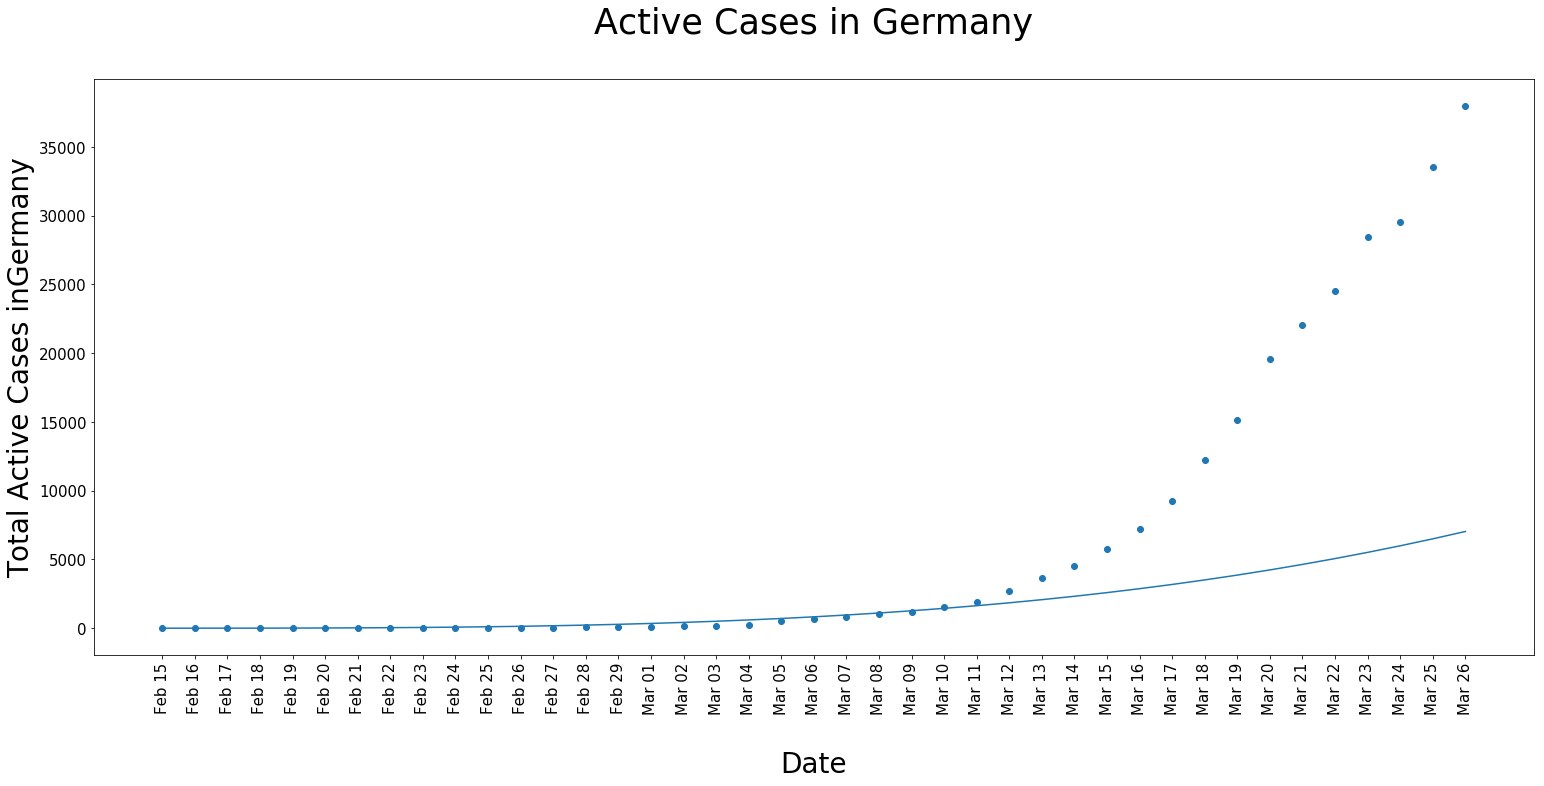

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
active(date,y,ypred,"Germany")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 1.1812e^0.2718x
R^2 adalah 0.9275074819880896


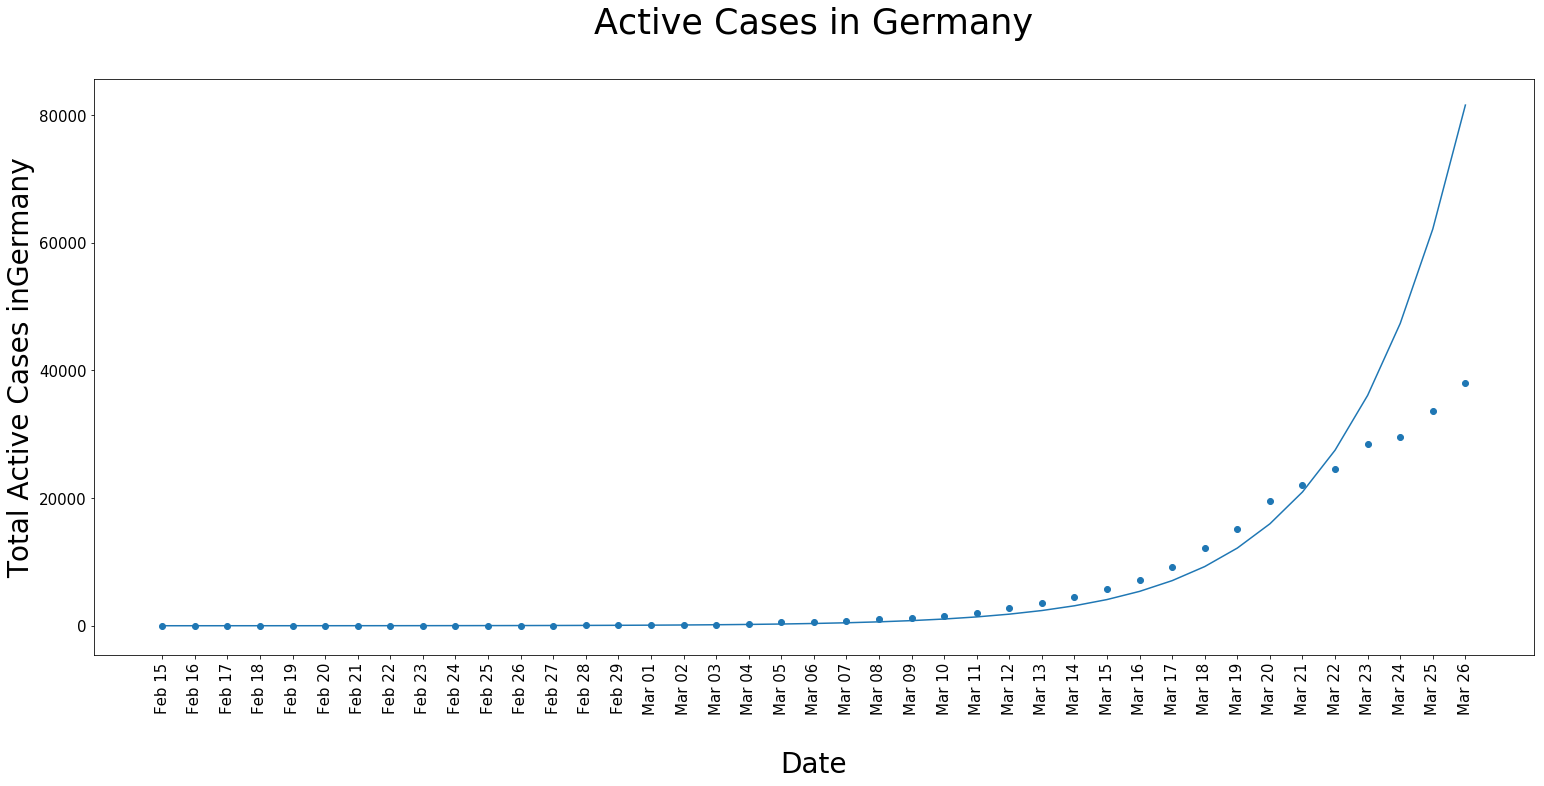

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
active(date,y,ypred,"Germany")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -1722.0683 + 752.8608x + -72.2599x^2 + 1.9000x^3
R^2 adalah 0.9936092310042886


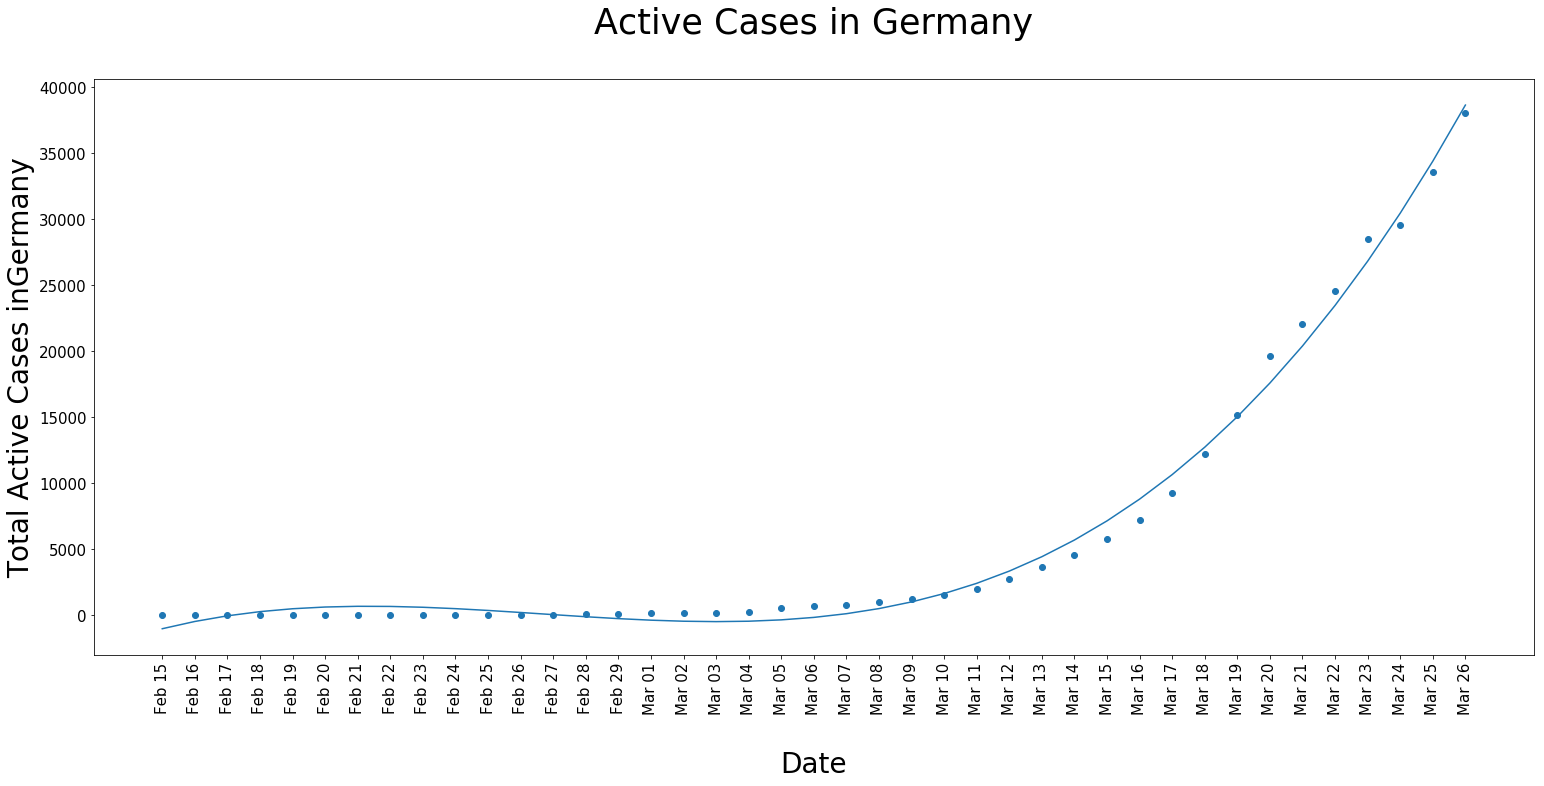

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
active(date,y,ypred,"Germany")

In [ ]:
def germany_active(x) :
    y = -1722.0683 + 752.8608*x -72.2599*(x**2) + 1.9000*(x**3)
    return y

Model terbaik untuk kasus aktif di Jerman adalah regresi polinomial orde 3 dengan r^2 score **0.9936092310042886**

### B. Total Deaths

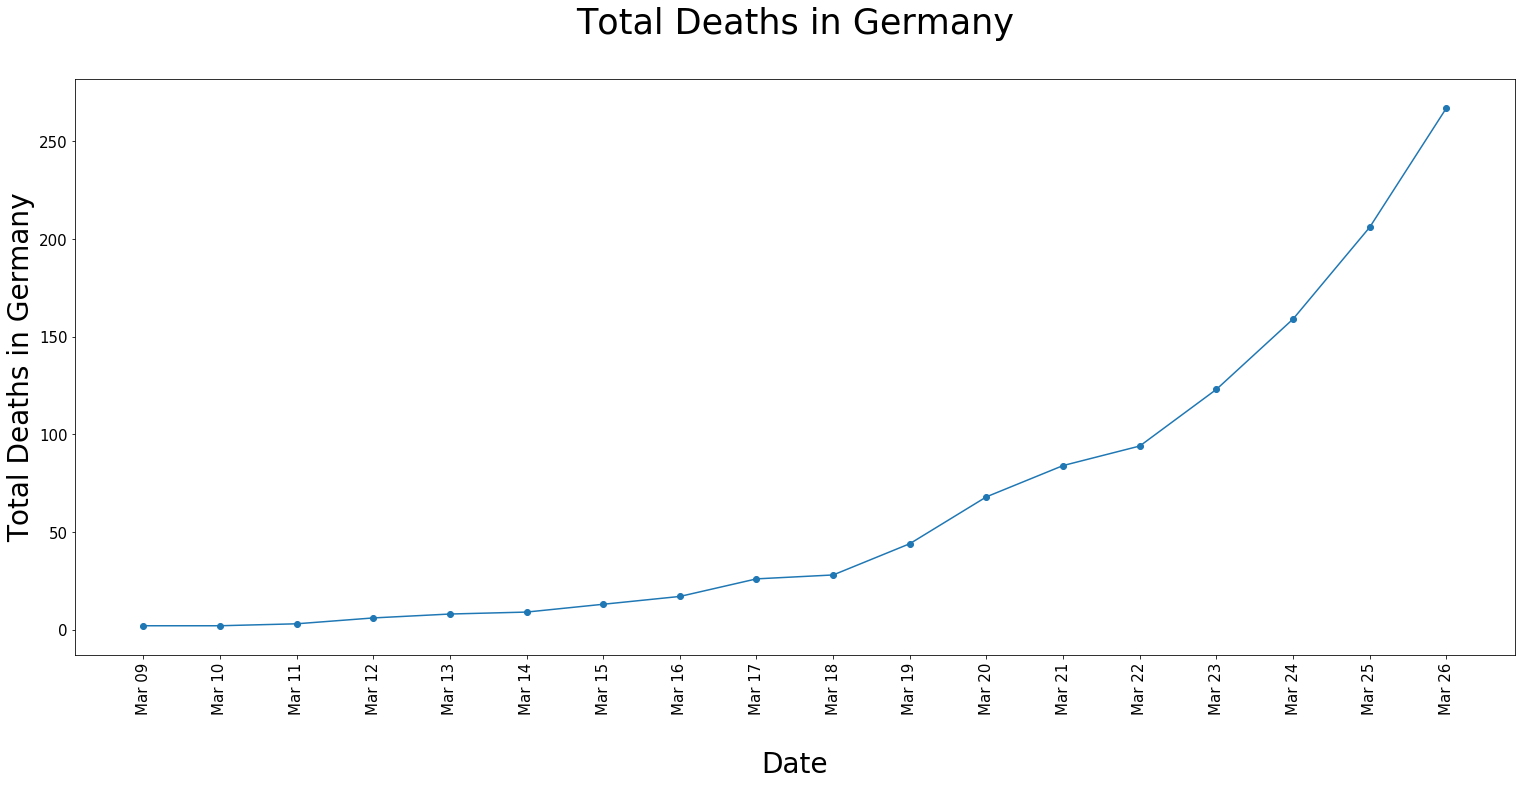

In [ ]:
x=list(df.iloc[23:,0])
y=list(df.iloc[23:,2])
x=np.array(range(1,len(x)+1))
date=tgl[23:]
death(date,y,y,"Germany")

### Linear

Persamaan regresi linearnya adalah : y = 12.9381x + -58.5229
R^2 adalah 0.7792588216721965


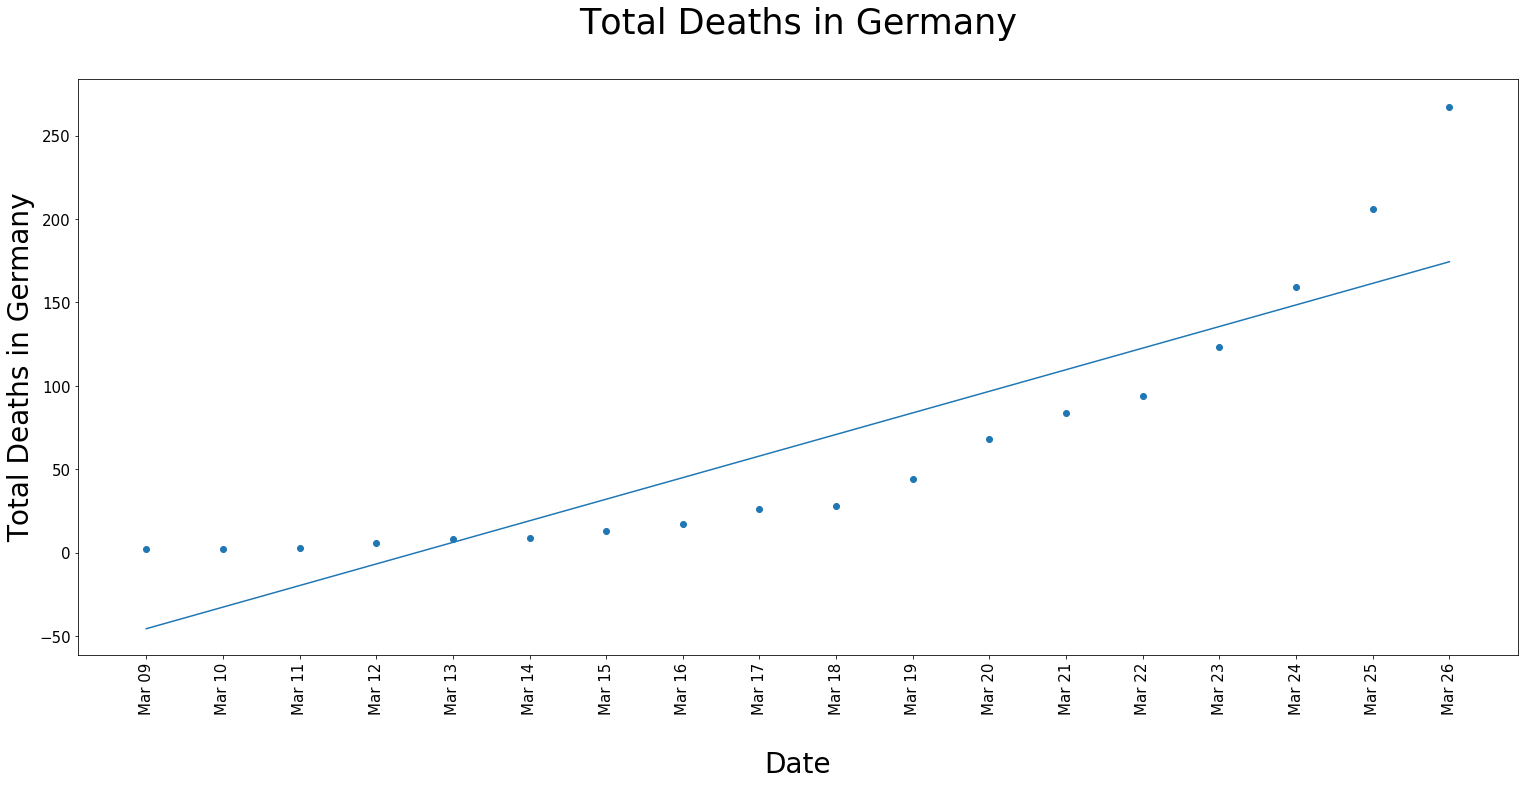

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
death(date,y,ypred,"Germany")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.5754798273380083x^1.8755571685347403
R^2 adalah 0.8988116465769654


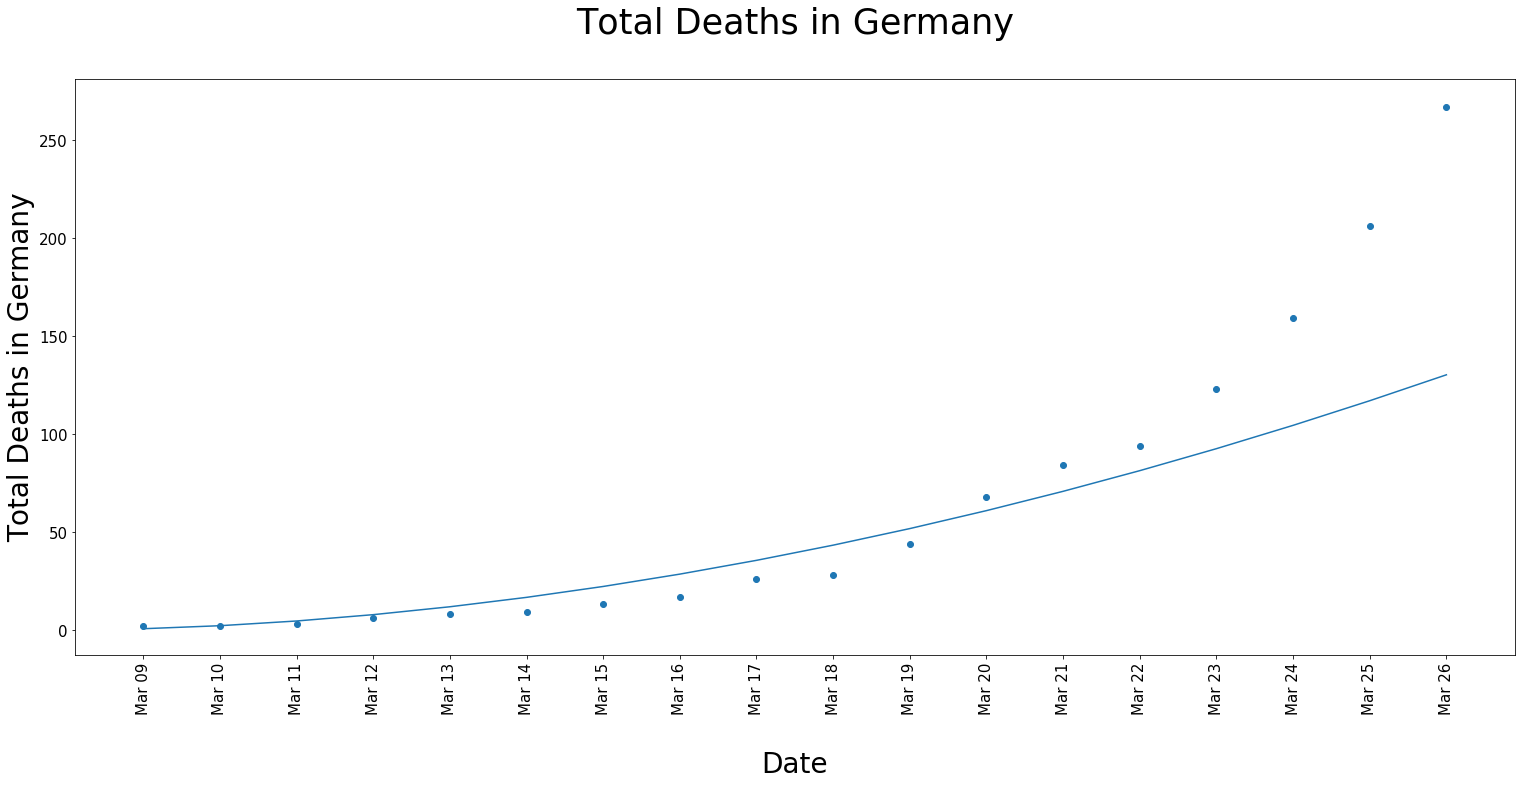

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
death(date,y,ypred,"Germany")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 1.5377e^0.2957x
R^2 adalah 0.9905710424674603


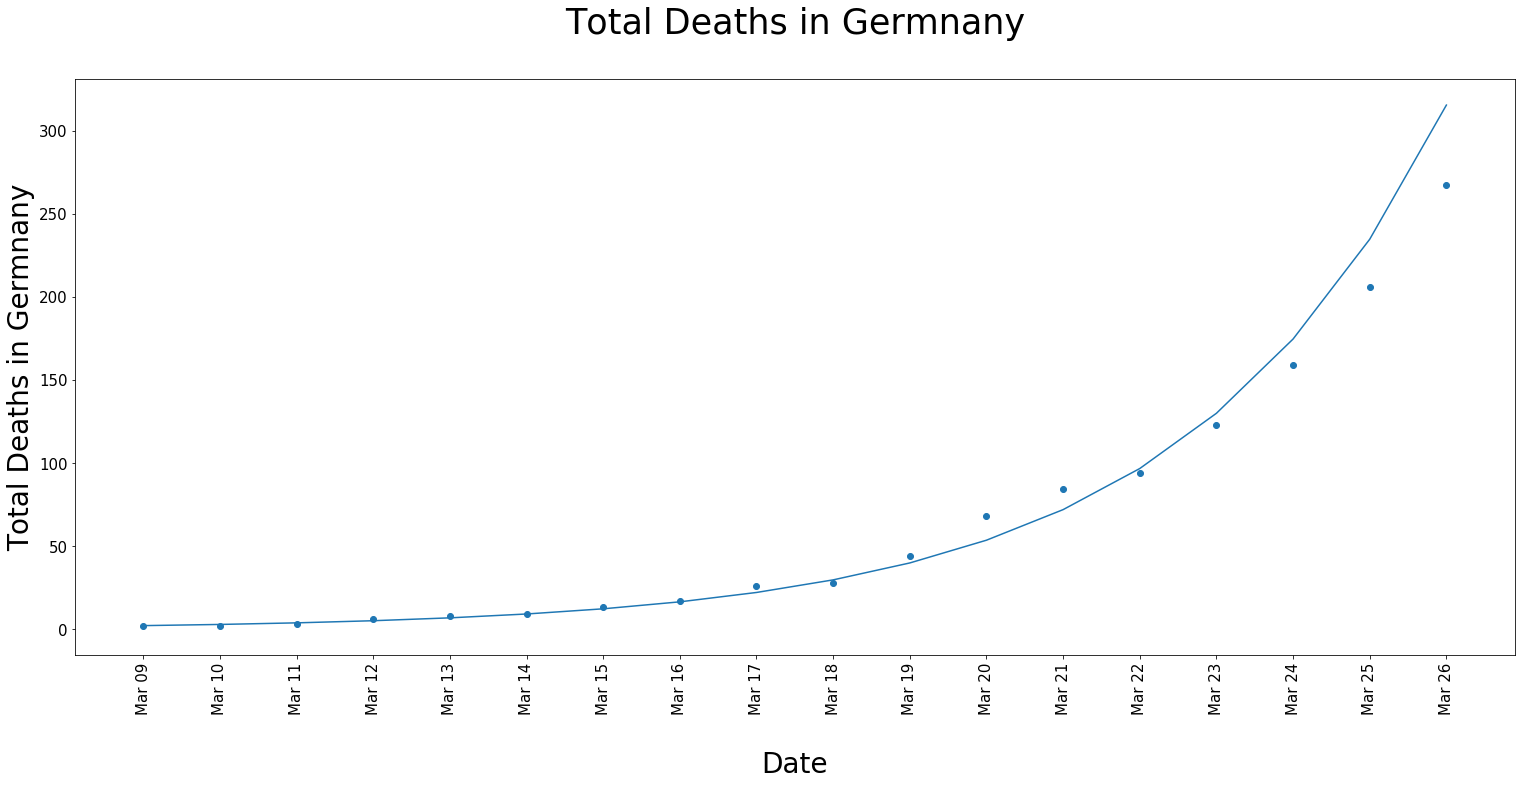

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
death(date,y,ypred,"Germnany")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -8.7712 + 8.1603x + -1.4059x^2 + 0.0987x^3
R^2 adalah 0.9955814381059812


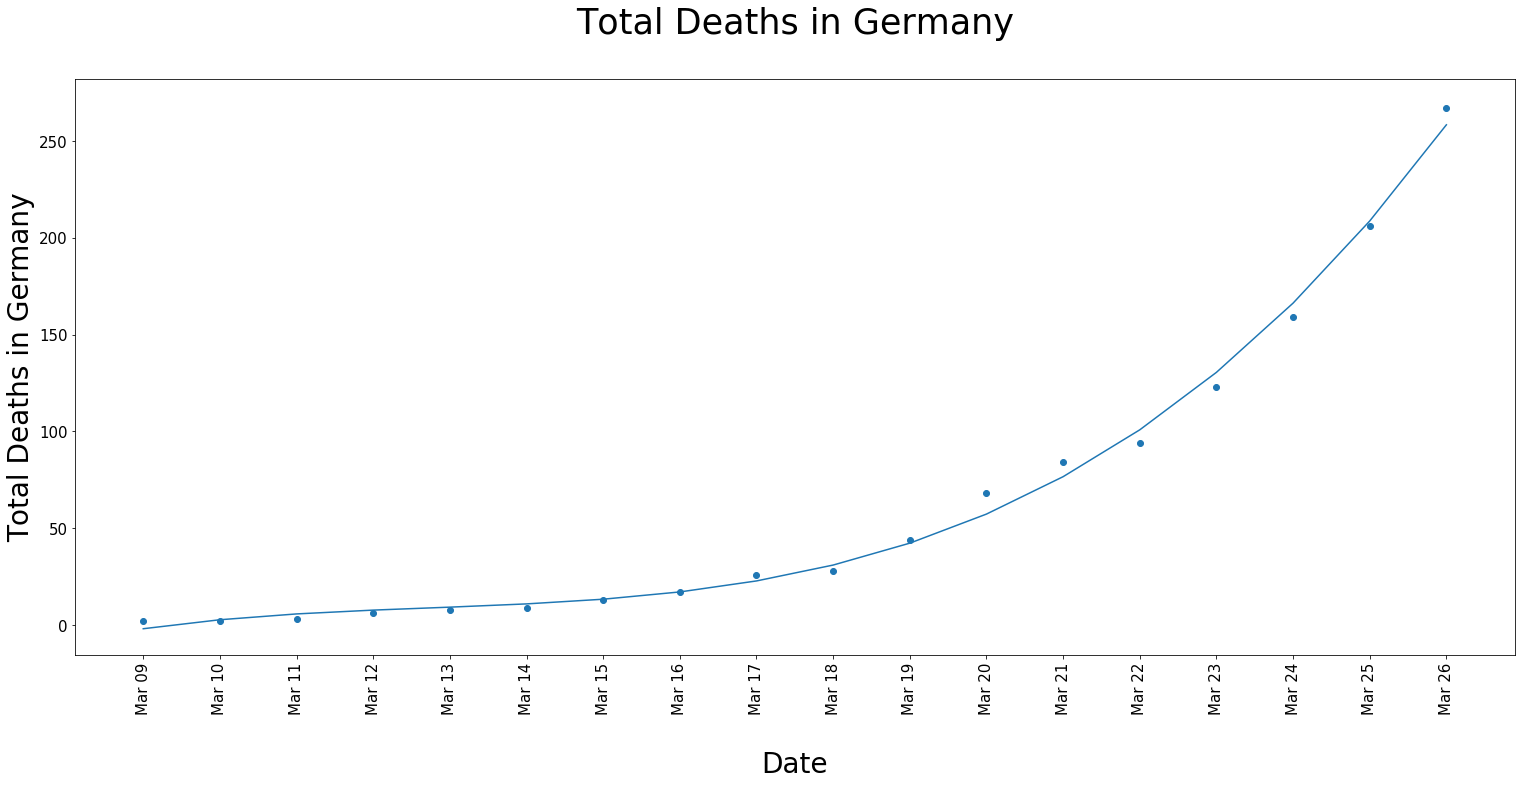

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
death(date,y,ypred,"Germany")

In [ ]:
def germany_death(x) :
    y = -8.7712 + 8.1603*x -1.4059*(x**2) + 0.0987*(x**3)
    return y

Model terbaik untuk kasus kematian di Jerman adalah regresi polinomial orde 3 dengan r^2 score **0.9955814381059814**

## 3.7. Australia

In [ ]:
df=pd.read_csv('../input/australia.csv')

### A. Active Cases

In [ ]:
tgl=list(df.iloc[:,0])
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
date=x
facto('date')
x=list(df.iloc[:,0])

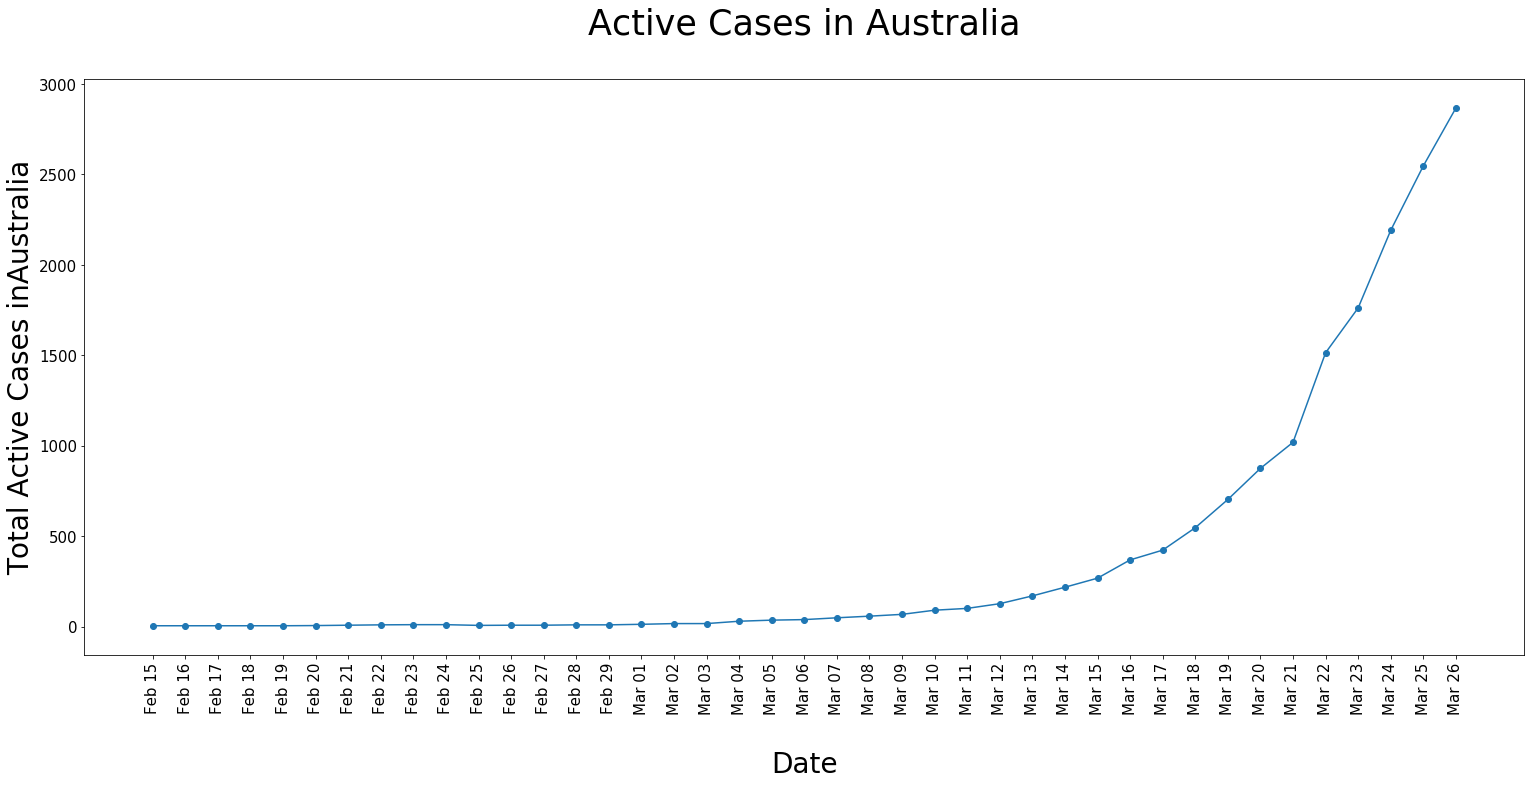

In [ ]:
active(date,y,y,"Australia")

### Linear

Persamaan regresi linearnya adalah : y = 44.7082x + -542.9451
R^2 adalah 0.5314566106422057


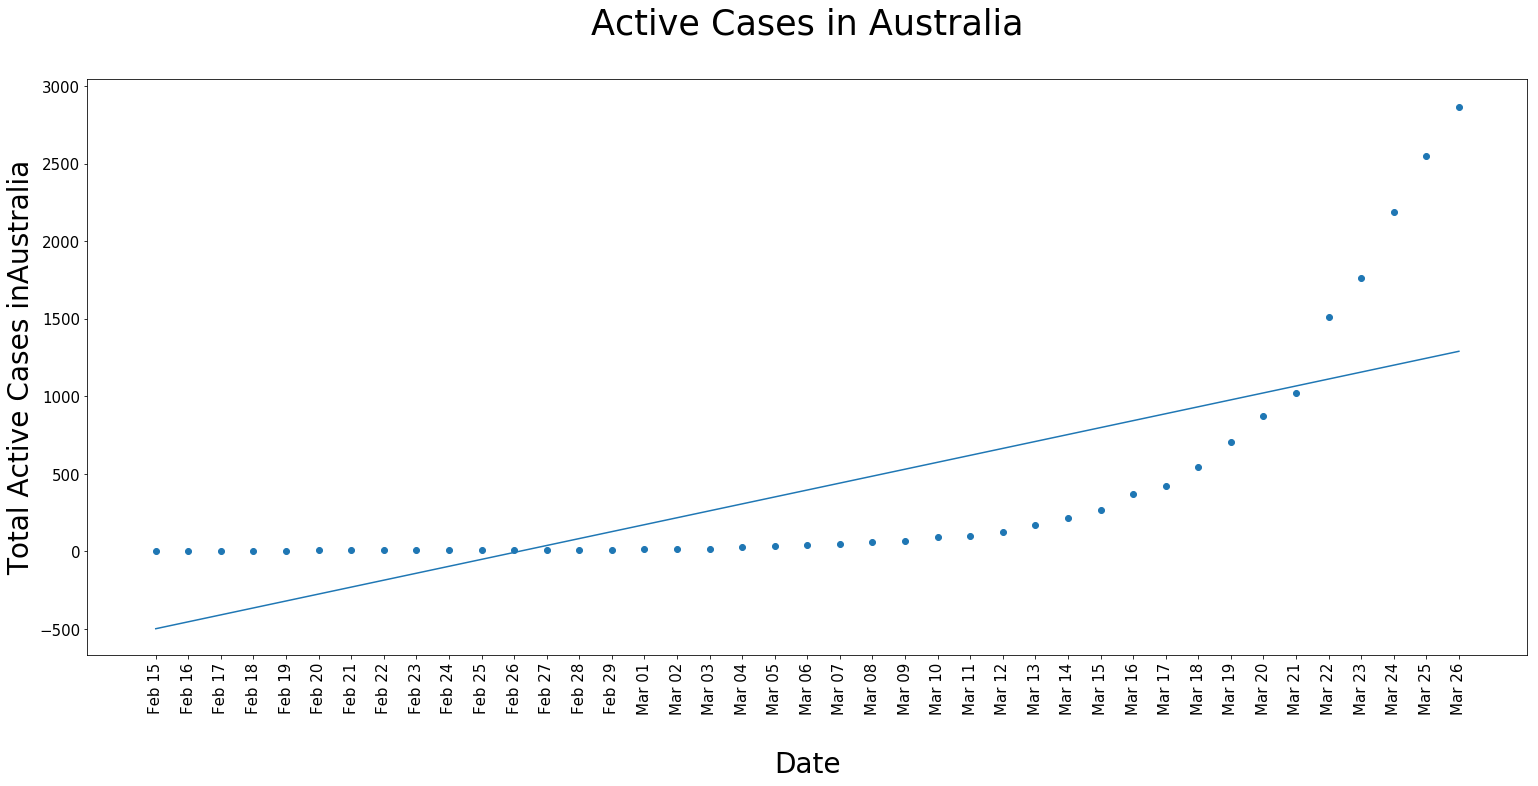

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
active(date,y,ypred,"Australia")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.24640276137735273x^1.9739970763819124
R^2 adalah 0.6711195330598594


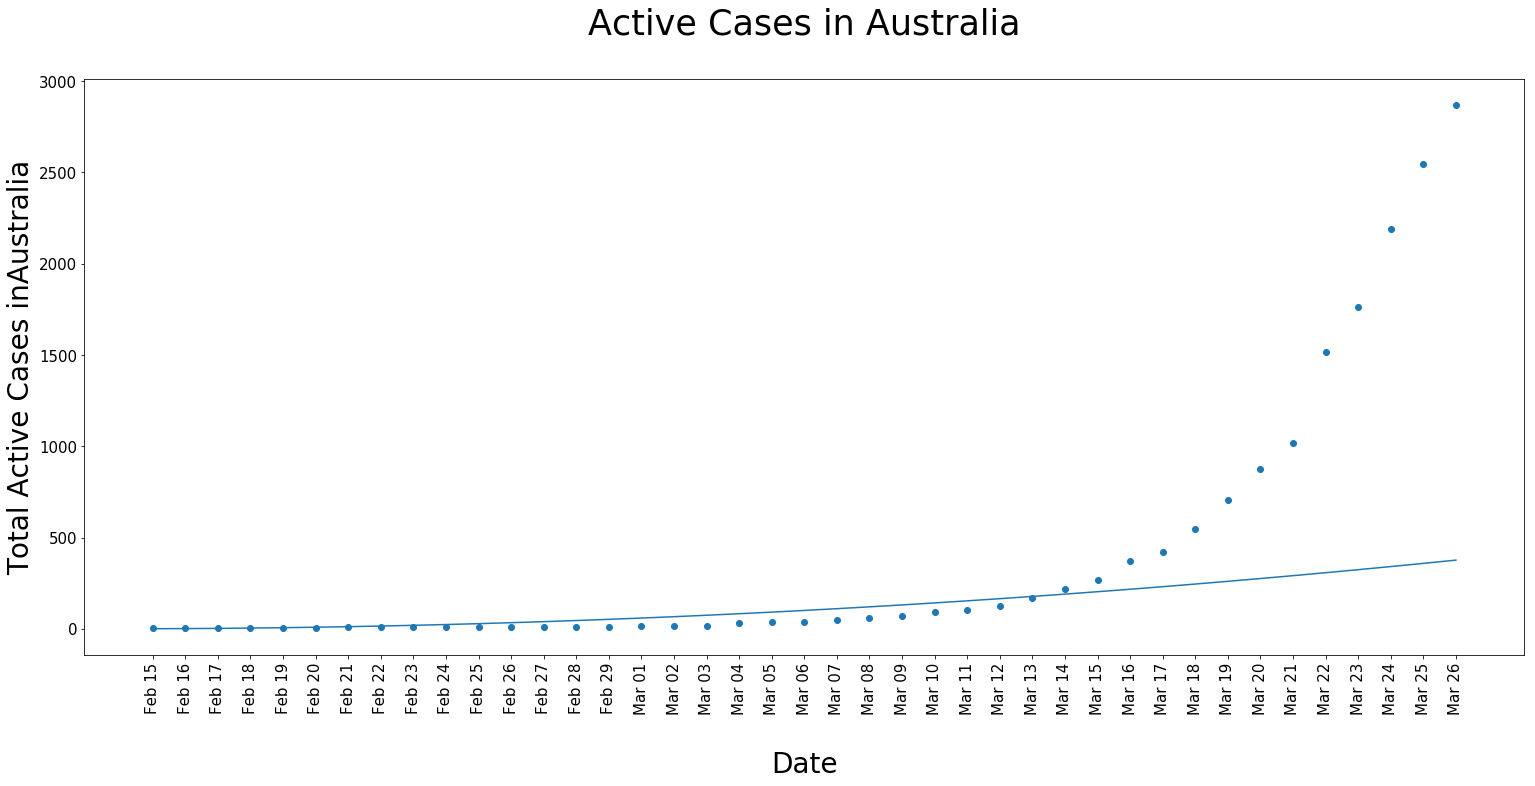

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
active(date,y,ypred,"Australia")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 1.6159e^0.1719x
R^2 adalah 0.9532732480000465


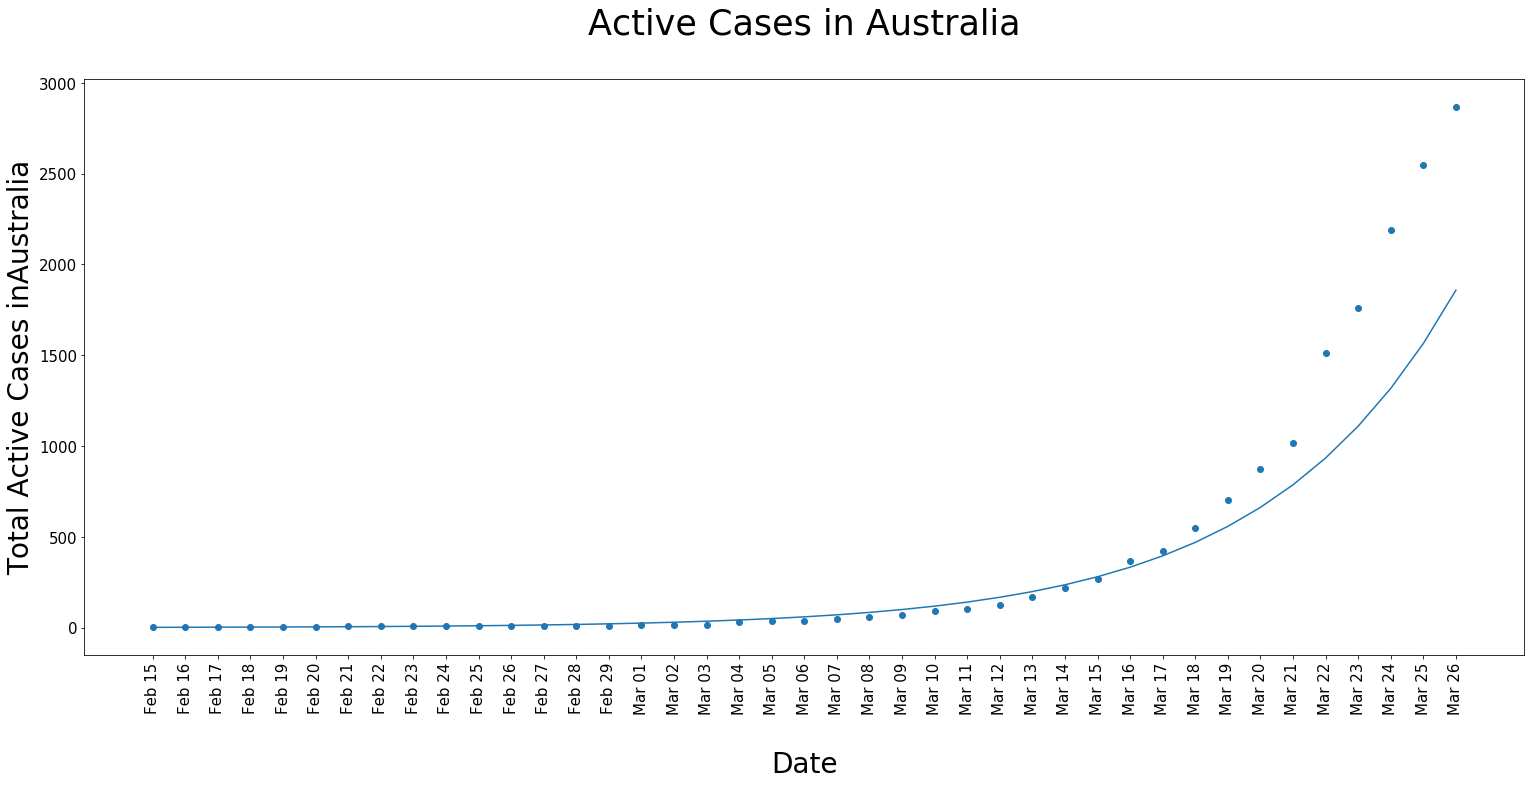

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
active(date,y,ypred,"Australia")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -268.8942 + 102.5710x + -8.3502x^2 + 0.1860x^3
R^2 adalah 0.9785563915651723


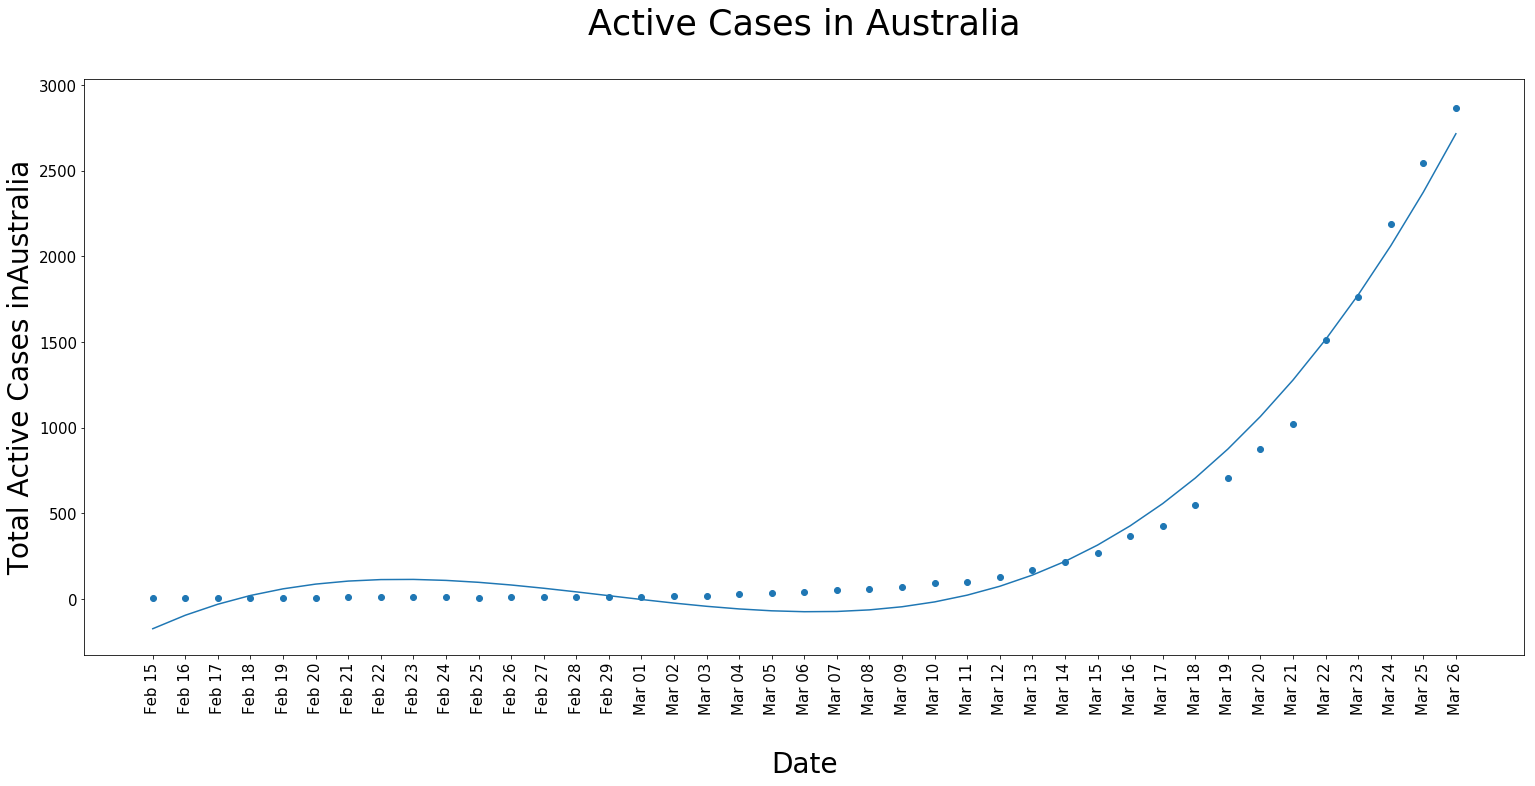

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
active(date,y,ypred,"Australia")

In [ ]:
def aus_active(x) :
    y = -268.8942 + 102.5710*x  -8.3502*(x**2) + 0.1860*(x**3)
    return y

Model terbaik untuk kasus aktif di Australia adalah regresi polinomial orde 3 dengan r^2 score **0.9785563915651723**

### B. Total Deaths

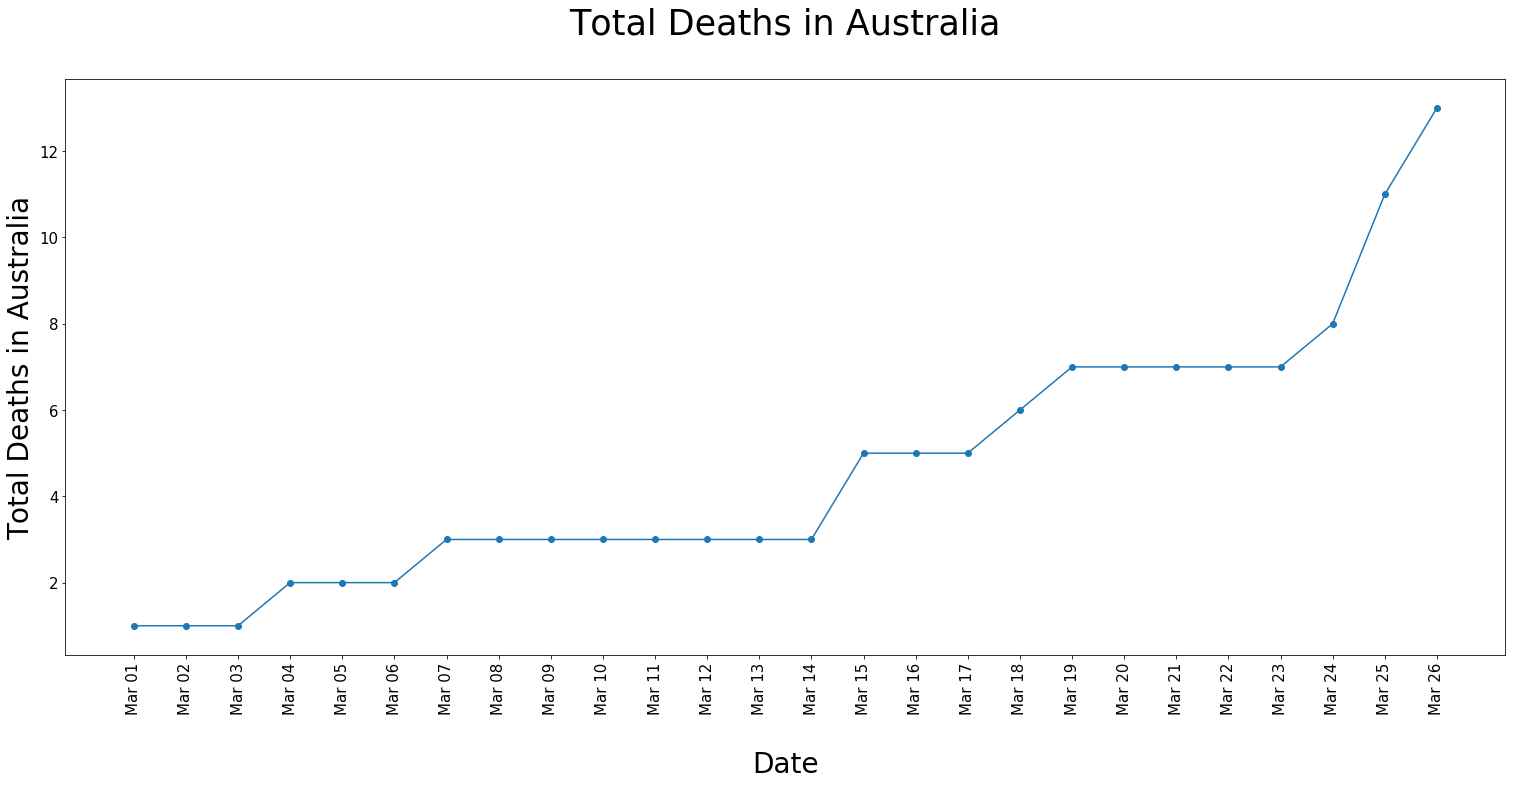

In [ ]:
x=list(df.iloc[15:,0])
x=np.array(range(1,len(x)+1))
y=list(df.iloc[15:,2])
date=tgl[15:]
death(date,y,y,"Australia")

### Linear

Persamaan regresi linearnya adalah : y = 0.3709x + -0.3538
R^2 adalah 0.8604030769792981


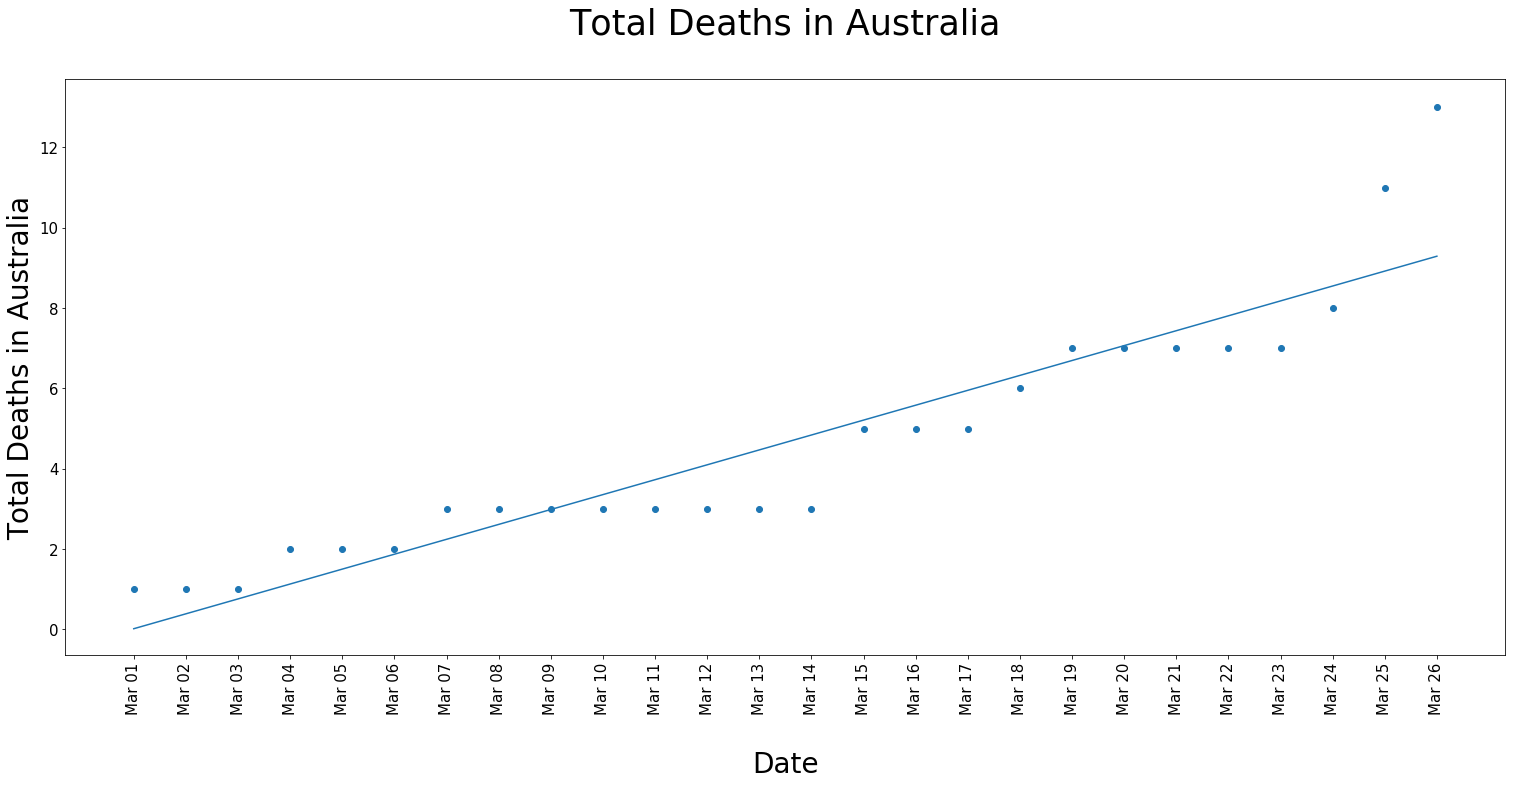

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
death(date,y,ypred,"Australia")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.5790604026029028x^0.7911192340452929
R^2 adalah 0.8773791798939773


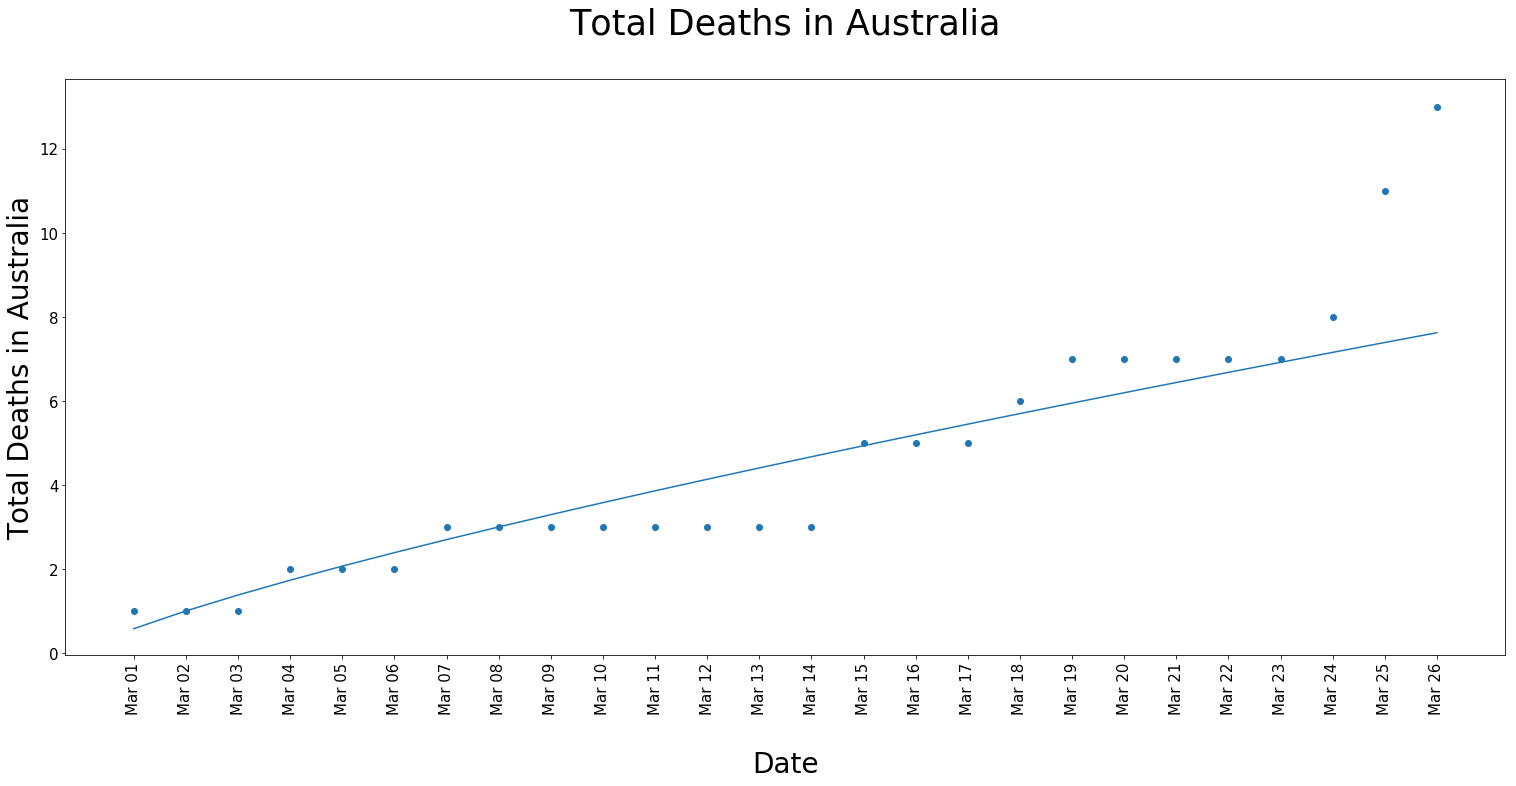

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
death(date,y,ypred,"Australia")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 1.1194e^0.0893x
R^2 adalah 0.9306419724464406


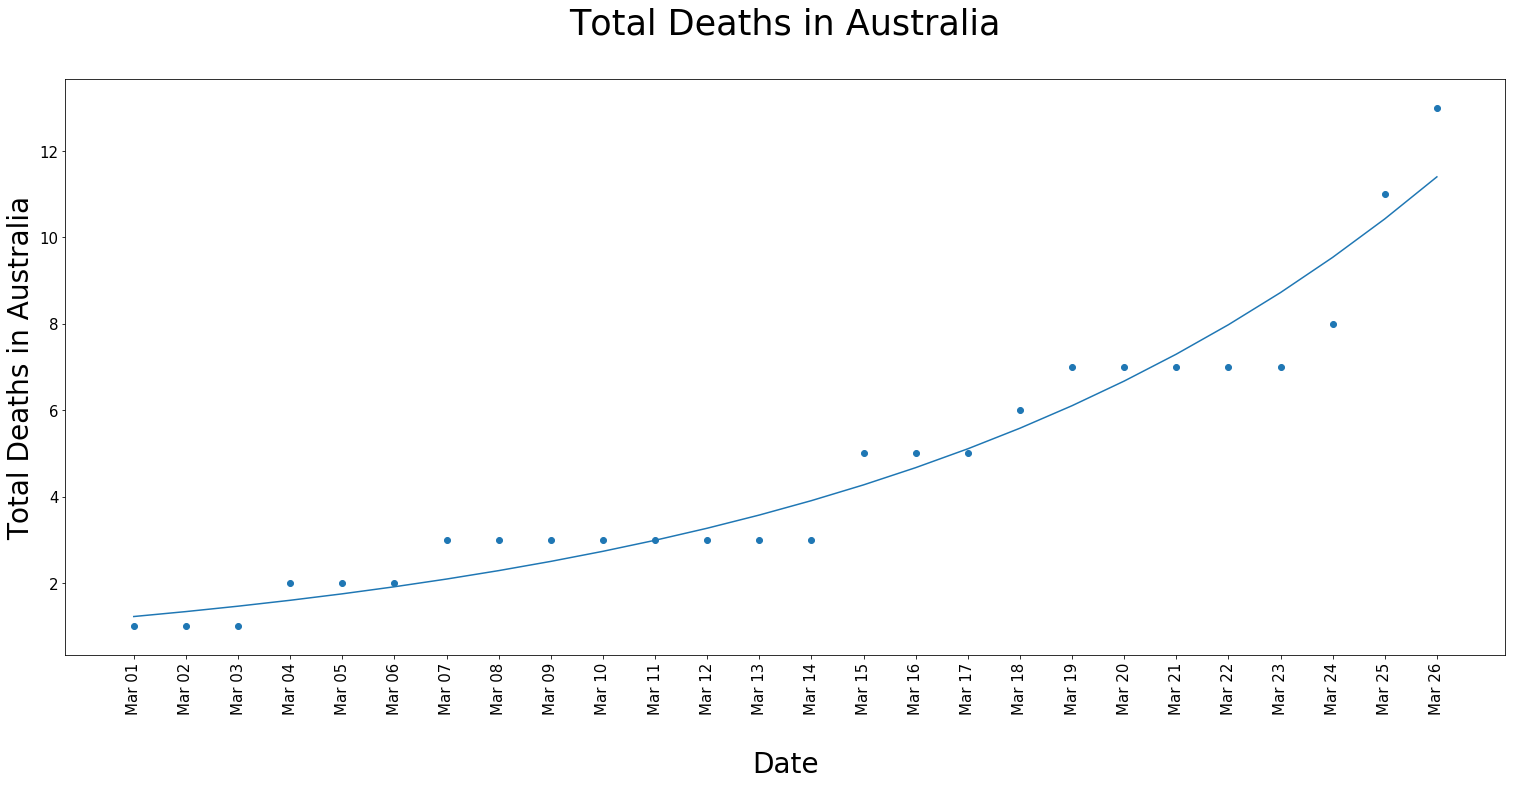

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
death(date,y,ypred,"Australia")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = 0.1886 + 0.5217x + -0.0360x^2 + 0.0013x^3
R^2 adalah 0.9454489746379815


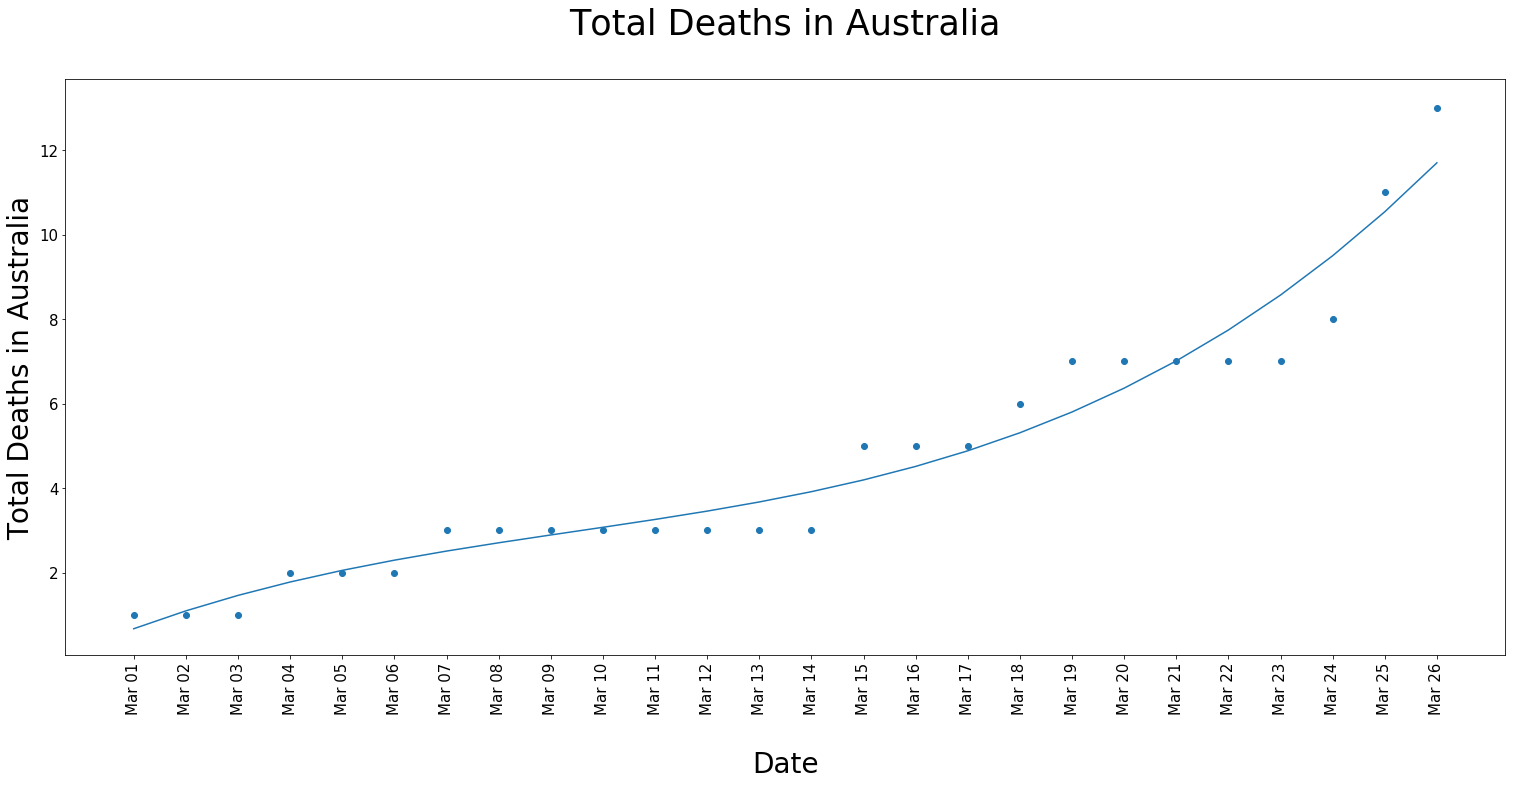

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
death(date,y,ypred,"Australia")

In [ ]:
def aus_death(x) :
    y = 0.1886 + 0.5217*x + -0.0360*(x**2) + 0.0013*(x**3)
    return y

Model terbaik untuk kematian total di Australia adalah polinomial orde 3 dengan r^2 score **0.9454489746379808**

## 3.8. Amerika Serikat

In [ ]:
df=pd.read_csv('../input/usa.csv')

### A. Active Cases

In [ ]:
tgl=list(df.iloc[:,0])
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
date=x
facto('date')
x=list(df.iloc[:,0])

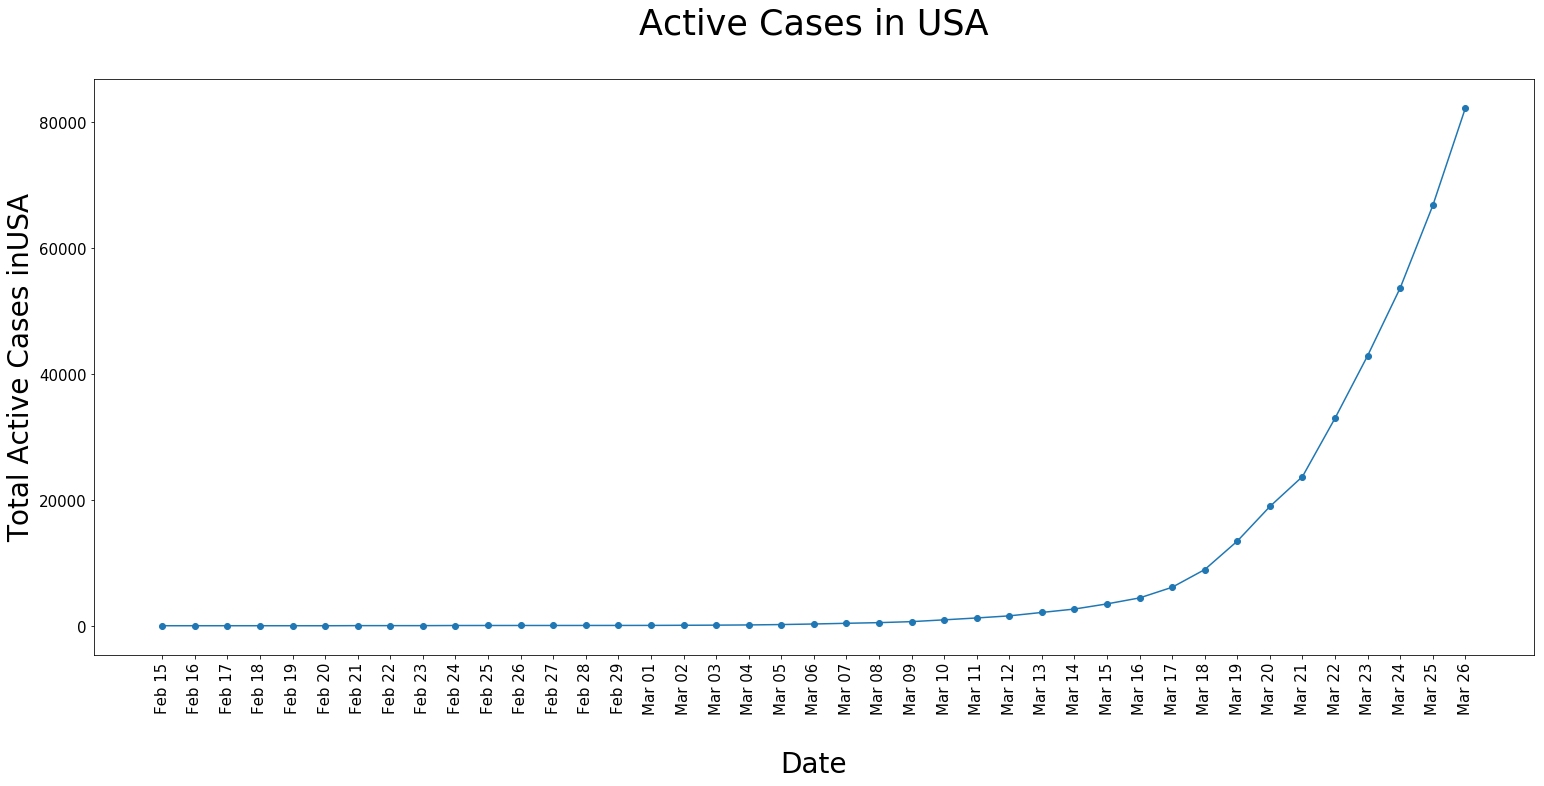

In [ ]:
active(date,y,y,"USA")

### Linear

Persamaan regresi linearnya adalah : y = 1086.7791x + -13814.5073
R^2 adalah 0.45230687190739427


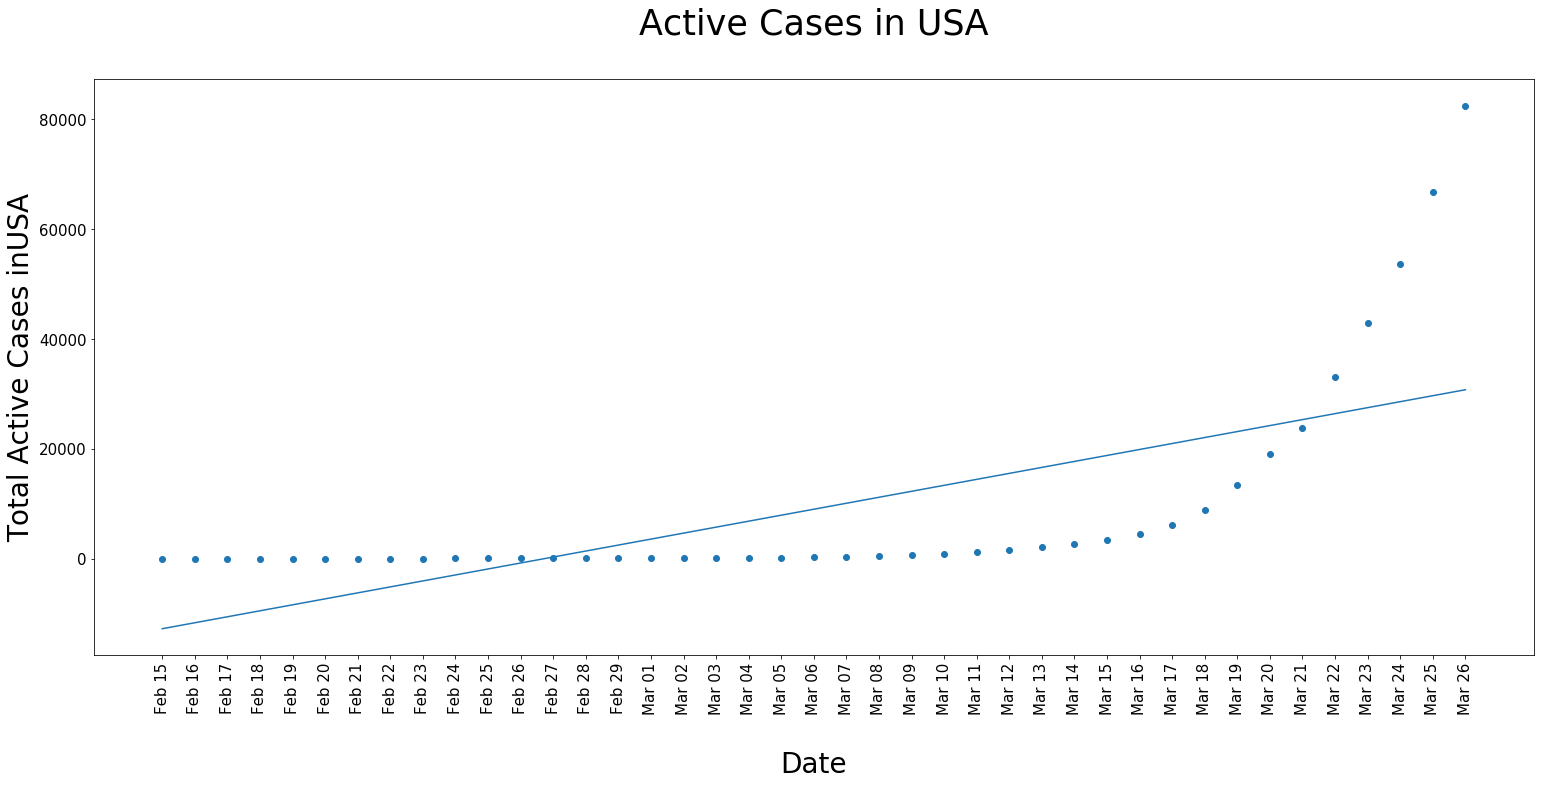

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
active(date,y,ypred,"USA")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.20166218583220522x^2.782845110701927
R^2 adalah 0.7181791186354892


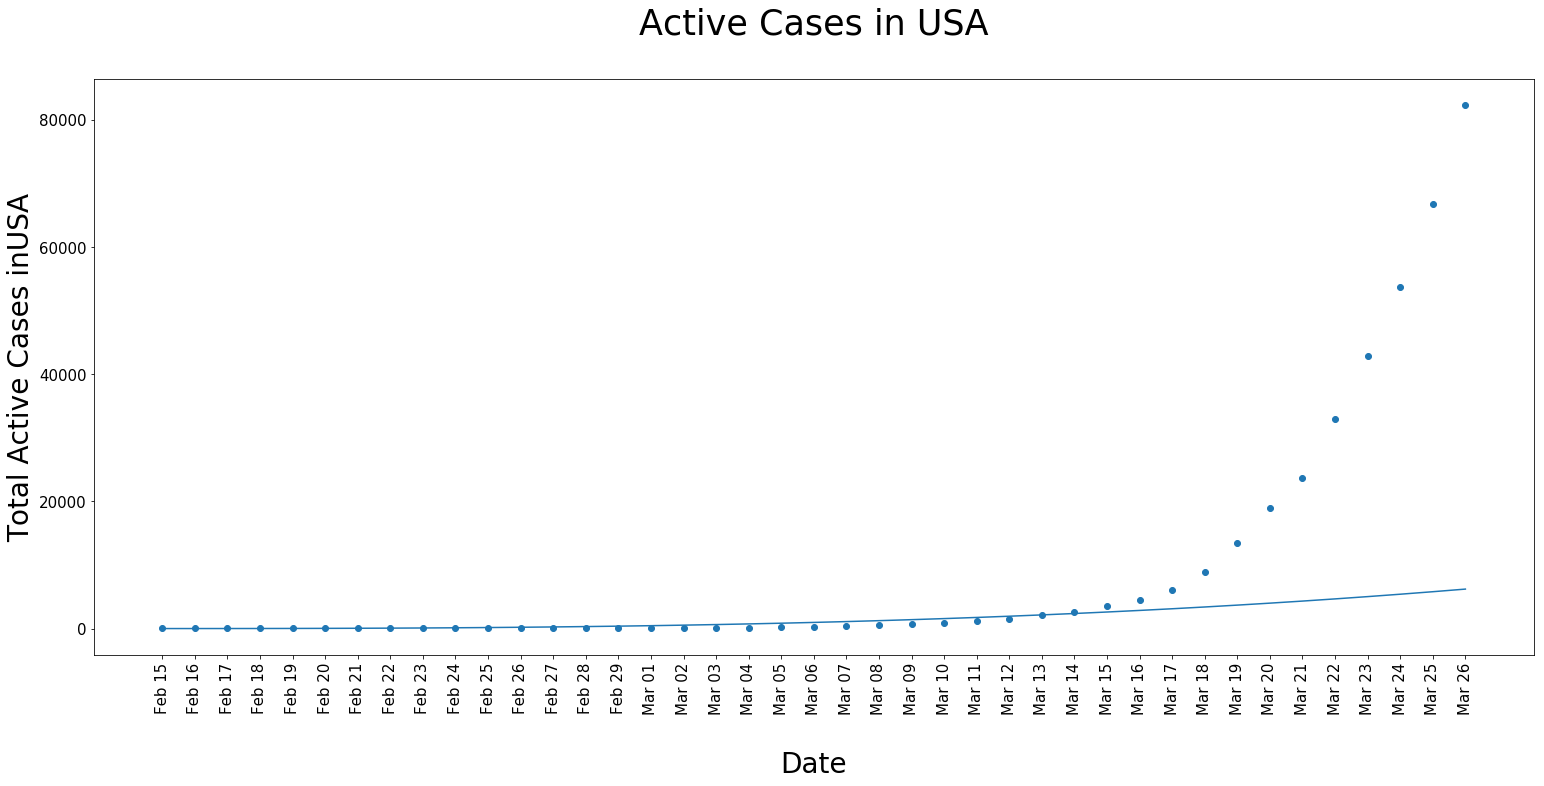

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
active(date,y,ypred,"USA")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 3.2136e^0.2367x
R^2 adalah 0.9736290335510998


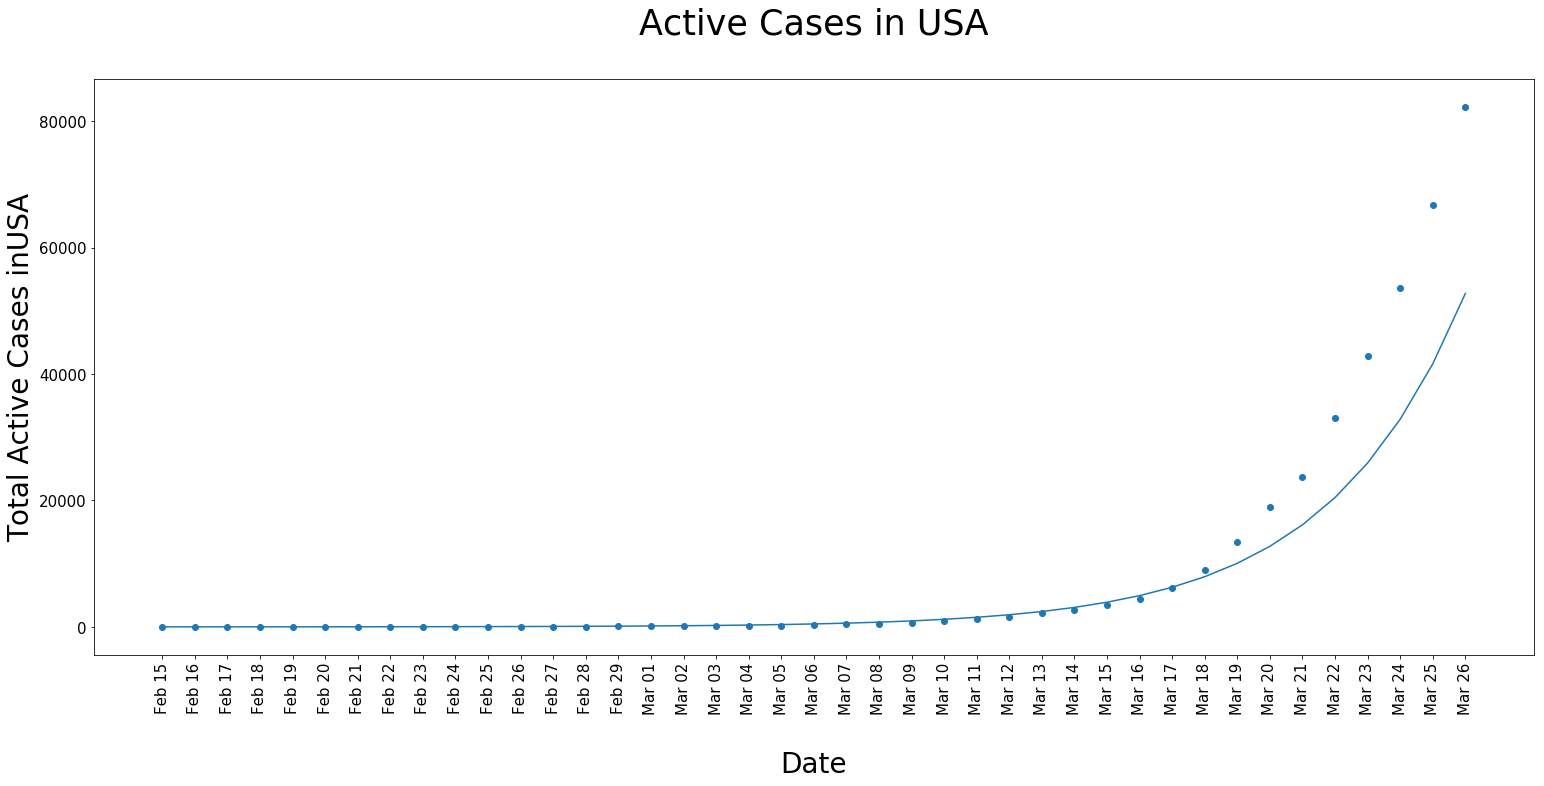

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
active(date,y,ypred,"USA")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -9538.5835 + 3478.7497x + -273.7835x^2 + 5.7829x^3
R^2 adalah 0.9571807890250261


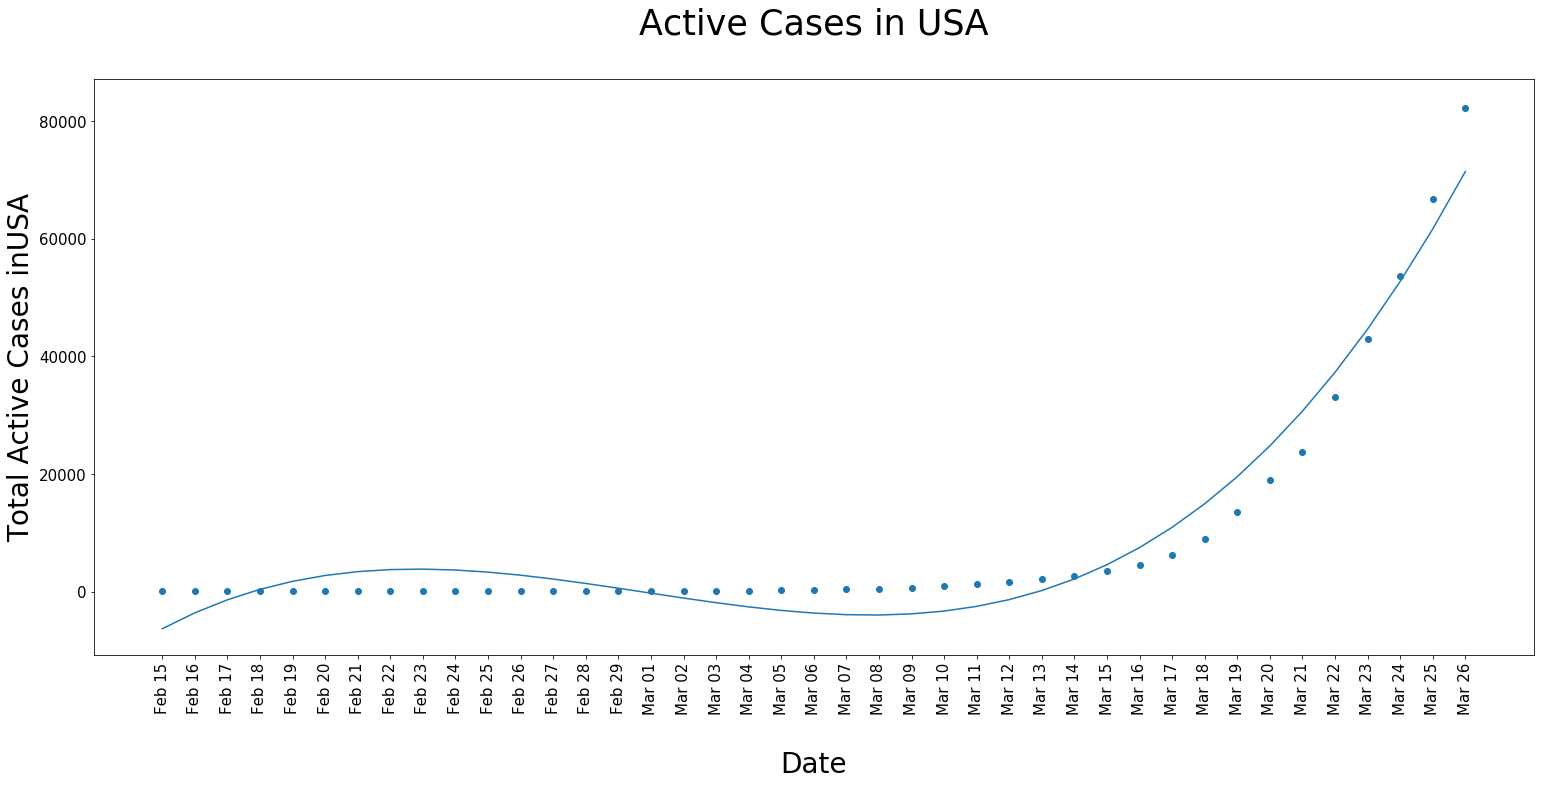

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
active(date,y,ypred,"USA")

In [ ]:
def usa_active(x) :
    y=3.2136*np.exp(0.2367*x)
    return y

Model terbaik untuk kasus aktif di USA adalah regresi eksponensial dengan r^2 score **0.9736290335510998**

### B. Total Deaths

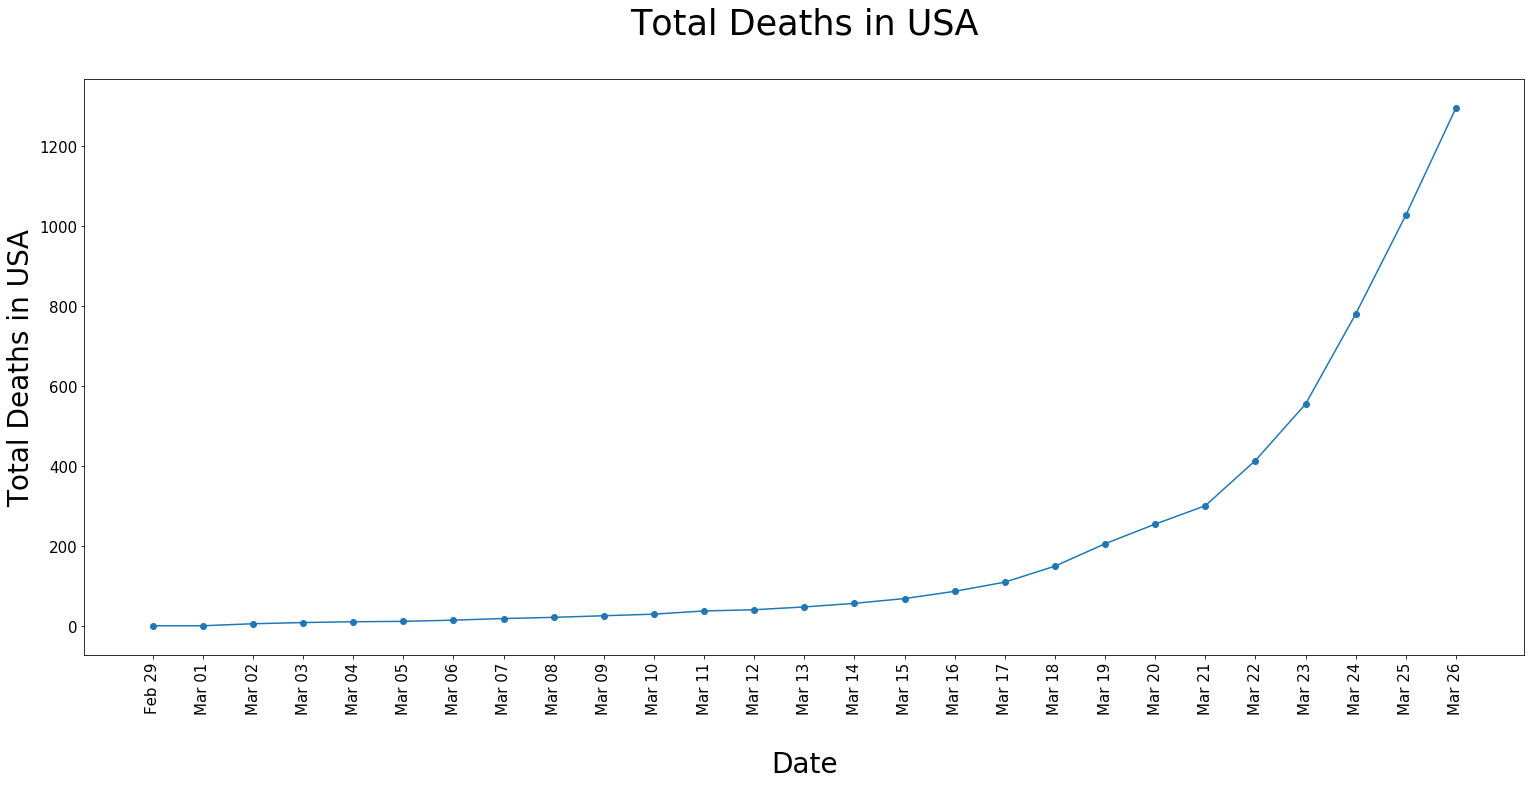

In [ ]:
x=list(df.iloc[14:,0])
x=np.array(range(1,len(x)+1))
y=list(df.iloc[14:,2])
date=tgl[14:]
death(date,y,y,"USA")

### Linear

Persamaan regresi linearnya adalah : y = 32.4017x + -246.7721
R^2 adalah 0.5887312440308616


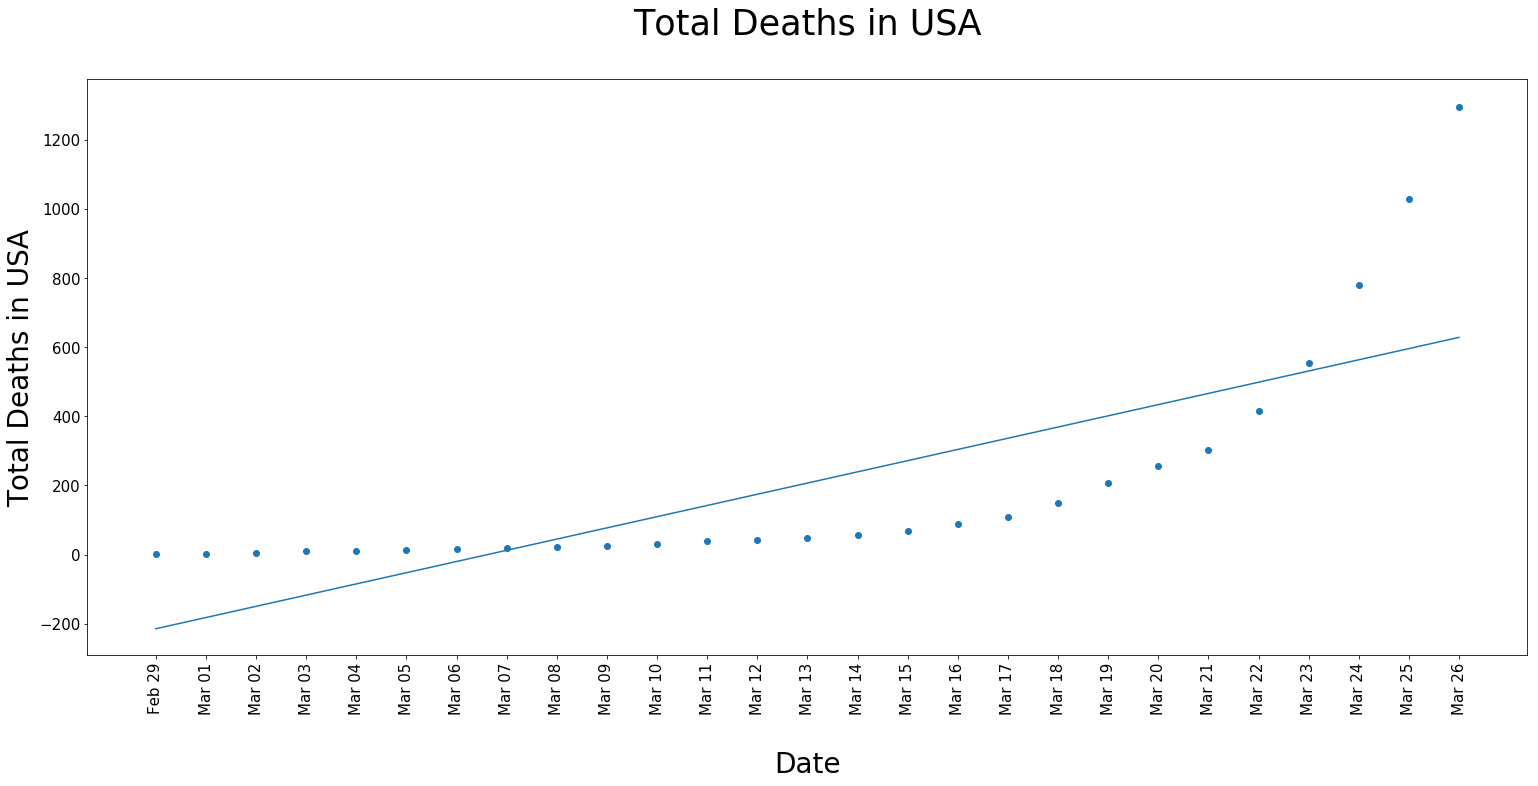

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
death(date,y,ypred,"USA")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.3230094121961113x^2.1398614237434
R^2 adalah 0.8986220028825246


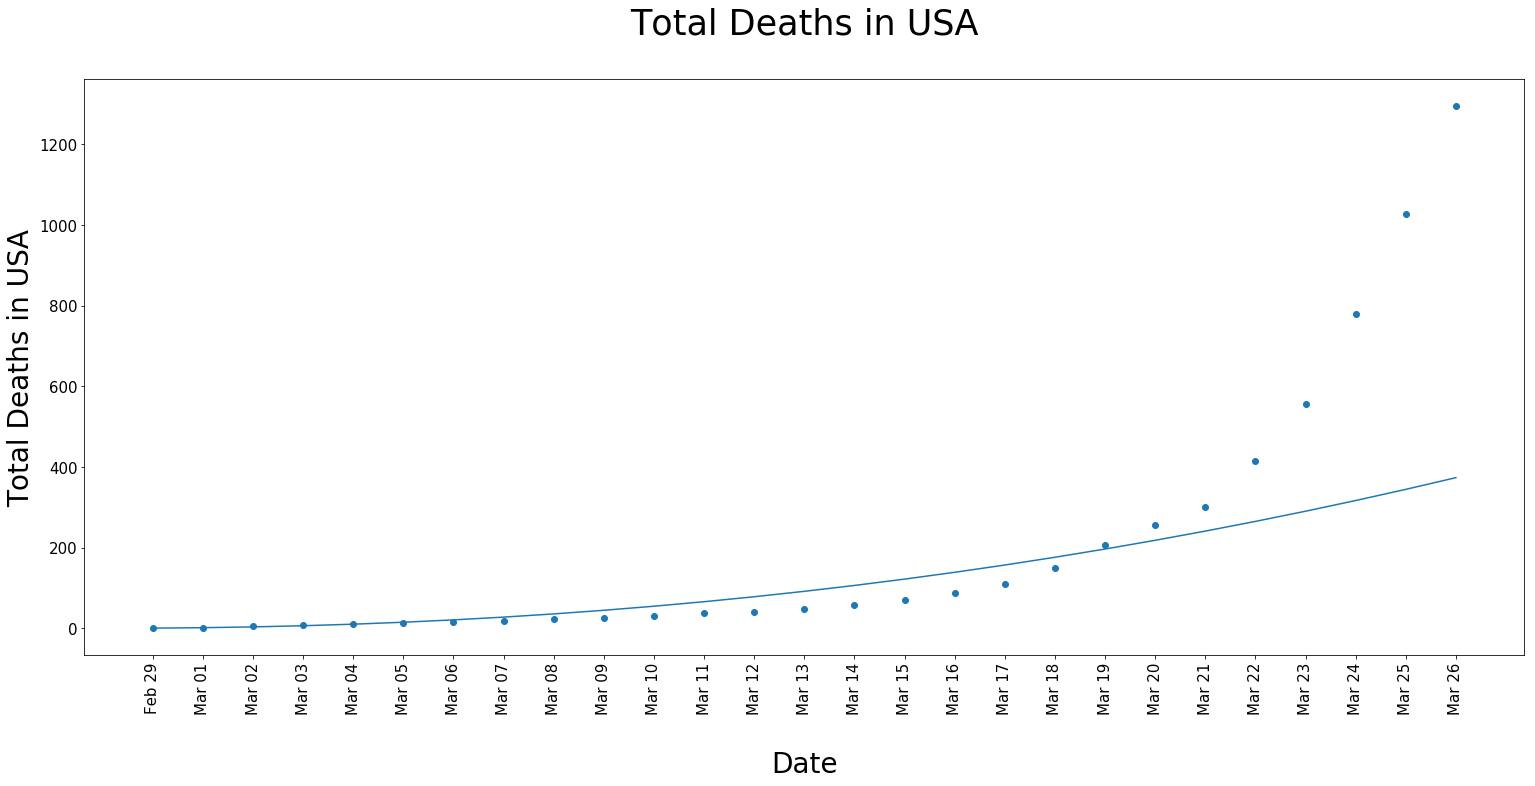

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
death(date,y,ypred,"USA")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 2.0263e^0.2343x
R^2 adalah 0.9590344971302505


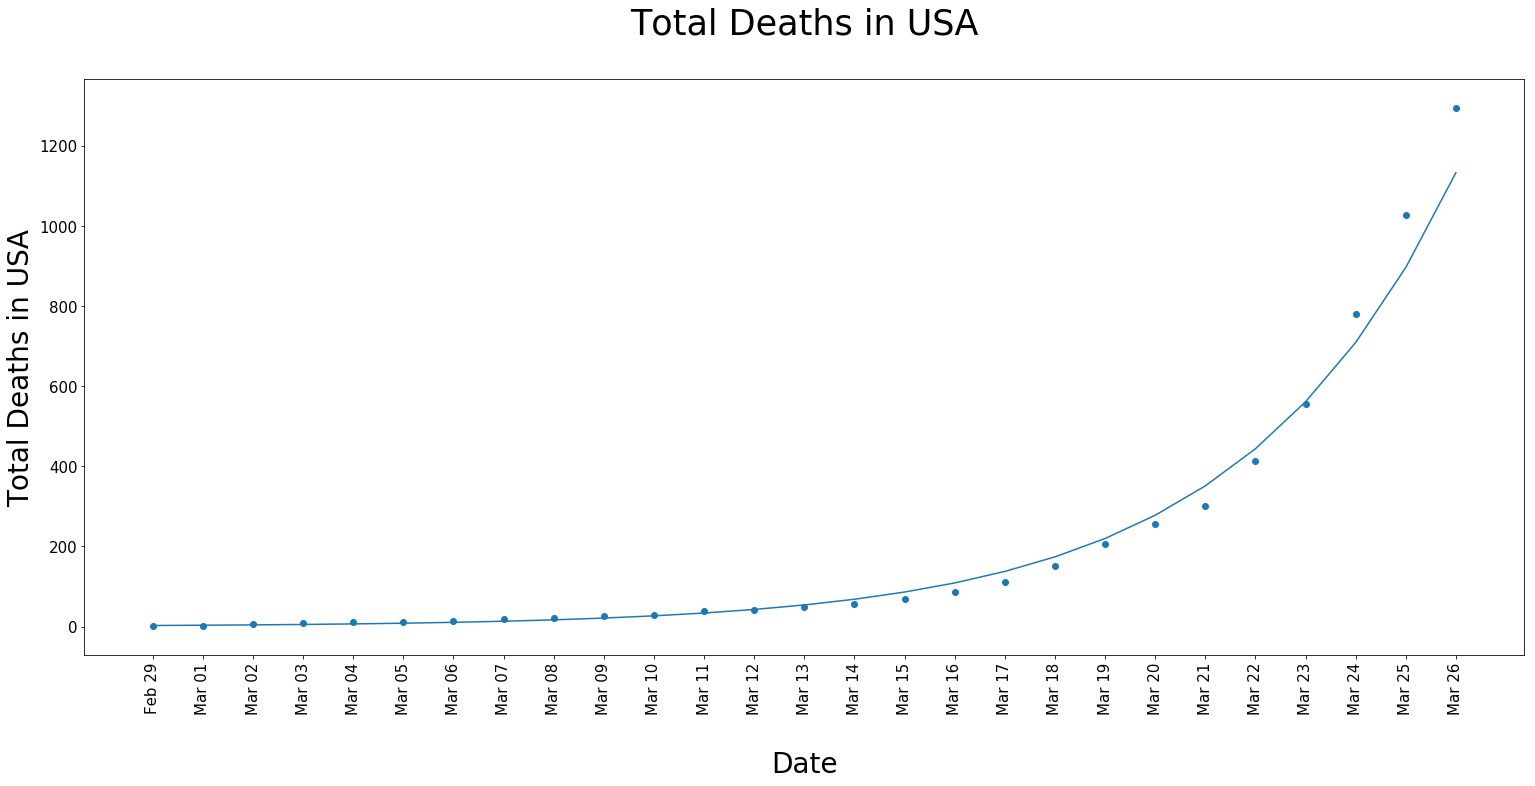

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
death(date,y,ypred,"USA")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = -126.8023 + 69.1938x + -8.0705x^2 + 0.2714x^3
R^2 adalah 0.9815764063608295


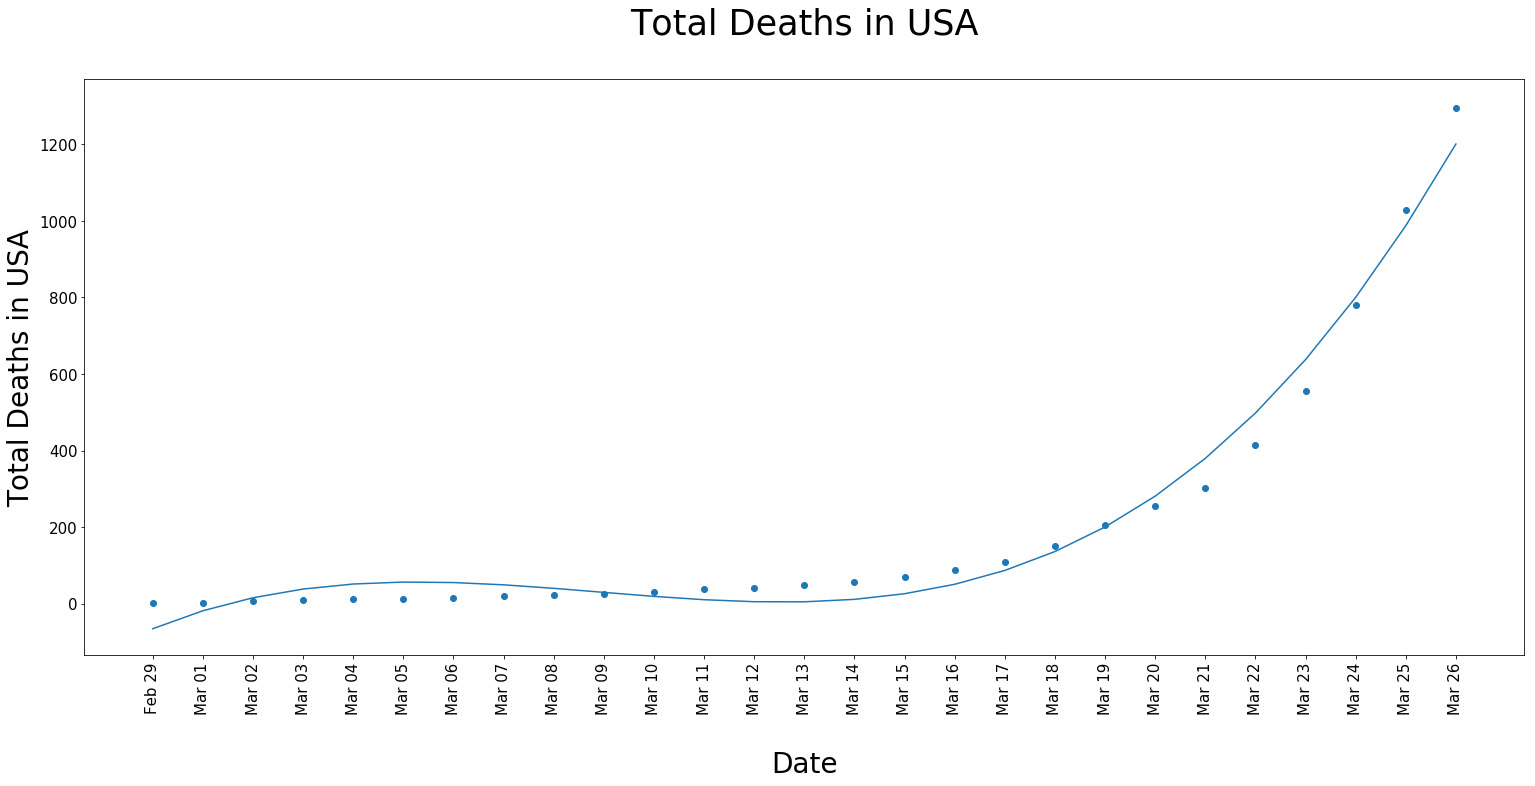

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
death(date,y,ypred,"USA")

In [ ]:
def usa_death(x) :
    y = -126.8023 + 69.1938*x -8.0705*(x**2) + 0.2714*(x**3)
    return y

Model terbaik untuk kematian total di USA adalah polinomial orde 3 dengan r^2 score **0.98157640636083**

## 3.9. Indonesia

In [ ]:
df=pd.read_csv('../input/indonesia.csv')

### A. Active Cases

In [ ]:
tgl=list(df.iloc[1:,0])
x=list(df.iloc[1:,0])
y=list(df.iloc[1:,1])
date=x
facto('date')
x=list(df.iloc[1:,0])
x=np.array(range(1,len(x)+1))

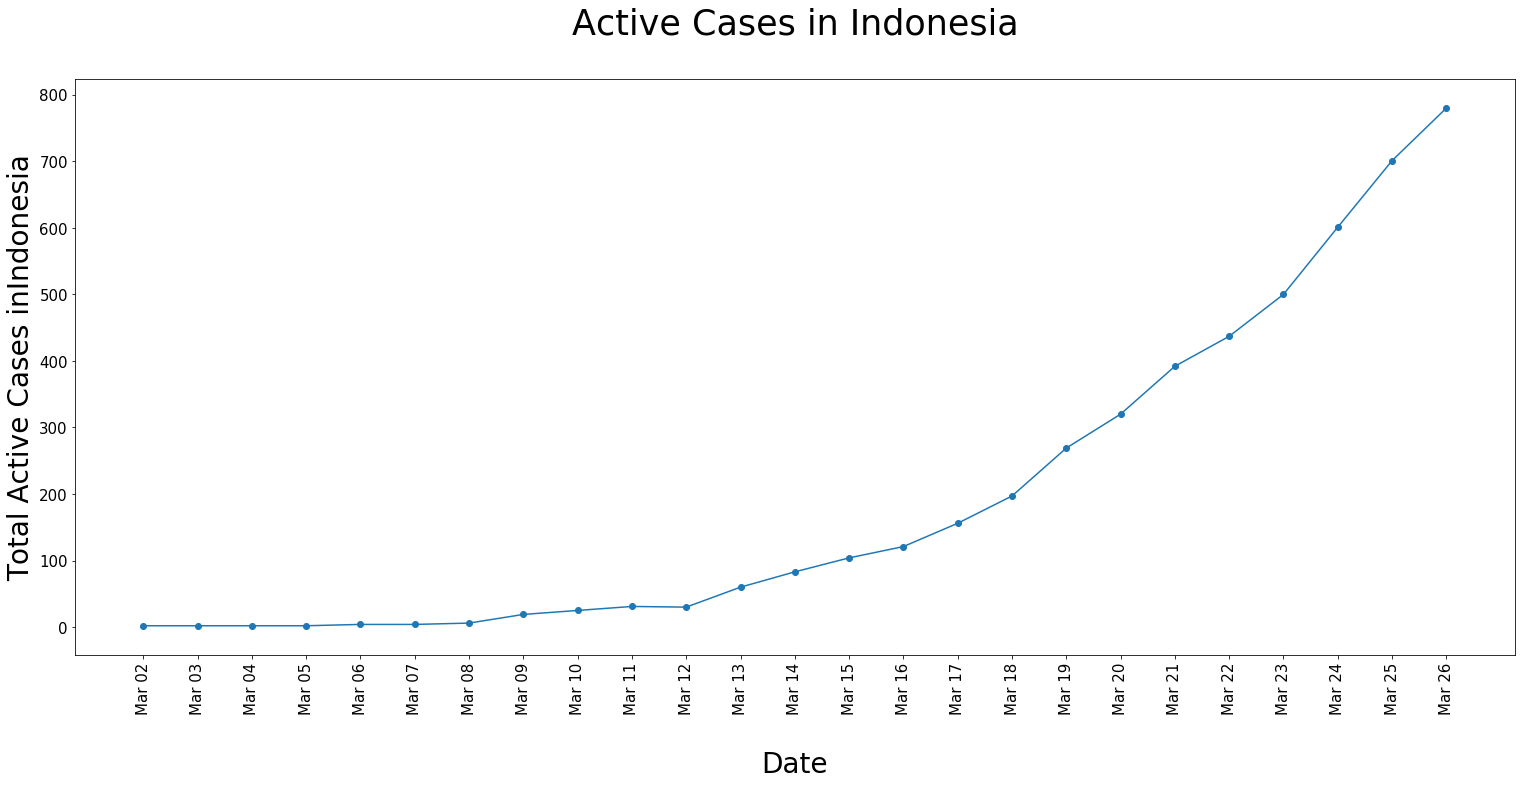

In [ ]:
active(date,y,y,"Indonesia")

### Linear

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)

Persamaan regresi linearnya adalah : y = 29.3077x + -187.0800
R^2 adalah 0.8020024543978999


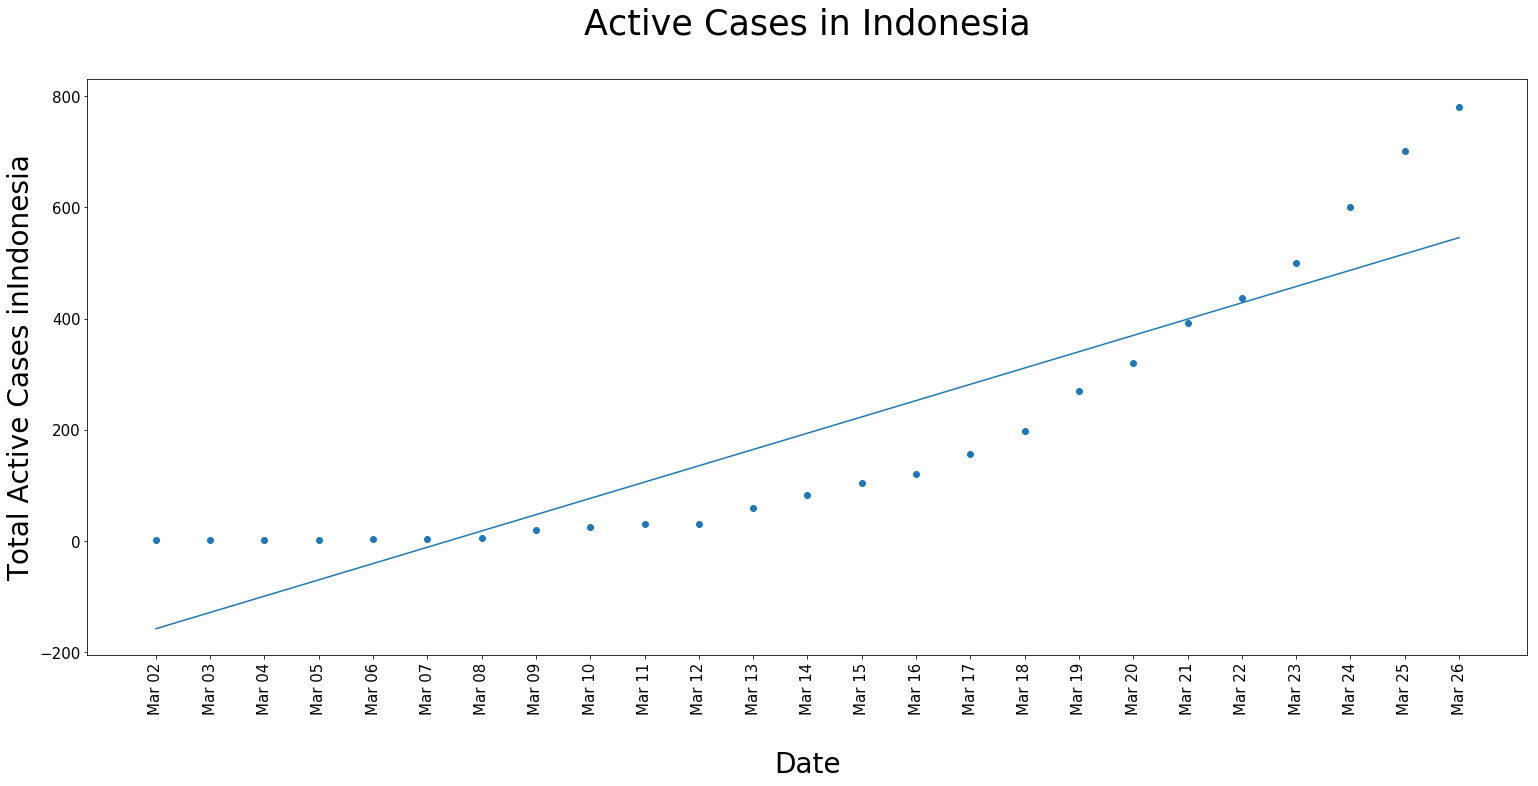

In [ ]:
active(date,y,ypred,"Indonesia")

### Pangkat

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)

Persamaan regresi pangkatnya adalah : y = 0.20999810193412907x^2.3598104643023485
R^2 adalah 0.87253948955766


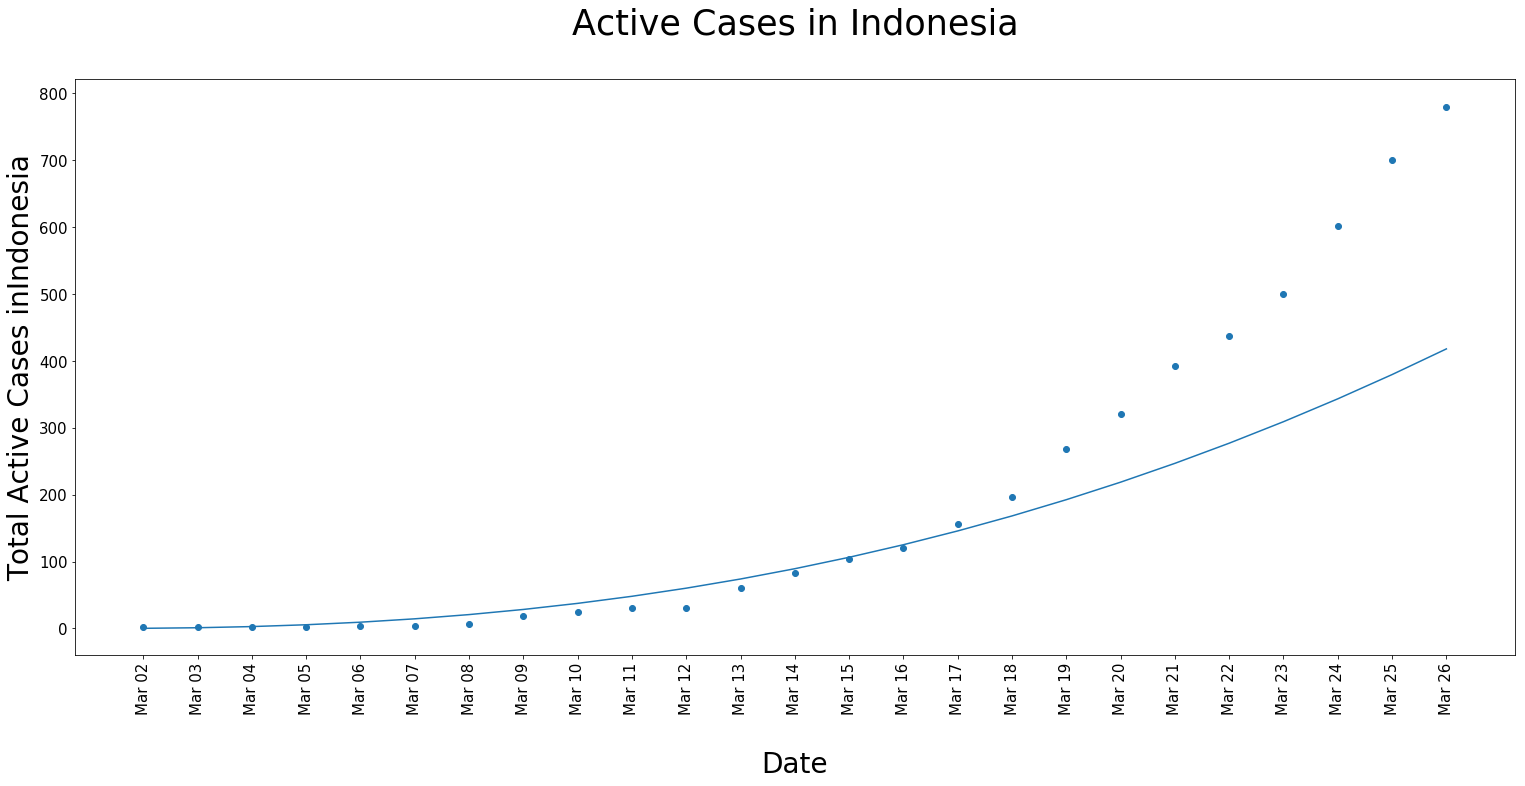

In [ ]:
active(date,y,ypred,"Indonesia")

### Eksponensial

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)

Persamaan regresi eksponensialnya adalah : y = 1.2898e^0.2815x
R^2 adalah 0.9665127656286056


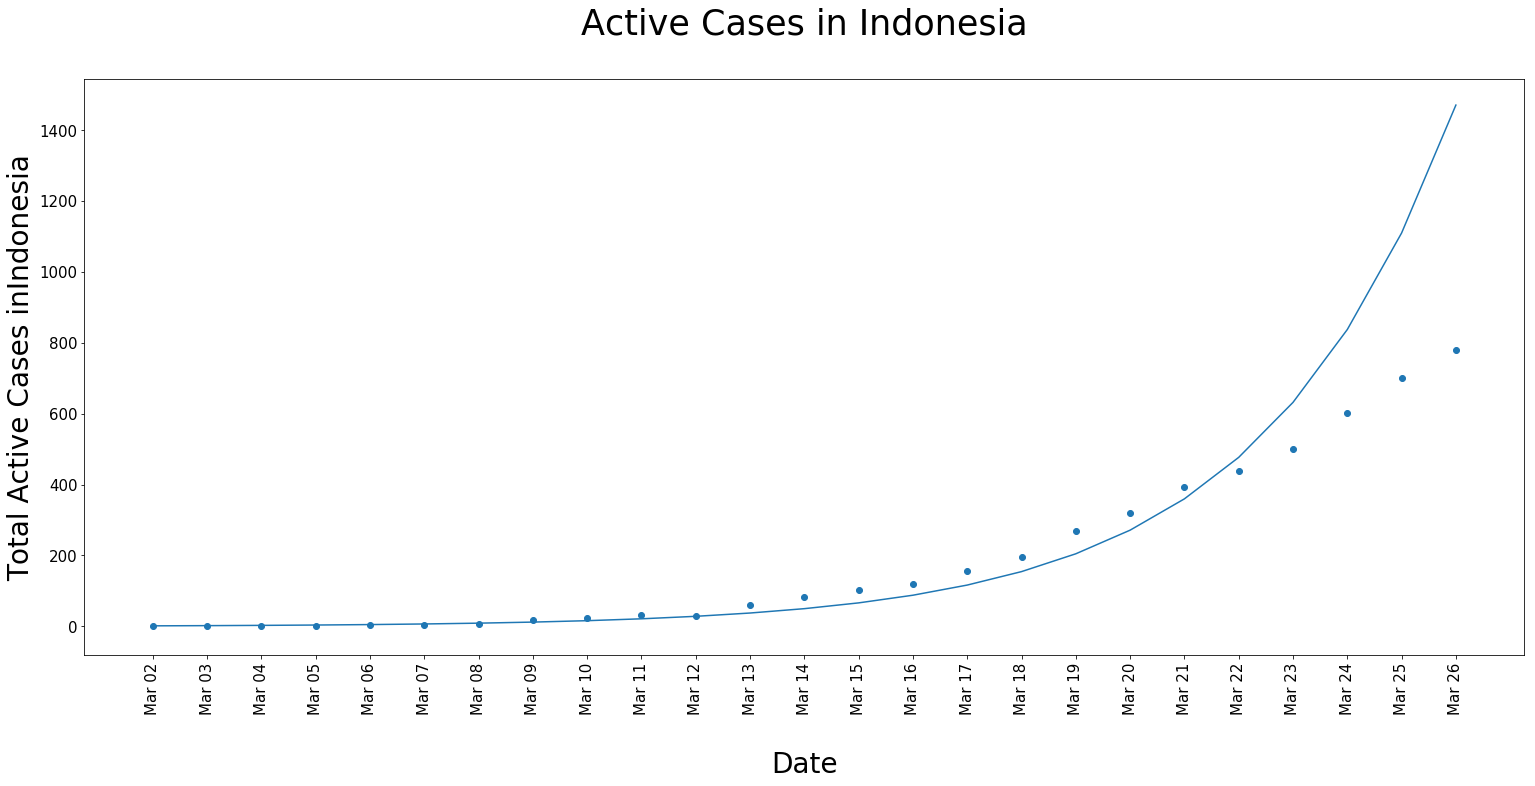

In [ ]:
active(date,y,ypred,"Indonesia")

### Polinomial Orde 3

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)

Persamaan regresi polinomial orde 3 nya adalah : y = 3.9334 + 0.3479x + -0.4818x^2 + 0.0691x^3
R^2 adalah 0.9986228534266965


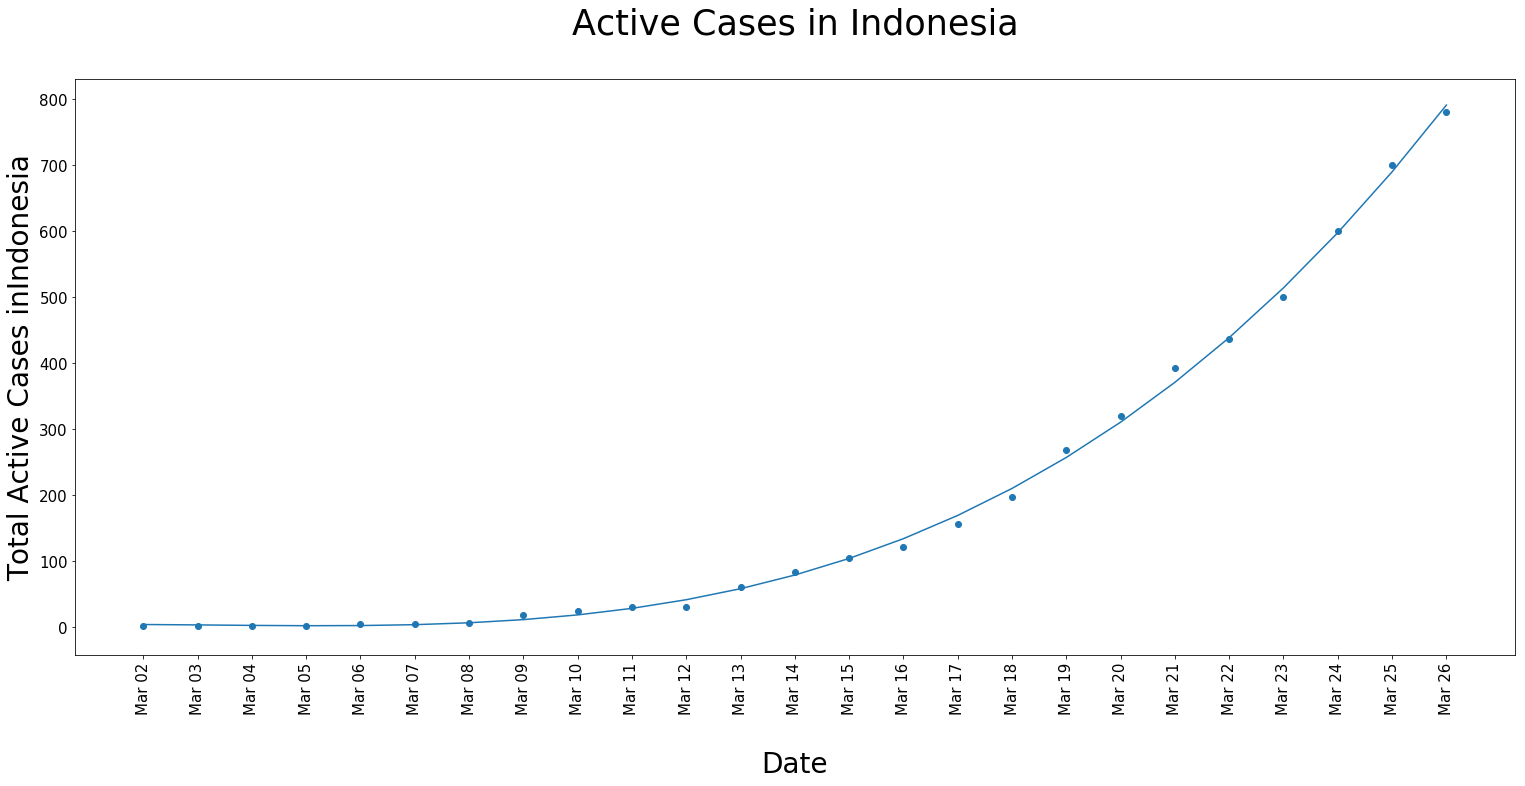

In [ ]:
active(date,y,ypred,"Indonesia")

In [ ]:
def indonesia_active(x) :
    y =3.9334 + 0.3479*x  -0.4818*(x**2) + 0.0691*(x**3)
    return y

Model terbaik untuk kasus aktif di Indonesia adalah polinomial orde 3 dengan r^2 score **0.9986228534266965**

### B. Total Deaths

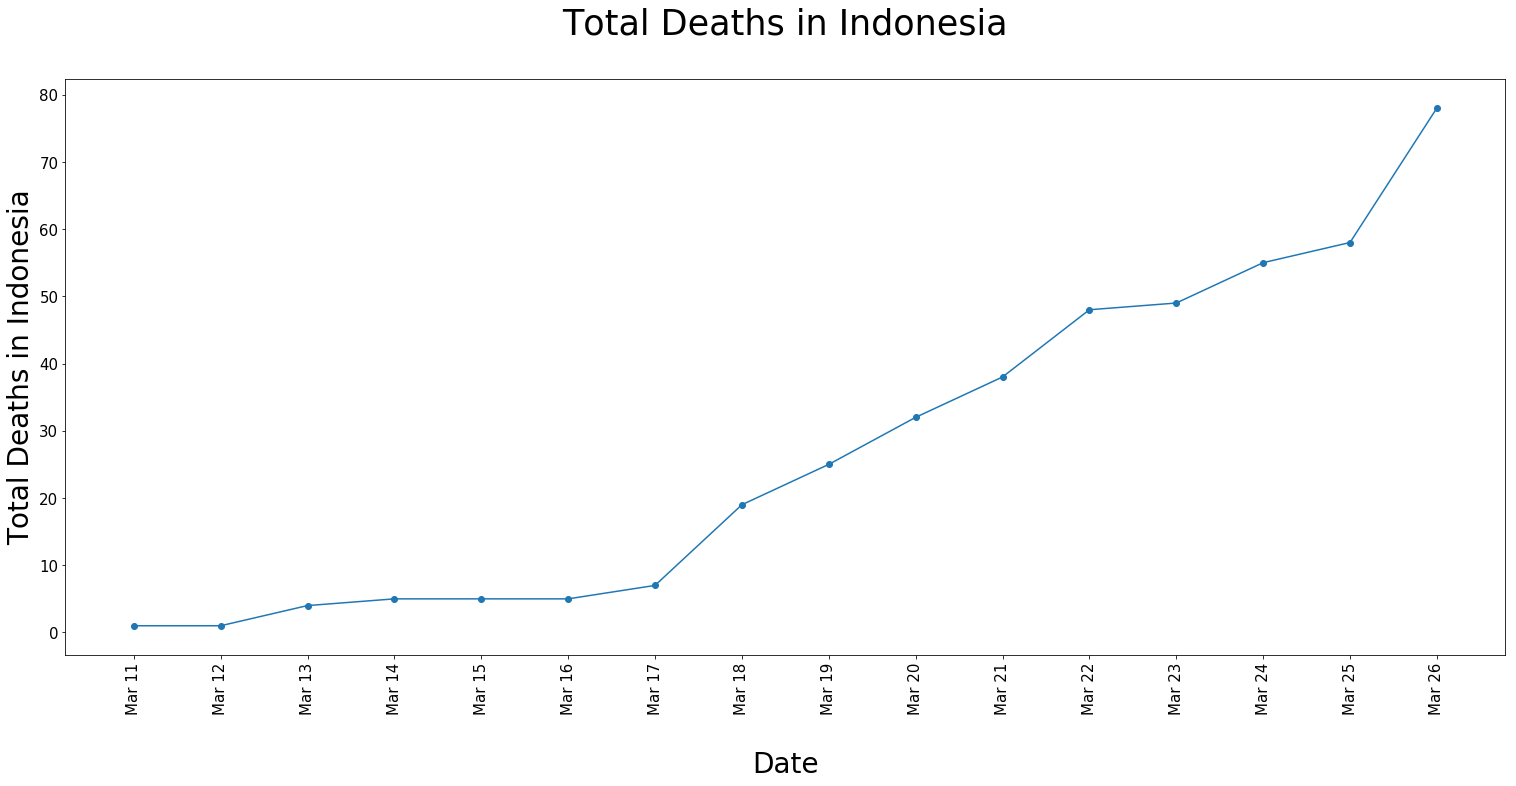

In [ ]:
x=list(df.iloc[10:,0])
y=list(df.iloc[10:,2])
x=np.array(range(1,len(x)+1))
date=tgl[9:]
death(date,y,y,"Indonesia")

### Linear

Persamaan regresi linearnya adalah : y = 5.0000x + -15.6250
R^2 adalah 0.9221339263920154


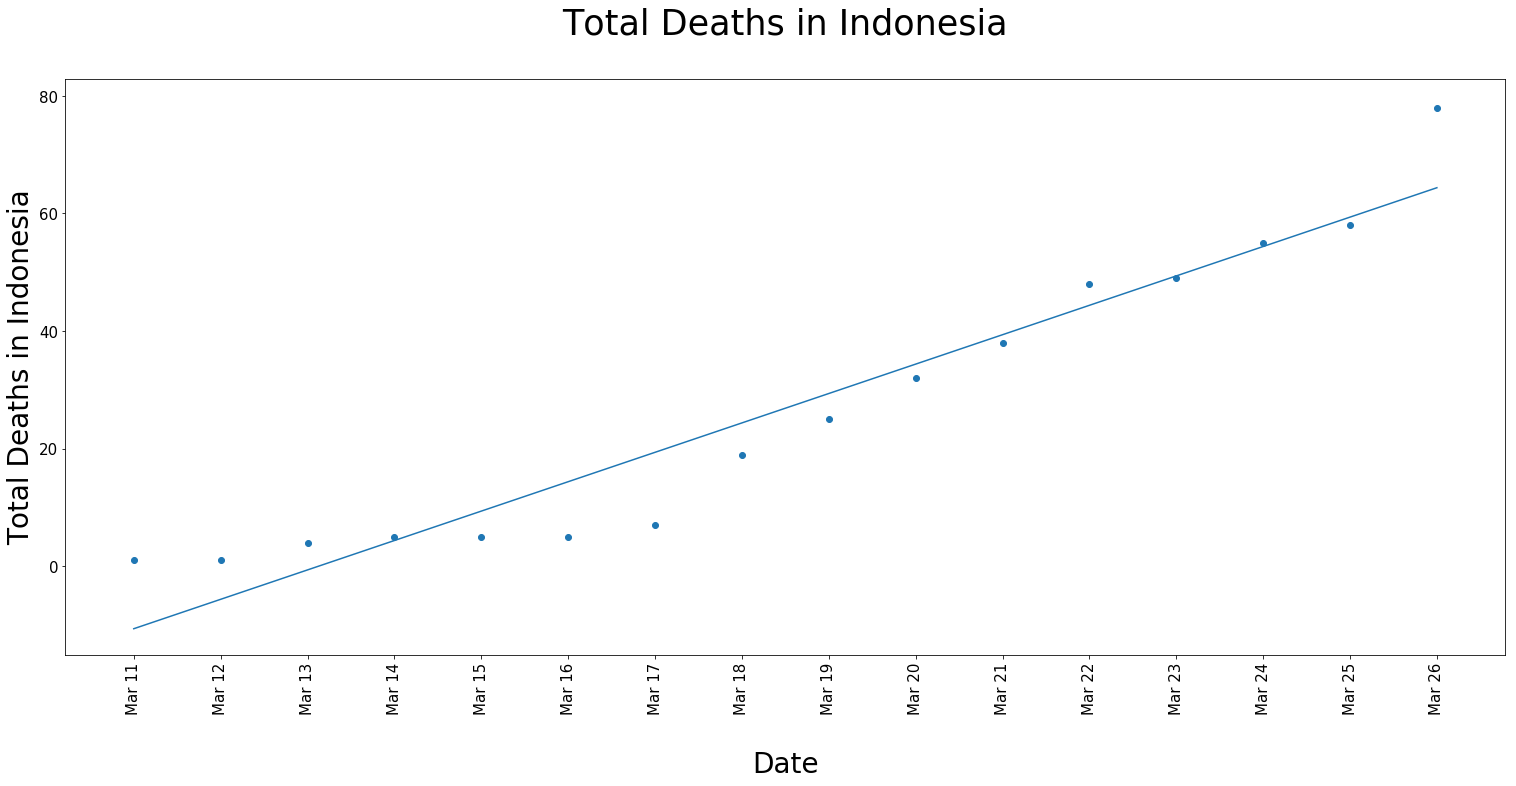

In [ ]:
ypred=linear(x,y)
r2_score_linear(y,ypred)
death(date,y,ypred,"Indonesia")

### Pangkat

Persamaan regresi pangkatnya adalah : y = 0.4664499243390233x^1.754583353728673
R^2 adalah 0.9224464074190571


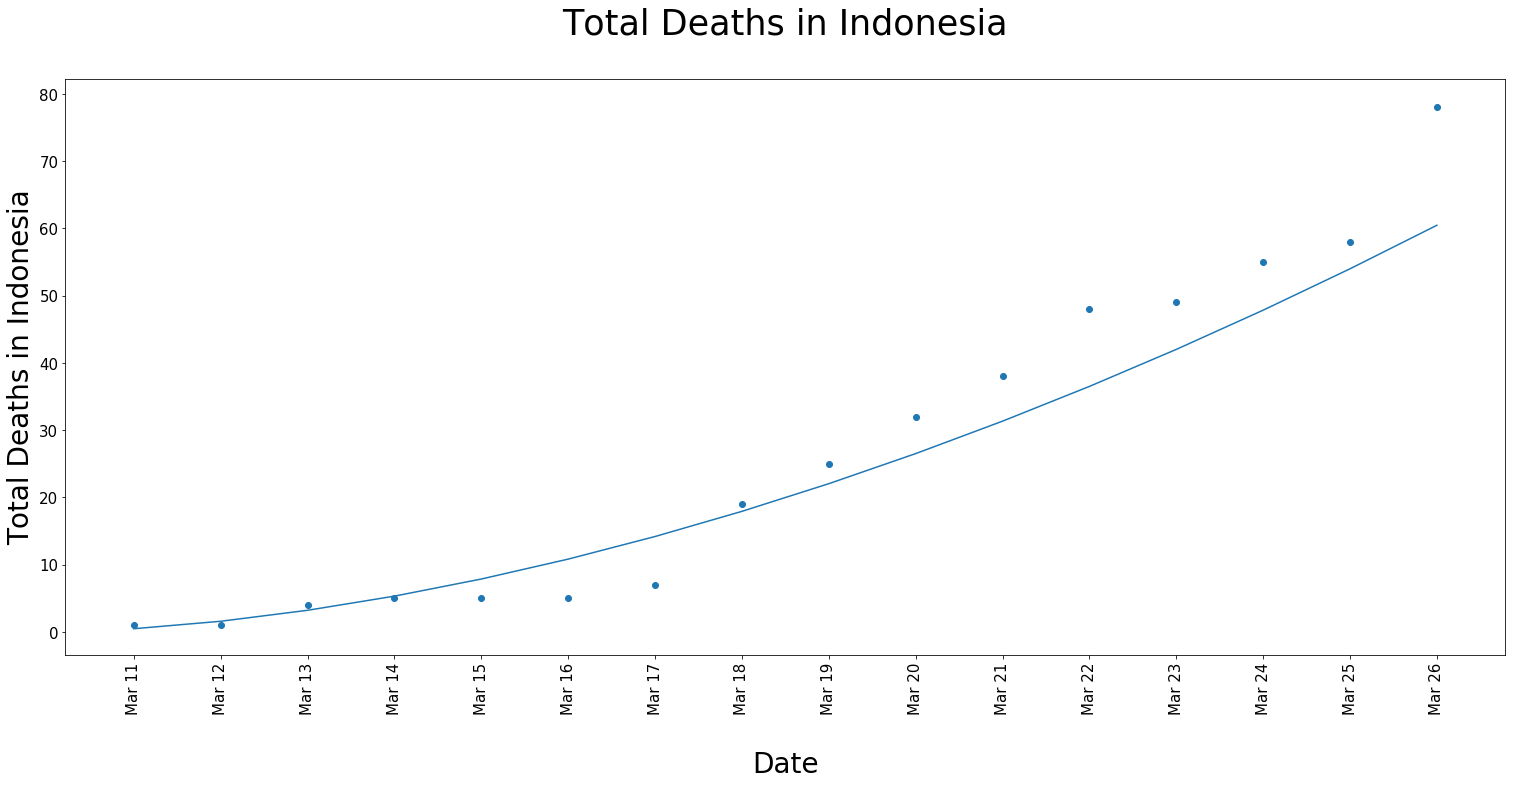

In [ ]:
ypred=pangkat(x,y)
r2_score_pangkat(x,y)
death(date,y,ypred,"Indonesia")

### Eksponensial

Persamaan regresi eksponensialnya adalah : y = 1.1297e^0.2916x
R^2 adalah 0.9275769997761126


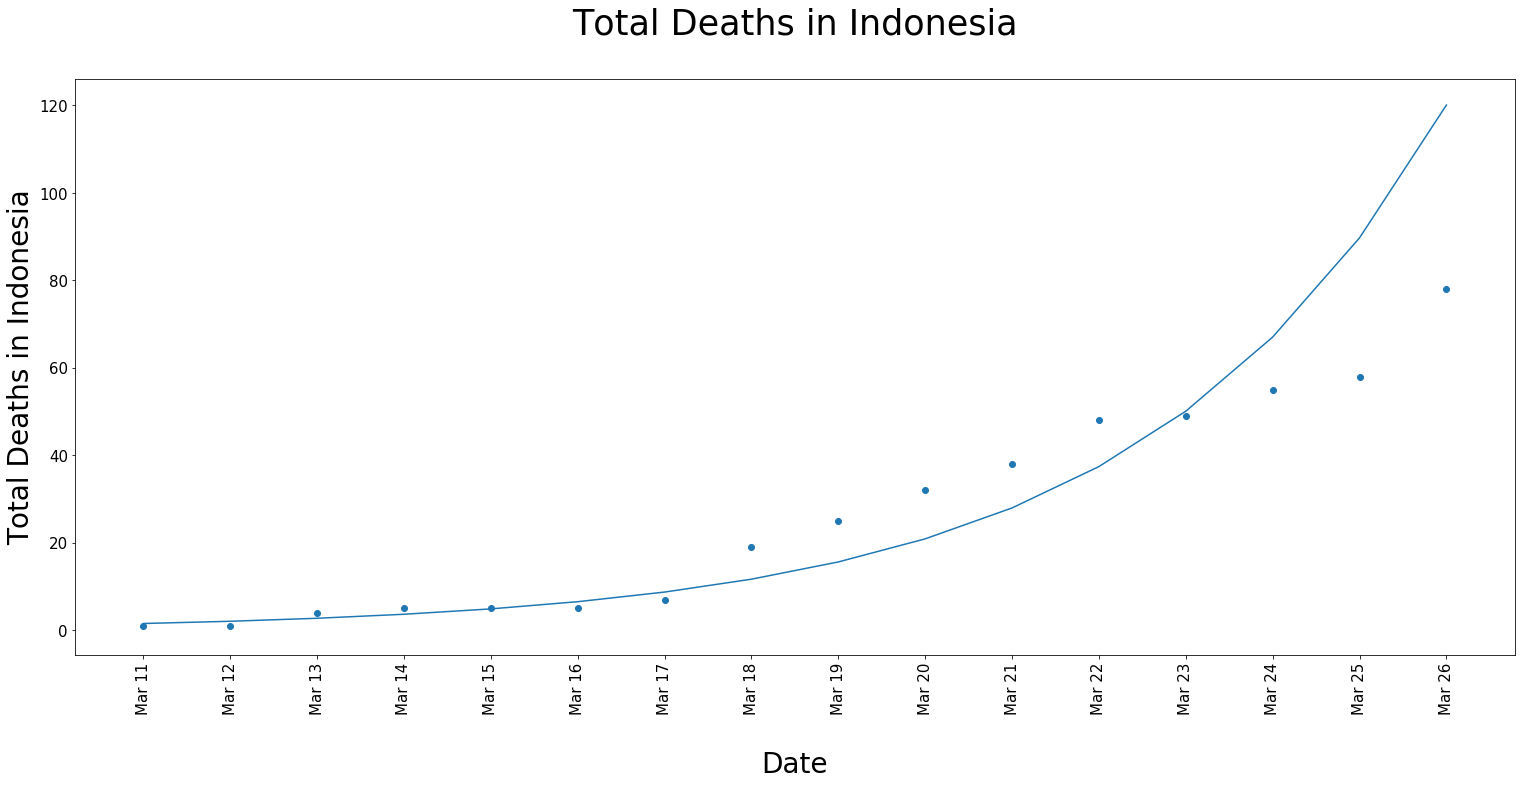

In [ ]:
ypred=eksp(x,y)
r2_score_exp(x,y)
death(date,y,ypred,"Indonesia")

### Polinomial Orde 3

Persamaan regresi polinomial orde 3 nya adalah : y = 4.6538 + -3.2099x + 0.7487x^2 + -0.0177x^3
R^2 adalah 0.979728852476134


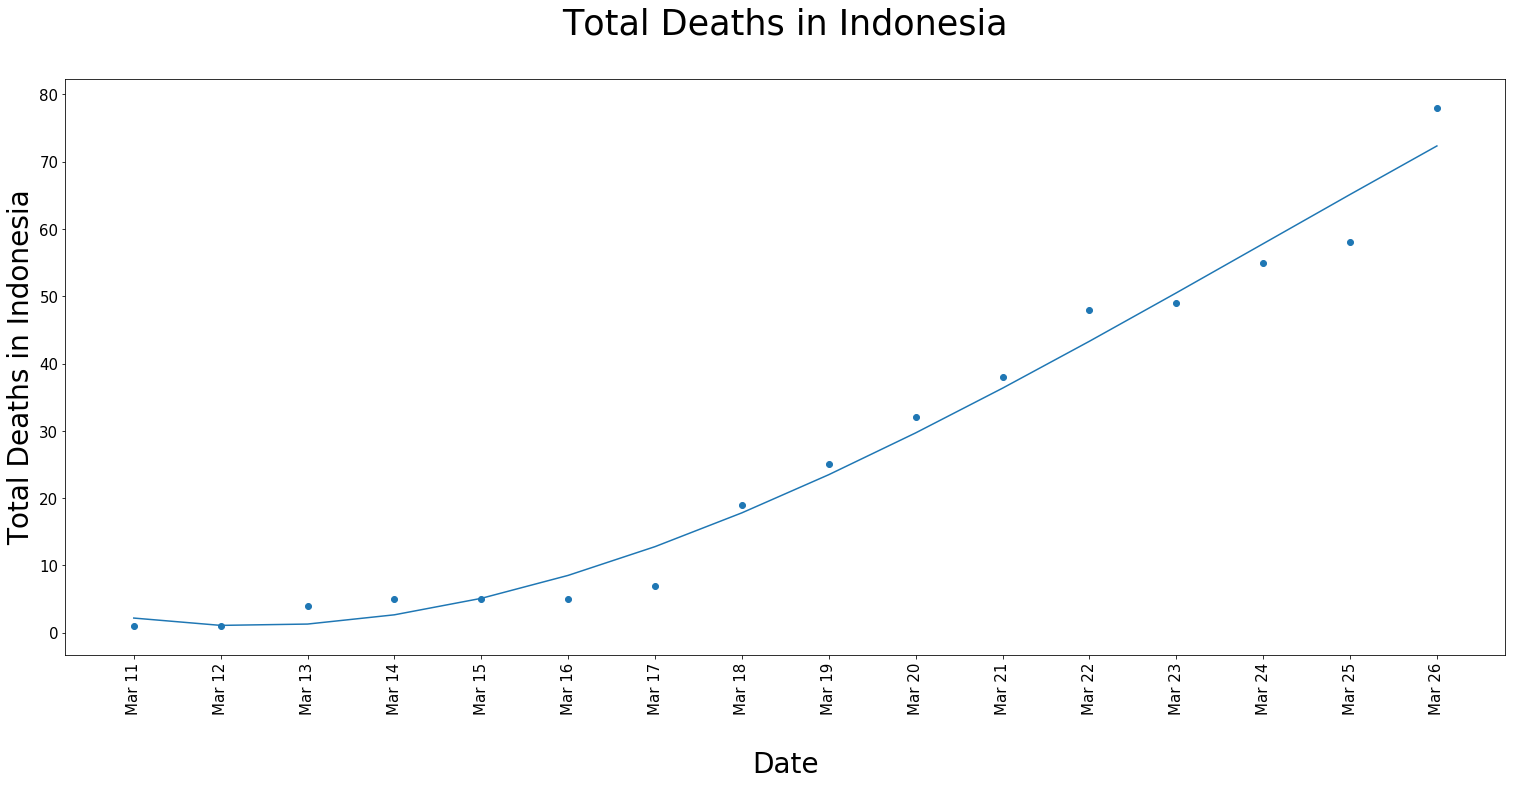

In [ ]:
ypred=orde3(x,y)
r2_score_orde3(y,ypred)
death(date,y,ypred,"Indonesia")

In [ ]:
def indonesia_death(x) :
    y = 4.6538 -3.2099*x + 0.7487*(x**2)  -0.0177*(x**3)
    return y

Model terbaik untuk kematian total di Indonesia adalah polinomial orde 3 dengan r^2 score **0.979728852476134**

# 4. Comparison Model between Indonesia and other Countries

In [ ]:
x=np.array(range(1,25))
x1=np.array(range(1,15))

In [ ]:
def kor(y1,y2,country,x) :
    r2_score_linear(y1,y2)
    plt.plot(x,y1,label="indonesia",color="red")
    plt.plot(x,y2,label=country,color="blue")
    plt.legend()
    plt.show()

## 4.1. Indonesia vs China

## A. Active Cases

R^2 adalah -17459.857686400723


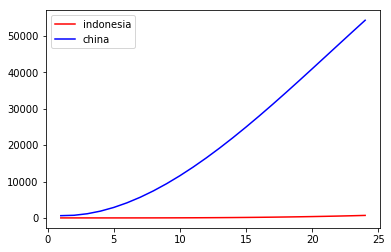

In [ ]:
kor(indonesia_active(x),china_active(x),"china",x)

## B. Total Deaths

R^2 adalah -239.21386836338868


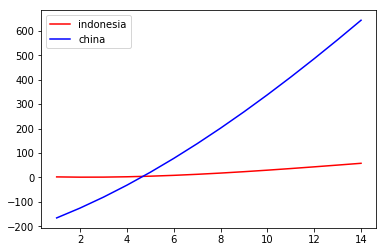

In [ ]:
kor(indonesia_death(x1),china_death(x1),"china",x1)

## 4.2. Indonesia vs Korea Selatan

## A. Active Cases

R^2 adalah -278.60952310517297


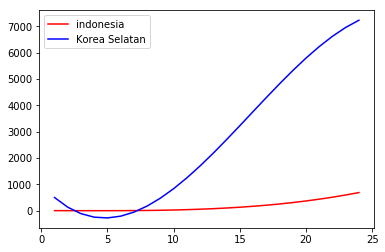

In [ ]:
kor(indonesia_active(x),korea_active(x),"Korea Selatan",x)

## B. Total Deaths

R^2 adalah -2.245359435980394


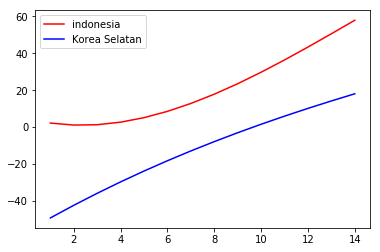

In [ ]:
kor(indonesia_death(x1),korea_death(x1),"Korea Selatan",x1)

## 4.3. Indonesia vs Italia

## A. Active Cases

R^2 adalah -159.6860400770032


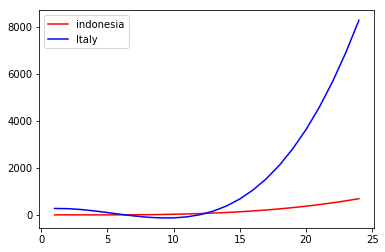

In [ ]:
kor(indonesia_active(x),italy_active(x),"Italy",x)

## B. Total Deaths

R^2 adalah -0.5703104517896245


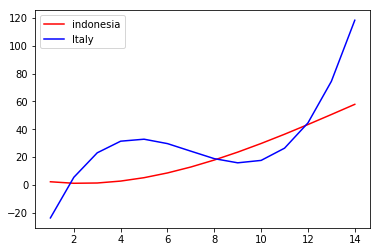

In [ ]:
kor(indonesia_death(x1),italy_death(x1),"Italy",x1)

## 4.6. Indonesia vs Jerman

## A. Active Cases

R^2 adalah -5.726829378313857


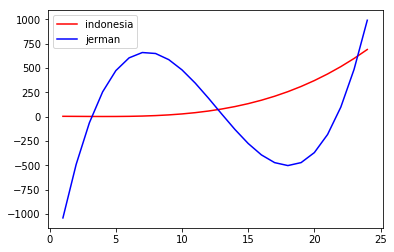

In [ ]:
kor(indonesia_active(x),germany_active(x),"jerman",x)

## B. Total Deaths

R^2 adalah 0.43582486023316636


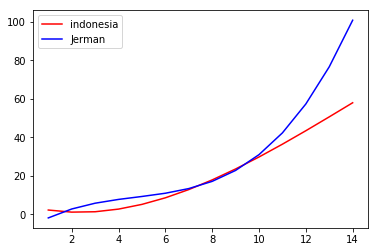

In [ ]:
kor(indonesia_death(x1),germany_death(x1),"Jerman",x1)

## 4.7. Indonesia vs Australia

## A. Active Cases

R^2 adalah -1.1618589622527118


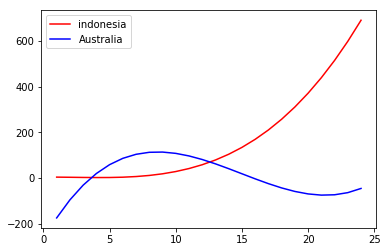

In [ ]:
kor(indonesia_active(x),aus_active(x),"Australia",x)

## B. Total Deaths

R^2 adalah -0.8534560033583007


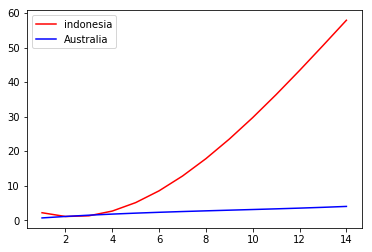

In [ ]:
kor(indonesia_death(x1),aus_death(x1),"Australia",x1)

## 4.8. Indonesia vs USA

## A. Active Cases

R^2 adalah 0.9066161612109412


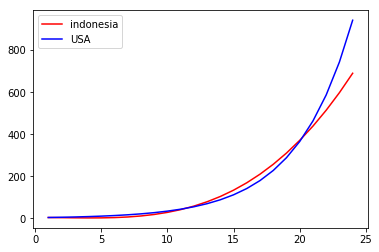

In [ ]:
kor(indonesia_active(x),usa_active(x),"USA",x)

## B. Total Deaths

R^2 adalah -3.0241931139516156


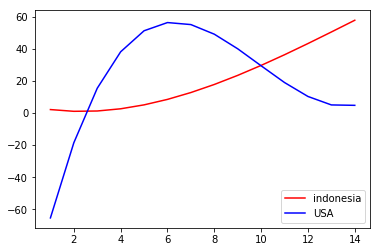

In [ ]:
kor(indonesia_death(x1),usa_death(x1),"USA",x1)